In [1]:
import numpy as np
import h5py
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from collections.abc import Iterable
import time
import math
import PyFiles.MLFunctionsForPytorch as MLFun

batchSize = 32 #Batch size of training set

# Define our neural networks

In [2]:
#Neural network with 2 hidden layers
#OLD, may delete later

class MultiRegressor2Layers(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(2)
    self.linear1 = nn.Linear(in_features=2, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.dropout = nn.Dropout()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    #self.dropout = nn.Dropout()
    self.act2 = nn.LeakyReLU()
    self.linear3 = nn.Linear(in_features=16, out_features=8)
    self.act3 = nn.LeakyReLU()
    #self.dropout = nn.Dropout()
    self.output = nn.Linear(in_features=8, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    #x = self.dropout(x)
    x = self.linear2(x)
    x = self.norm2(x)
    #x = self.dropout(x)
    x = self.act2(x)
    x = self.linear3(x)
    x = self.act3(x)
    #x = self.dropout(x)
    x = self.output(x)
    
    
    return x

In [3]:
#Neural network with 1 hidden layer
#OLD, may delete later

class MultiRegressor1Layer(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(2)
    self.linear1 = nn.Linear(in_features=2, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.dropout = nn.Dropout()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    #self.dropout = nn.Dropout()
    self.act2 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    #x = self.dropout(x)
    x = self.linear2(x)
    x = self.norm2(x)
    #x = self.dropout(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

In [4]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(2)
    self.linear1 = nn.Linear(in_features=2, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    self.act2 = nn.LeakyReLU()
    self.linear3 = nn.Linear(in_features=16, out_features=16)
    self.norm3 = nn.BatchNorm1d(16)
    self.act3 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.norm2(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

# Read in the data

In [5]:
numPoints = 50000
#numPoints = 500

#filename = 'Data_Fuchs_v_2.2_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
#filename = 'Dataset/Data_Fuchs_v_2.2_Wright_Pat_Narrow_Range_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
#filename = 'Dataset/Data_Fuchs_v_2.3_energy_limit_0.01_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'

filename = 'Dataset/Data_Fuchs_v_2.7_Wright_Pat_Narrow_Range_energy_limit_0.01_deviation_0.1_lambda_um_0.8_points_' \
                 + str(numPoints) + '_seed_0.h5'

h5File = h5py.File(filename, 'r+')

In [6]:
#Read columns

intens = h5File['Intensity_(W_cm2)']
duration = h5File['Pulse_Duration_(fs)']
thickness = h5File['Target_Thickness (um)']
spotSize = h5File['Spot_Size_(FWHM um)']
maxEnergy = h5File['Max_Proton_Energy_(MeV)']
totalEnergy = h5File['Total_Proton_Energy_(MeV)']
avgEnergy = h5File['Avg_Proton_Energy_(MeV)']


#Convert columns into numpy arrays
npIntens = np.fromiter(intens, float)
npDuration = np.fromiter(duration, float)
npThickness = np.fromiter(thickness, float)
npSpot = np.fromiter(spotSize, float)
npMaxEnergy = np.fromiter(maxEnergy, float)
npTotalEnergy = np.fromiter(totalEnergy, float)
npAvgEnergy = np.fromiter(avgEnergy, float)


#Join all of those arrays into one big numpy array
npFile = np.dstack((npIntens, npDuration, npThickness, npSpot, npMaxEnergy, npTotalEnergy, npAvgEnergy))
npFile = npFile.reshape(numPoints, 7)

npTrain = npFile[:math.floor(.9*numPoints), 0:7]
#npTest = npFile[math.floor(.9*numPoints):, 0:7]

npTrain = npFile[:, 0:7]

#Two input version
npFile = np.dstack((npIntens, npThickness, npMaxEnergy, npTotalEnergy, npAvgEnergy))
npFile = npFile.reshape(numPoints, 5)

#npTrain = npFile[:math.floor(.9*numPoints), 0:5]
#npTest = npFile[math.floor(.9*numPoints):, 0:5]

npTrain = npFile[:, 0:5]

#print(npFile.shape)

In [7]:
#filename_test = 'Data_Fuchs_v_2.2_Wright_Pat_Narrow_Range_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
filename_test = 'Dataset/Data_Fuchs_v_2.2_Wright_Pat_Narrow_Range_lambda_um_0.8_points_' + str(100000) + '_seed_1.h5'
#filename_test = 'Data_Fuchs_v_2.3_energy_limit_0.01_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'

h5FileTest = h5py.File(filename_test, 'r+')

#Read columns

intens = h5FileTest['Intensity_(W_cm2)']
duration = h5FileTest['Pulse_Duration_(fs)']
thickness = h5FileTest['Target_Thickness (um)']
spotSize = h5FileTest['Spot_Size_(FWHM um)']
maxEnergy = h5FileTest['Max_Proton_Energy_(MeV)']
totalEnergy = h5FileTest['Total_Proton_Energy_(MeV)']
avgEnergy = h5FileTest['Avg_Proton_Energy_(MeV)']


#Convert columns into numpy arrays
npIntens = np.fromiter(intens, float)
npDuration = np.fromiter(duration, float)
npThickness = np.fromiter(thickness, float)
npSpot = np.fromiter(spotSize, float)
npMaxEnergy = np.fromiter(maxEnergy, float)
npTotalEnergy = np.fromiter(totalEnergy, float)
npAvgEnergy = np.fromiter(avgEnergy, float)


#Join all of those arrays into one big numpy array
npFile = np.dstack((npIntens, npDuration, npThickness, npSpot, npMaxEnergy, npTotalEnergy, npAvgEnergy))

npFile = npFile.reshape(100000, 7)

#npTrain = npFile[:math.floor(.9*numPoints), 0:7]
#npTest = npFile[math.floor(.9*numPoints):, 0:7]

npTest = npFile[:, 0:7]

#Two input version
npFile = np.dstack((npIntens, npThickness, npMaxEnergy, npTotalEnergy, npAvgEnergy))
npFile = npFile.reshape(100000, 5)

npTest = npFile[:, 0:5]

print(npFile.shape)

(100000, 5)


# Prepare our dataset

In [8]:
training_dataset = h5File.create_dataset(name=None, data=npTrain)
test_dataset = h5File.create_dataset(name=None, data=npTest)

In [9]:
#Choose our loss function
loss_function = nn.MSELoss()

In [10]:
#List which epochs we should test

#epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100, 150, 200, 250]
#epochList = [1, 5, 10, 15, 20, 25, 50, 75, 100, 150, 200]
#epochList = [1, 5, 10, 15, 20, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
#epochList = [1, 5, 10, 15, 20, 25]
#epochList = [1, 5, 10, 15, 20, 30, 35, 40, 45]
epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
#epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100]
#epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
#epochList = [1,5, 10, 15, 20, 25, 30, 35]
#epochList = [35]

In [11]:
#Initialize neural network and dataloader
#model1Layer = MultiRegressor1Layer().to('cuda')
model = MLP().to('cuda')

modelMSE, modelPercentError, trainMSE, trainPercent, timeList = MLFun.getModelError(model, epochList, loss_function, 
                                                                                    training_dataset, test_dataset, 
                                                                                    numInputs = 2, processInputs = MLFun.logFirstCol,
                                                                                    processTargets = MLFun.logAll)

Training with 1 epochs.
Starting epoch 1
Loss after mini-batch     1: 0.316
Loss after mini-batch    11: 3.127
Loss after mini-batch    21: 3.104
Loss after mini-batch    31: 2.996
Loss after mini-batch    41: 2.921
Loss after mini-batch    51: 2.971
Loss after mini-batch    61: 2.890
Loss after mini-batch    71: 2.883
Loss after mini-batch    81: 2.758
Loss after mini-batch    91: 2.784
Loss after mini-batch   101: 2.719
Loss after mini-batch   111: 2.620
Loss after mini-batch   121: 2.585
Loss after mini-batch   131: 2.582
Loss after mini-batch   141: 2.528
Loss after mini-batch   151: 2.484
Loss after mini-batch   161: 2.444
Loss after mini-batch   171: 2.360
Loss after mini-batch   181: 2.287
Loss after mini-batch   191: 2.318
Loss after mini-batch   201: 2.137
Loss after mini-batch   211: 2.117
Loss after mini-batch   221: 2.098
Loss after mini-batch   231: 2.049
Loss after mini-batch   241: 1.910
Loss after mini-batch   251: 1.919
Loss after mini-batch   261: 1.876
Loss after min

Loss after mini-batch   731: 0.026
Loss after mini-batch   741: 0.028
Loss after mini-batch   751: 0.026
Loss after mini-batch   761: 0.025
Loss after mini-batch   771: 0.025
Loss after mini-batch   781: 0.026
Loss after mini-batch   791: 0.026
Loss after mini-batch   801: 0.027
Loss after mini-batch   811: 0.027
Loss after mini-batch   821: 0.028
Loss after mini-batch   831: 0.029
Loss after mini-batch   841: 0.028
Loss after mini-batch   851: 0.028
Loss after mini-batch   861: 0.027
Loss after mini-batch   871: 0.027
Loss after mini-batch   881: 0.029
Loss after mini-batch   891: 0.030
Loss after mini-batch   901: 0.029
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.027
Loss after mini-batch   941: 0.027
Loss after mini-batch   951: 0.029
Loss after mini-batch   961: 0.028
Loss after mini-batch   971: 0.023
Loss after mini-batch   981: 0.026
Loss after mini-batch   991: 0.027
Loss after mini-batch  1001: 0.027
Loss after mini-batc

Loss after mini-batch  1501: 0.025
Loss after mini-batch  1511: 0.027
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.026
Loss after mini-batch  1541: 0.026
Loss after mini-batch  1551: 0.027
Loss after mini-batch  1561: 0.029
Starting epoch 3
Loss after mini-batch     1: 0.004
Loss after mini-batch    11: 0.028
Loss after mini-batch    21: 0.025
Loss after mini-batch    31: 0.027
Loss after mini-batch    41: 0.025
Loss after mini-batch    51: 0.026
Loss after mini-batch    61: 0.027
Loss after mini-batch    71: 0.027
Loss after mini-batch    81: 0.028
Loss after mini-batch    91: 0.025
Loss after mini-batch   101: 0.028
Loss after mini-batch   111: 0.028
Loss after mini-batch   121: 0.029
Loss after mini-batch   131: 0.028
Loss after mini-batch   141: 0.028
Loss after mini-batch   151: 0.028
Loss after mini-batch   161: 0.026
Loss after mini-batch   171: 0.026
Loss after mini-batch   181: 0.025
Loss after mini-batch   191: 0.028
Loss after mini-batch   201: 0.027
Los

Loss after mini-batch   711: 0.029
Loss after mini-batch   721: 0.029
Loss after mini-batch   731: 0.028
Loss after mini-batch   741: 0.027
Loss after mini-batch   751: 0.026
Loss after mini-batch   761: 0.026
Loss after mini-batch   771: 0.023
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.030
Loss after mini-batch   801: 0.027
Loss after mini-batch   811: 0.028
Loss after mini-batch   821: 0.026
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.026
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.028
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.030
Loss after mini-batch   891: 0.027
Loss after mini-batch   901: 0.030
Loss after mini-batch   911: 0.028
Loss after mini-batch   921: 0.028
Loss after mini-batch   931: 0.028
Loss after mini-batch   941: 0.028
Loss after mini-batch   951: 0.026
Loss after mini-batch   961: 0.026
Loss after mini-batch   971: 0.025
Loss after mini-batch   981: 0.024
Loss after mini-batc

Loss after mini-batch  1481: 0.027
Loss after mini-batch  1491: 0.025
Loss after mini-batch  1501: 0.025
Loss after mini-batch  1511: 0.026
Loss after mini-batch  1521: 0.028
Loss after mini-batch  1531: 0.027
Loss after mini-batch  1541: 0.026
Loss after mini-batch  1551: 0.028
Loss after mini-batch  1561: 0.026
Training process has finished.
Calculate error for test
Calculate error for train
Training with 10 epochs.
Starting epoch 1
Loss after mini-batch     1: 0.344
Loss after mini-batch    11: 2.728
Loss after mini-batch    21: 1.856
Loss after mini-batch    31: 1.138
Loss after mini-batch    41: 0.413
Loss after mini-batch    51: 0.076
Loss after mini-batch    61: 0.055
Loss after mini-batch    71: 0.053
Loss after mini-batch    81: 0.034
Loss after mini-batch    91: 0.039
Loss after mini-batch   101: 0.037
Loss after mini-batch   111: 0.033
Loss after mini-batch   121: 0.032
Loss after mini-batch   131: 0.030
Loss after mini-batch   141: 0.032
Loss after mini-batch   151: 0.030
L

Loss after mini-batch   661: 0.029
Loss after mini-batch   671: 0.026
Loss after mini-batch   681: 0.029
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.028
Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.027
Loss after mini-batch   731: 0.027
Loss after mini-batch   741: 0.027
Loss after mini-batch   751: 0.025
Loss after mini-batch   761: 0.028
Loss after mini-batch   771: 0.025
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.027
Loss after mini-batch   801: 0.026
Loss after mini-batch   811: 0.028
Loss after mini-batch   821: 0.027
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.026
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.024
Loss after mini-batch   891: 0.027
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.027
Loss after mini-batch   921: 0.024
Loss after mini-batch   931: 0.028
Loss after mini-batc

Loss after mini-batch  1431: 0.027
Loss after mini-batch  1441: 0.027
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.026
Loss after mini-batch  1471: 0.027
Loss after mini-batch  1481: 0.028
Loss after mini-batch  1491: 0.028
Loss after mini-batch  1501: 0.026
Loss after mini-batch  1511: 0.028
Loss after mini-batch  1521: 0.027
Loss after mini-batch  1531: 0.027
Loss after mini-batch  1541: 0.028
Loss after mini-batch  1551: 0.028
Loss after mini-batch  1561: 0.026
Starting epoch 4
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.028
Loss after mini-batch    21: 0.028
Loss after mini-batch    31: 0.026
Loss after mini-batch    41: 0.027
Loss after mini-batch    51: 0.029
Loss after mini-batch    61: 0.027
Loss after mini-batch    71: 0.025
Loss after mini-batch    81: 0.029
Loss after mini-batch    91: 0.028
Loss after mini-batch   101: 0.026
Loss after mini-batch   111: 0.025
Loss after mini-batch   121: 0.029
Loss after mini-batch   131: 0.026
Los

Loss after mini-batch   631: 0.023
Loss after mini-batch   641: 0.025
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.026
Loss after mini-batch   671: 0.026
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.024
Loss after mini-batch   701: 0.028
Loss after mini-batch   711: 0.025
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.027
Loss after mini-batch   741: 0.028
Loss after mini-batch   751: 0.027
Loss after mini-batch   761: 0.029
Loss after mini-batch   771: 0.030
Loss after mini-batch   781: 0.029
Loss after mini-batch   791: 0.028
Loss after mini-batch   801: 0.028
Loss after mini-batch   811: 0.025
Loss after mini-batch   821: 0.026
Loss after mini-batch   831: 0.029
Loss after mini-batch   841: 0.026
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.027
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.025
Loss after mini-batch   891: 0.028
Loss after mini-batch   901: 0.028
Loss after mini-batc

Loss after mini-batch  1401: 0.027
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.026
Loss after mini-batch  1431: 0.025
Loss after mini-batch  1441: 0.028
Loss after mini-batch  1451: 0.026
Loss after mini-batch  1461: 0.028
Loss after mini-batch  1471: 0.027
Loss after mini-batch  1481: 0.025
Loss after mini-batch  1491: 0.026
Loss after mini-batch  1501: 0.026
Loss after mini-batch  1511: 0.026
Loss after mini-batch  1521: 0.029
Loss after mini-batch  1531: 0.025
Loss after mini-batch  1541: 0.025
Loss after mini-batch  1551: 0.025
Loss after mini-batch  1561: 0.027
Starting epoch 7
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.027
Loss after mini-batch    21: 0.025
Loss after mini-batch    31: 0.025
Loss after mini-batch    41: 0.029
Loss after mini-batch    51: 0.026
Loss after mini-batch    61: 0.024
Loss after mini-batch    71: 0.026
Loss after mini-batch    81: 0.026
Loss after mini-batch    91: 0.026
Loss after mini-batch   101: 0.029
Los

Loss after mini-batch   601: 0.026
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.029
Loss after mini-batch   641: 0.022
Loss after mini-batch   651: 0.025
Loss after mini-batch   661: 0.030
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.027
Loss after mini-batch   691: 0.028
Loss after mini-batch   701: 0.028
Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.025
Loss after mini-batch   741: 0.025
Loss after mini-batch   751: 0.028
Loss after mini-batch   761: 0.028
Loss after mini-batch   771: 0.026
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.027
Loss after mini-batch   801: 0.028
Loss after mini-batch   811: 0.026
Loss after mini-batch   821: 0.026
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.025
Loss after mini-batch   851: 0.025
Loss after mini-batch   861: 0.026
Loss after mini-batch   871: 0.025
Loss after mini-batc

Loss after mini-batch  1371: 0.026
Loss after mini-batch  1381: 0.025
Loss after mini-batch  1391: 0.025
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.027
Loss after mini-batch  1421: 0.025
Loss after mini-batch  1431: 0.024
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.024
Loss after mini-batch  1461: 0.024
Loss after mini-batch  1471: 0.028
Loss after mini-batch  1481: 0.028
Loss after mini-batch  1491: 0.026
Loss after mini-batch  1501: 0.026
Loss after mini-batch  1511: 0.026
Loss after mini-batch  1521: 0.027
Loss after mini-batch  1531: 0.025
Loss after mini-batch  1541: 0.025
Loss after mini-batch  1551: 0.026
Loss after mini-batch  1561: 0.026
Starting epoch 10
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.026
Loss after mini-batch    21: 0.024
Loss after mini-batch    31: 0.024
Loss after mini-batch    41: 0.024
Loss after mini-batch    51: 0.026
Loss after mini-batch    61: 0.027
Loss after mini-batch    71: 0.026
Lo

Loss after mini-batch   551: 0.029
Loss after mini-batch   561: 0.029
Loss after mini-batch   571: 0.030
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.029
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.028
Loss after mini-batch   651: 0.028
Loss after mini-batch   661: 0.027
Loss after mini-batch   671: 0.026
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.029
Loss after mini-batch   701: 0.029
Loss after mini-batch   711: 0.027
Loss after mini-batch   721: 0.027
Loss after mini-batch   731: 0.027
Loss after mini-batch   741: 0.026
Loss after mini-batch   751: 0.027
Loss after mini-batch   761: 0.025
Loss after mini-batch   771: 0.026
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.026
Loss after mini-batch   801: 0.026
Loss after mini-batch   811: 0.026
Loss after mini-batch   821: 0.028
Loss after mini-batc

Loss after mini-batch  1331: 0.027
Loss after mini-batch  1341: 0.026
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.026
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.029
Loss after mini-batch  1401: 0.027
Loss after mini-batch  1411: 0.029
Loss after mini-batch  1421: 0.028
Loss after mini-batch  1431: 0.027
Loss after mini-batch  1441: 0.024
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.028
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.028
Loss after mini-batch  1491: 0.026
Loss after mini-batch  1501: 0.028
Loss after mini-batch  1511: 0.030
Loss after mini-batch  1521: 0.027
Loss after mini-batch  1531: 0.026
Loss after mini-batch  1541: 0.028
Loss after mini-batch  1551: 0.028
Loss after mini-batch  1561: 0.028
Starting epoch 3
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.028
Loss after mini-batch    21: 0.028
Loss after mini-batch    31: 0.027
Los

Loss after mini-batch   531: 0.026
Loss after mini-batch   541: 0.024
Loss after mini-batch   551: 0.027
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.029
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.028
Loss after mini-batch   611: 0.029
Loss after mini-batch   621: 0.029
Loss after mini-batch   631: 0.028
Loss after mini-batch   641: 0.027
Loss after mini-batch   651: 0.028
Loss after mini-batch   661: 0.027
Loss after mini-batch   671: 0.028
Loss after mini-batch   681: 0.029
Loss after mini-batch   691: 0.026
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.025
Loss after mini-batch   721: 0.027
Loss after mini-batch   731: 0.030
Loss after mini-batch   741: 0.028
Loss after mini-batch   751: 0.026
Loss after mini-batch   761: 0.027
Loss after mini-batch   771: 0.028
Loss after mini-batch   781: 0.026
Loss after mini-batch   791: 0.025
Loss after mini-batch   801: 0.029
Loss after mini-batc

Loss after mini-batch  1301: 0.029
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.029
Loss after mini-batch  1331: 0.028
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.028
Loss after mini-batch  1371: 0.025
Loss after mini-batch  1381: 0.029
Loss after mini-batch  1391: 0.029
Loss after mini-batch  1401: 0.029
Loss after mini-batch  1411: 0.028
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.025
Loss after mini-batch  1441: 0.027
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.029
Loss after mini-batch  1471: 0.025
Loss after mini-batch  1481: 0.028
Loss after mini-batch  1491: 0.028
Loss after mini-batch  1501: 0.027
Loss after mini-batch  1511: 0.029
Loss after mini-batch  1521: 0.027
Loss after mini-batch  1531: 0.025
Loss after mini-batch  1541: 0.027
Loss after mini-batch  1551: 0.028
Loss after mini-batch  1561: 0.026
Starting epoch 6
Loss after mini-batch     1: 0.003
Los

Loss after mini-batch   511: 0.026
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.024
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.027
Loss after mini-batch   561: 0.028
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.024
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.027
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.025
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.029
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.027
Loss after mini-batch   731: 0.026
Loss after mini-batch   741: 0.029
Loss after mini-batch   751: 0.025
Loss after mini-batch   761: 0.025
Loss after mini-batch   771: 0.026
Loss after mini-batch   781: 0.024
Loss after mini-batc

Loss after mini-batch  1291: 0.026
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.028
Loss after mini-batch  1341: 0.025
Loss after mini-batch  1351: 0.028
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.027
Loss after mini-batch  1391: 0.029
Loss after mini-batch  1401: 0.025
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.026
Loss after mini-batch  1431: 0.027
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.025
Loss after mini-batch  1461: 0.027
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.028
Loss after mini-batch  1491: 0.025
Loss after mini-batch  1501: 0.027
Loss after mini-batch  1511: 0.027
Loss after mini-batch  1521: 0.026
Loss after mini-batch  1531: 0.027
Loss after mini-batch  1541: 0.027
Loss after mini-batch  1551: 0.024
Loss after mini-batch  1561: 0.025
Starting epoch 9
Los

Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.024
Loss after mini-batch   531: 0.025
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.024
Loss after mini-batch   561: 0.024
Loss after mini-batch   571: 0.026
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.026
Loss after mini-batch   611: 0.025
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.029
Loss after mini-batch   651: 0.027
Loss after mini-batch   661: 0.026
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.027
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.025
Loss after mini-batch   711: 0.027
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.025
Loss after mini-batch   741: 0.023
Loss after mini-batch   751: 0.027
Loss after mini-batch   761: 0.027
Loss after mini-batch   771: 0.026
Loss after mini-batc

Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.024
Loss after mini-batch  1341: 0.022
Loss after mini-batch  1351: 0.024
Loss after mini-batch  1361: 0.024
Loss after mini-batch  1371: 0.026
Loss after mini-batch  1381: 0.025
Loss after mini-batch  1391: 0.026
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.024
Loss after mini-batch  1421: 0.026
Loss after mini-batch  1431: 0.025
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.026
Loss after mini-batch  1461: 0.024
Loss after mini-batch  1471: 0.027
Loss after mini-batch  1481: 0.023
Loss after mini-batch  1491: 0.026
Loss after mini-batch  1501: 0.024
Loss after mini-batch  1511: 0.025
Loss after mini-batch  1521: 0.026
Loss after mini-batch  1531: 0.023
Loss after mini-batch  1541: 0.023
Loss after mini-batch  1551: 0.028
Loss after mini-batc

Loss after mini-batch   491: 0.023
Loss after mini-batch   501: 0.024
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.024
Loss after mini-batch   531: 0.024
Loss after mini-batch   541: 0.026
Loss after mini-batch   551: 0.024
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.024
Loss after mini-batch   581: 0.024
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.023
Loss after mini-batch   611: 0.024
Loss after mini-batch   621: 0.024
Loss after mini-batch   631: 0.024
Loss after mini-batch   641: 0.023
Loss after mini-batch   651: 0.022
Loss after mini-batch   661: 0.025
Loss after mini-batch   671: 0.022
Loss after mini-batch   681: 0.025
Loss after mini-batch   691: 0.025
Loss after mini-batch   701: 0.025
Loss after mini-batch   711: 0.025
Loss after mini-batch   721: 0.023
Loss after mini-batch   731: 0.023
Loss after mini-batch   741: 0.024
Loss after mini-batch   751: 0.025
Loss after mini-batch   761: 0.025
Loss after mini-batc

Loss after mini-batch  1271: 0.022
Loss after mini-batch  1281: 0.022
Loss after mini-batch  1291: 0.020
Loss after mini-batch  1301: 0.022
Loss after mini-batch  1311: 0.022
Loss after mini-batch  1321: 0.024
Loss after mini-batch  1331: 0.022
Loss after mini-batch  1341: 0.023
Loss after mini-batch  1351: 0.023
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.023
Loss after mini-batch  1381: 0.024
Loss after mini-batch  1391: 0.025
Loss after mini-batch  1401: 0.024
Loss after mini-batch  1411: 0.023
Loss after mini-batch  1421: 0.022
Loss after mini-batch  1431: 0.023
Loss after mini-batch  1441: 0.022
Loss after mini-batch  1451: 0.022
Loss after mini-batch  1461: 0.024
Loss after mini-batch  1471: 0.023
Loss after mini-batch  1481: 0.022
Loss after mini-batch  1491: 0.023
Loss after mini-batch  1501: 0.023
Loss after mini-batch  1511: 0.021
Loss after mini-batch  1521: 0.022
Loss after mini-batch  1531: 0.023
Loss after mini-batch  1541: 0.022
Loss after mini-batc

Loss after mini-batch   441: 0.028
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.028
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.027
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.024
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.029
Loss after mini-batch   531: 0.027
Loss after mini-batch   541: 0.026
Loss after mini-batch   551: 0.029
Loss after mini-batch   561: 0.026
Loss after mini-batch   571: 0.026
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.027
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.029
Loss after mini-batch   631: 0.029
Loss after mini-batch   641: 0.027
Loss after mini-batch   651: 0.027
Loss after mini-batch   661: 0.028
Loss after mini-batch   671: 0.030
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.030
Loss after mini-batch   701: 0.028
Loss after mini-batch   711: 0.026
Loss after mini-batc

Loss after mini-batch  1211: 0.025
Loss after mini-batch  1221: 0.026
Loss after mini-batch  1231: 0.029
Loss after mini-batch  1241: 0.026
Loss after mini-batch  1251: 0.028
Loss after mini-batch  1261: 0.027
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.028
Loss after mini-batch  1291: 0.029
Loss after mini-batch  1301: 0.029
Loss after mini-batch  1311: 0.028
Loss after mini-batch  1321: 0.027
Loss after mini-batch  1331: 0.027
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.029
Loss after mini-batch  1371: 0.025
Loss after mini-batch  1381: 0.027
Loss after mini-batch  1391: 0.031
Loss after mini-batch  1401: 0.028
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.028
Loss after mini-batch  1431: 0.024
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.028
Loss after mini-batch  1461: 0.027
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.027
Loss after mini-batc

Loss after mini-batch   411: 0.028
Loss after mini-batch   421: 0.026
Loss after mini-batch   431: 0.025
Loss after mini-batch   441: 0.028
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.028
Loss after mini-batch   481: 0.026
Loss after mini-batch   491: 0.029
Loss after mini-batch   501: 0.028
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.029
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.029
Loss after mini-batch   571: 0.029
Loss after mini-batch   581: 0.026
Loss after mini-batch   591: 0.027
Loss after mini-batch   601: 0.026
Loss after mini-batch   611: 0.028
Loss after mini-batch   621: 0.027
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.029
Loss after mini-batch   661: 0.028
Loss after mini-batch   671: 0.029
Loss after mini-batch   681: 0.027
Loss after mini-batc

Loss after mini-batch  1181: 0.029
Loss after mini-batch  1191: 0.026
Loss after mini-batch  1201: 0.028
Loss after mini-batch  1211: 0.026
Loss after mini-batch  1221: 0.027
Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.028
Loss after mini-batch  1251: 0.028
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.025
Loss after mini-batch  1281: 0.028
Loss after mini-batch  1291: 0.029
Loss after mini-batch  1301: 0.028
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.028
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.024
Loss after mini-batch  1381: 0.029
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.027
Loss after mini-batch  1411: 0.024
Loss after mini-batch  1421: 0.023
Loss after mini-batch  1431: 0.028
Loss after mini-batch  1441: 0.028
Loss after mini-batch  1451: 0.026
Loss after mini-batc

Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.026
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.025
Loss after mini-batch   431: 0.026
Loss after mini-batch   441: 0.025
Loss after mini-batch   451: 0.027
Loss after mini-batch   461: 0.026
Loss after mini-batch   471: 0.025
Loss after mini-batch   481: 0.026
Loss after mini-batch   491: 0.025
Loss after mini-batch   501: 0.028
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.028
Loss after mini-batch   541: 0.026
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.024
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.024
Loss after mini-batch   631: 0.023
Loss after mini-batch   641: 0.027
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.023
Loss after mini-batc

Loss after mini-batch  1171: 0.025
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.023
Loss after mini-batch  1201: 0.026
Loss after mini-batch  1211: 0.026
Loss after mini-batch  1221: 0.025
Loss after mini-batch  1231: 0.026
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.027
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.029
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.024
Loss after mini-batch  1341: 0.025
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.024
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.025
Loss after mini-batch  1441: 0.024
Loss after mini-batc

Loss after mini-batch   381: 0.025
Loss after mini-batch   391: 0.023
Loss after mini-batch   401: 0.024
Loss after mini-batch   411: 0.023
Loss after mini-batch   421: 0.024
Loss after mini-batch   431: 0.026
Loss after mini-batch   441: 0.026
Loss after mini-batch   451: 0.025
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.026
Loss after mini-batch   481: 0.026
Loss after mini-batch   491: 0.023
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.023
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.024
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.027
Loss after mini-batch   601: 0.024
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.027
Loss after mini-batc

Loss after mini-batch  1151: 0.027
Loss after mini-batch  1161: 0.024
Loss after mini-batch  1171: 0.024
Loss after mini-batch  1181: 0.023
Loss after mini-batch  1191: 0.024
Loss after mini-batch  1201: 0.024
Loss after mini-batch  1211: 0.022
Loss after mini-batch  1221: 0.022
Loss after mini-batch  1231: 0.025
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.023
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.021
Loss after mini-batch  1301: 0.023
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.022
Loss after mini-batch  1331: 0.025
Loss after mini-batch  1341: 0.023
Loss after mini-batch  1351: 0.025
Loss after mini-batch  1361: 0.024
Loss after mini-batch  1371: 0.024
Loss after mini-batch  1381: 0.021
Loss after mini-batch  1391: 0.024
Loss after mini-batch  1401: 0.024
Loss after mini-batch  1411: 0.023
Loss after mini-batch  1421: 0.024
Loss after mini-batc

Loss after mini-batch   351: 0.020
Loss after mini-batch   361: 0.019
Loss after mini-batch   371: 0.019
Loss after mini-batch   381: 0.021
Loss after mini-batch   391: 0.019
Loss after mini-batch   401: 0.019
Loss after mini-batch   411: 0.018
Loss after mini-batch   421: 0.019
Loss after mini-batch   431: 0.020
Loss after mini-batch   441: 0.022
Loss after mini-batch   451: 0.020
Loss after mini-batch   461: 0.021
Loss after mini-batch   471: 0.019
Loss after mini-batch   481: 0.019
Loss after mini-batch   491: 0.018
Loss after mini-batch   501: 0.019
Loss after mini-batch   511: 0.019
Loss after mini-batch   521: 0.023
Loss after mini-batch   531: 0.021
Loss after mini-batch   541: 0.022
Loss after mini-batch   551: 0.020
Loss after mini-batch   561: 0.021
Loss after mini-batch   571: 0.022
Loss after mini-batch   581: 0.020
Loss after mini-batch   591: 0.019
Loss after mini-batch   601: 0.018
Loss after mini-batch   611: 0.018
Loss after mini-batch   621: 0.018
Loss after mini-batc

Loss after mini-batch  1131: 0.002
Loss after mini-batch  1141: 0.001
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.002
Loss after mini-batch  1181: 0.001
Loss after mini-batch  1191: 0.001
Loss after mini-batch  1201: 0.001
Loss after mini-batch  1211: 0.002
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.001
Loss after mini-batch  1261: 0.001
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.001
Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.001
Loss after mini-batch  1341: 0.001
Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.001
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.001
Loss after mini-batch  1401: 0.001
Loss after mini-batc

Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.001
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.001
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.001
Loss after mini-batch   541: 0.001
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batc

Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.001
Loss after mini-batch  1201: 0.001
Loss after mini-batch  1211: 0.001
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.001
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.001
Loss after mini-batc

Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.001
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.001
Loss after mini-batch   521: 0.001
Loss after mini-batch   531: 0.001
Loss after mini-batch   541: 0.001
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.001
Loss after mini-batch   601: 0.001
Loss after mini-batc

Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.001
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batc

Loss after mini-batch   281: 0.027
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.028
Loss after mini-batch   311: 0.026
Loss after mini-batch   321: 0.027
Loss after mini-batch   331: 0.028
Loss after mini-batch   341: 0.028
Loss after mini-batch   351: 0.028
Loss after mini-batch   361: 0.025
Loss after mini-batch   371: 0.026
Loss after mini-batch   381: 0.026
Loss after mini-batch   391: 0.024
Loss after mini-batch   401: 0.026
Loss after mini-batch   411: 0.030
Loss after mini-batch   421: 0.027
Loss after mini-batch   431: 0.027
Loss after mini-batch   441: 0.026
Loss after mini-batch   451: 0.028
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.028
Loss after mini-batch   491: 0.027
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.026
Loss after mini-batch   521: 0.030
Loss after mini-batch   531: 0.030
Loss after mini-batch   541: 0.026
Loss after mini-batch   551: 0.029
Loss after mini-batc

Loss after mini-batch  1061: 0.027
Loss after mini-batch  1071: 0.025
Loss after mini-batch  1081: 0.022
Loss after mini-batch  1091: 0.028
Loss after mini-batch  1101: 0.026
Loss after mini-batch  1111: 0.028
Loss after mini-batch  1121: 0.026
Loss after mini-batch  1131: 0.026
Loss after mini-batch  1141: 0.028
Loss after mini-batch  1151: 0.026
Loss after mini-batch  1161: 0.027
Loss after mini-batch  1171: 0.028
Loss after mini-batch  1181: 0.028
Loss after mini-batch  1191: 0.028
Loss after mini-batch  1201: 0.026
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.026
Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.028
Loss after mini-batch  1251: 0.024
Loss after mini-batch  1261: 0.028
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.028
Loss after mini-batch  1301: 0.025
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.029
Loss after mini-batch  1331: 0.026
Loss after mini-batc

Loss after mini-batch   271: 0.023
Loss after mini-batch   281: 0.029
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.027
Loss after mini-batch   311: 0.027
Loss after mini-batch   321: 0.025
Loss after mini-batch   331: 0.027
Loss after mini-batch   341: 0.025
Loss after mini-batch   351: 0.026
Loss after mini-batch   361: 0.026
Loss after mini-batch   371: 0.028
Loss after mini-batch   381: 0.027
Loss after mini-batch   391: 0.027
Loss after mini-batch   401: 0.029
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.030
Loss after mini-batch   431: 0.027
Loss after mini-batch   441: 0.026
Loss after mini-batch   451: 0.027
Loss after mini-batch   461: 0.024
Loss after mini-batch   471: 0.028
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.025
Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.025
Loss after mini-batch   541: 0.028
Loss after mini-batc

Loss after mini-batch  1051: 0.030
Loss after mini-batch  1061: 0.028
Loss after mini-batch  1071: 0.027
Loss after mini-batch  1081: 0.029
Loss after mini-batch  1091: 0.026
Loss after mini-batch  1101: 0.026
Loss after mini-batch  1111: 0.025
Loss after mini-batch  1121: 0.026
Loss after mini-batch  1131: 0.026
Loss after mini-batch  1141: 0.026
Loss after mini-batch  1151: 0.029
Loss after mini-batch  1161: 0.026
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.023
Loss after mini-batch  1191: 0.024
Loss after mini-batch  1201: 0.026
Loss after mini-batch  1211: 0.028
Loss after mini-batch  1221: 0.027
Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.025
Loss after mini-batch  1251: 0.028
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.028
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.023
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.026
Loss after mini-batc

Loss after mini-batch   251: 0.026
Loss after mini-batch   261: 0.026
Loss after mini-batch   271: 0.026
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.025
Loss after mini-batch   311: 0.025
Loss after mini-batch   321: 0.025
Loss after mini-batch   331: 0.024
Loss after mini-batch   341: 0.026
Loss after mini-batch   351: 0.026
Loss after mini-batch   361: 0.027
Loss after mini-batch   371: 0.025
Loss after mini-batch   381: 0.026
Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.024
Loss after mini-batch   411: 0.030
Loss after mini-batch   421: 0.027
Loss after mini-batch   431: 0.026
Loss after mini-batch   441: 0.028
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.024
Loss after mini-batch   481: 0.027
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.027
Loss after mini-batc

Loss after mini-batch  1021: 0.027
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.026
Loss after mini-batch  1051: 0.023
Loss after mini-batch  1061: 0.024
Loss after mini-batch  1071: 0.027
Loss after mini-batch  1081: 0.026
Loss after mini-batch  1091: 0.027
Loss after mini-batch  1101: 0.024
Loss after mini-batch  1111: 0.025
Loss after mini-batch  1121: 0.025
Loss after mini-batch  1131: 0.025
Loss after mini-batch  1141: 0.028
Loss after mini-batch  1151: 0.026
Loss after mini-batch  1161: 0.024
Loss after mini-batch  1171: 0.023
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.026
Loss after mini-batch  1201: 0.025
Loss after mini-batch  1211: 0.026
Loss after mini-batch  1221: 0.024
Loss after mini-batch  1231: 0.026
Loss after mini-batch  1241: 0.025
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.024
Loss after mini-batch  1271: 0.024
Loss after mini-batch  1281: 0.027
Loss after mini-batch  1291: 0.026
Loss after mini-batc

Loss after mini-batch   231: 0.025
Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.023
Loss after mini-batch   261: 0.025
Loss after mini-batch   271: 0.024
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.027
Loss after mini-batch   301: 0.027
Loss after mini-batch   311: 0.028
Loss after mini-batch   321: 0.028
Loss after mini-batch   331: 0.025
Loss after mini-batch   341: 0.026
Loss after mini-batch   351: 0.026
Loss after mini-batch   361: 0.024
Loss after mini-batch   371: 0.024
Loss after mini-batch   381: 0.024
Loss after mini-batch   391: 0.026
Loss after mini-batch   401: 0.027
Loss after mini-batch   411: 0.024
Loss after mini-batch   421: 0.025
Loss after mini-batch   431: 0.026
Loss after mini-batch   441: 0.025
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.025
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.025
Loss after mini-batch   501: 0.027
Loss after mini-batc

Loss after mini-batch  1001: 0.024
Loss after mini-batch  1011: 0.022
Loss after mini-batch  1021: 0.026
Loss after mini-batch  1031: 0.025
Loss after mini-batch  1041: 0.025
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.027
Loss after mini-batch  1071: 0.026
Loss after mini-batch  1081: 0.021
Loss after mini-batch  1091: 0.023
Loss after mini-batch  1101: 0.022
Loss after mini-batch  1111: 0.024
Loss after mini-batch  1121: 0.025
Loss after mini-batch  1131: 0.025
Loss after mini-batch  1141: 0.024
Loss after mini-batch  1151: 0.024
Loss after mini-batch  1161: 0.027
Loss after mini-batch  1171: 0.025
Loss after mini-batch  1181: 0.027
Loss after mini-batch  1191: 0.024
Loss after mini-batch  1201: 0.024
Loss after mini-batch  1211: 0.024
Loss after mini-batch  1221: 0.023
Loss after mini-batch  1231: 0.023
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.022
Loss after mini-batch  1261: 0.026
Loss after mini-batch  1271: 0.027
Loss after mini-batc

Loss after mini-batch   201: 0.024
Loss after mini-batch   211: 0.024
Loss after mini-batch   221: 0.027
Loss after mini-batch   231: 0.020
Loss after mini-batch   241: 0.021
Loss after mini-batch   251: 0.019
Loss after mini-batch   261: 0.021
Loss after mini-batch   271: 0.021
Loss after mini-batch   281: 0.024
Loss after mini-batch   291: 0.024
Loss after mini-batch   301: 0.024
Loss after mini-batch   311: 0.022
Loss after mini-batch   321: 0.022
Loss after mini-batch   331: 0.024
Loss after mini-batch   341: 0.021
Loss after mini-batch   351: 0.022
Loss after mini-batch   361: 0.020
Loss after mini-batch   371: 0.021
Loss after mini-batch   381: 0.021
Loss after mini-batch   391: 0.017
Loss after mini-batch   401: 0.021
Loss after mini-batch   411: 0.019
Loss after mini-batch   421: 0.020
Loss after mini-batch   431: 0.022
Loss after mini-batch   441: 0.022
Loss after mini-batch   451: 0.022
Loss after mini-batch   461: 0.021
Loss after mini-batch   471: 0.020
Loss after mini-batc

Loss after mini-batch   971: 0.009
Loss after mini-batch   981: 0.013
Loss after mini-batch   991: 0.010
Loss after mini-batch  1001: 0.009
Loss after mini-batch  1011: 0.011
Loss after mini-batch  1021: 0.012
Loss after mini-batch  1031: 0.014
Loss after mini-batch  1041: 0.011
Loss after mini-batch  1051: 0.013
Loss after mini-batch  1061: 0.012
Loss after mini-batch  1071: 0.010
Loss after mini-batch  1081: 0.010
Loss after mini-batch  1091: 0.009
Loss after mini-batch  1101: 0.013
Loss after mini-batch  1111: 0.011
Loss after mini-batch  1121: 0.010
Loss after mini-batch  1131: 0.010
Loss after mini-batch  1141: 0.010
Loss after mini-batch  1151: 0.010
Loss after mini-batch  1161: 0.009
Loss after mini-batch  1171: 0.009
Loss after mini-batch  1181: 0.008
Loss after mini-batch  1191: 0.013
Loss after mini-batch  1201: 0.010
Loss after mini-batch  1211: 0.013
Loss after mini-batch  1221: 0.009
Loss after mini-batch  1231: 0.009
Loss after mini-batch  1241: 0.008
Loss after mini-batc

Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.002
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batc

Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.002
Loss after mini-batch  1191: 0.001
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batc

Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.001
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.000
Loss after mini-batc

Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.001
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.001
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.001
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.002
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batc

Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batc

Loss after mini-batch    91: 0.043
Loss after mini-batch   101: 0.037
Loss after mini-batch   111: 0.035
Loss after mini-batch   121: 0.034
Loss after mini-batch   131: 0.036
Loss after mini-batch   141: 0.034
Loss after mini-batch   151: 0.031
Loss after mini-batch   161: 0.033
Loss after mini-batch   171: 0.031
Loss after mini-batch   181: 0.037
Loss after mini-batch   191: 0.032
Loss after mini-batch   201: 0.034
Loss after mini-batch   211: 0.033
Loss after mini-batch   221: 0.033
Loss after mini-batch   231: 0.034
Loss after mini-batch   241: 0.031
Loss after mini-batch   251: 0.031
Loss after mini-batch   261: 0.029
Loss after mini-batch   271: 0.028
Loss after mini-batch   281: 0.032
Loss after mini-batch   291: 0.028
Loss after mini-batch   301: 0.031
Loss after mini-batch   311: 0.031
Loss after mini-batch   321: 0.028
Loss after mini-batch   331: 0.028
Loss after mini-batch   341: 0.027
Loss after mini-batch   351: 0.028
Loss after mini-batch   361: 0.028
Loss after mini-batc

Loss after mini-batch   861: 0.026
Loss after mini-batch   871: 0.028
Loss after mini-batch   881: 0.024
Loss after mini-batch   891: 0.027
Loss after mini-batch   901: 0.028
Loss after mini-batch   911: 0.028
Loss after mini-batch   921: 0.029
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.027
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.028
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.027
Loss after mini-batch   991: 0.028
Loss after mini-batch  1001: 0.027
Loss after mini-batch  1011: 0.028
Loss after mini-batch  1021: 0.027
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.028
Loss after mini-batch  1051: 0.026
Loss after mini-batch  1061: 0.027
Loss after mini-batch  1071: 0.026
Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.029
Loss after mini-batch  1101: 0.026
Loss after mini-batch  1111: 0.029
Loss after mini-batch  1121: 0.025
Loss after mini-batch  1131: 0.030
Loss after mini-batc

Loss after mini-batch    71: 0.027
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.027
Loss after mini-batch   101: 0.025
Loss after mini-batch   111: 0.029
Loss after mini-batch   121: 0.027
Loss after mini-batch   131: 0.027
Loss after mini-batch   141: 0.027
Loss after mini-batch   151: 0.027
Loss after mini-batch   161: 0.026
Loss after mini-batch   171: 0.026
Loss after mini-batch   181: 0.028
Loss after mini-batch   191: 0.028
Loss after mini-batch   201: 0.029
Loss after mini-batch   211: 0.029
Loss after mini-batch   221: 0.027
Loss after mini-batch   231: 0.029
Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.027
Loss after mini-batch   261: 0.026
Loss after mini-batch   271: 0.028
Loss after mini-batch   281: 0.028
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.028
Loss after mini-batch   311: 0.028
Loss after mini-batch   321: 0.026
Loss after mini-batch   331: 0.028
Loss after mini-batch   341: 0.027
Loss after mini-batc

Loss after mini-batch   851: 0.028
Loss after mini-batch   861: 0.028
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.025
Loss after mini-batch   891: 0.025
Loss after mini-batch   901: 0.029
Loss after mini-batch   911: 0.029
Loss after mini-batch   921: 0.027
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.026
Loss after mini-batch   951: 0.025
Loss after mini-batch   961: 0.028
Loss after mini-batch   971: 0.028
Loss after mini-batch   981: 0.026
Loss after mini-batch   991: 0.025
Loss after mini-batch  1001: 0.027
Loss after mini-batch  1011: 0.025
Loss after mini-batch  1021: 0.028
Loss after mini-batch  1031: 0.029
Loss after mini-batch  1041: 0.026
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.027
Loss after mini-batch  1071: 0.027
Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.026
Loss after mini-batch  1101: 0.025
Loss after mini-batch  1111: 0.025
Loss after mini-batch  1121: 0.024
Loss after mini-batc

Loss after mini-batch    61: 0.027
Loss after mini-batch    71: 0.028
Loss after mini-batch    81: 0.025
Loss after mini-batch    91: 0.027
Loss after mini-batch   101: 0.026
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.025
Loss after mini-batch   131: 0.025
Loss after mini-batch   141: 0.027
Loss after mini-batch   151: 0.026
Loss after mini-batch   161: 0.027
Loss after mini-batch   171: 0.027
Loss after mini-batch   181: 0.026
Loss after mini-batch   191: 0.027
Loss after mini-batch   201: 0.025
Loss after mini-batch   211: 0.028
Loss after mini-batch   221: 0.025
Loss after mini-batch   231: 0.025
Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.024
Loss after mini-batch   261: 0.027
Loss after mini-batch   271: 0.027
Loss after mini-batch   281: 0.030
Loss after mini-batch   291: 0.025
Loss after mini-batch   301: 0.028
Loss after mini-batch   311: 0.023
Loss after mini-batch   321: 0.028
Loss after mini-batch   331: 0.026
Loss after mini-batc

Loss after mini-batch   831: 0.025
Loss after mini-batch   841: 0.026
Loss after mini-batch   851: 0.028
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.028
Loss after mini-batch   881: 0.025
Loss after mini-batch   891: 0.026
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.029
Loss after mini-batch   921: 0.028
Loss after mini-batch   931: 0.027
Loss after mini-batch   941: 0.025
Loss after mini-batch   951: 0.024
Loss after mini-batch   961: 0.023
Loss after mini-batch   971: 0.026
Loss after mini-batch   981: 0.025
Loss after mini-batch   991: 0.028
Loss after mini-batch  1001: 0.026
Loss after mini-batch  1011: 0.024
Loss after mini-batch  1021: 0.028
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.025
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.026
Loss after mini-batch  1071: 0.024
Loss after mini-batch  1081: 0.026
Loss after mini-batch  1091: 0.029
Loss after mini-batch  1101: 0.026
Loss after mini-batc

Loss after mini-batch    31: 0.027
Loss after mini-batch    41: 0.027
Loss after mini-batch    51: 0.023
Loss after mini-batch    61: 0.027
Loss after mini-batch    71: 0.027
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.024
Loss after mini-batch   101: 0.025
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.025
Loss after mini-batch   131: 0.027
Loss after mini-batch   141: 0.027
Loss after mini-batch   151: 0.024
Loss after mini-batch   161: 0.026
Loss after mini-batch   171: 0.028
Loss after mini-batch   181: 0.025
Loss after mini-batch   191: 0.027
Loss after mini-batch   201: 0.029
Loss after mini-batch   211: 0.028
Loss after mini-batch   221: 0.027
Loss after mini-batch   231: 0.025
Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.026
Loss after mini-batch   261: 0.024
Loss after mini-batch   271: 0.027
Loss after mini-batch   281: 0.025
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.026
Loss after mini-batc

Loss after mini-batch   801: 0.025
Loss after mini-batch   811: 0.024
Loss after mini-batch   821: 0.026
Loss after mini-batch   831: 0.024
Loss after mini-batch   841: 0.025
Loss after mini-batch   851: 0.023
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.025
Loss after mini-batch   881: 0.027
Loss after mini-batch   891: 0.025
Loss after mini-batch   901: 0.024
Loss after mini-batch   911: 0.027
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.026
Loss after mini-batch   951: 0.022
Loss after mini-batch   961: 0.025
Loss after mini-batch   971: 0.026
Loss after mini-batch   981: 0.026
Loss after mini-batch   991: 0.026
Loss after mini-batch  1001: 0.024
Loss after mini-batch  1011: 0.025
Loss after mini-batch  1021: 0.028
Loss after mini-batch  1031: 0.025
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.026
Loss after mini-batch  1061: 0.025
Loss after mini-batch  1071: 0.025
Loss after mini-batc

Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.024
Loss after mini-batch    21: 0.026
Loss after mini-batch    31: 0.025
Loss after mini-batch    41: 0.028
Loss after mini-batch    51: 0.027
Loss after mini-batch    61: 0.023
Loss after mini-batch    71: 0.026
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.026
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.025
Loss after mini-batch   131: 0.026
Loss after mini-batch   141: 0.024
Loss after mini-batch   151: 0.024
Loss after mini-batch   161: 0.026
Loss after mini-batch   171: 0.026
Loss after mini-batch   181: 0.025
Loss after mini-batch   191: 0.025
Loss after mini-batch   201: 0.027
Loss after mini-batch   211: 0.027
Loss after mini-batch   221: 0.023
Loss after mini-batch   231: 0.024
Loss after mini-batch   241: 0.023
Loss after mini-batch   251: 0.024
Loss after mini-batch   261: 0.023
Loss after mini-batch   271: 0.025
Loss after mini-batc

Loss after mini-batch   761: 0.023
Loss after mini-batch   771: 0.025
Loss after mini-batch   781: 0.023
Loss after mini-batch   791: 0.026
Loss after mini-batch   801: 0.025
Loss after mini-batch   811: 0.024
Loss after mini-batch   821: 0.022
Loss after mini-batch   831: 0.024
Loss after mini-batch   841: 0.025
Loss after mini-batch   851: 0.024
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.024
Loss after mini-batch   881: 0.024
Loss after mini-batch   891: 0.023
Loss after mini-batch   901: 0.023
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.024
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.025
Loss after mini-batch   951: 0.025
Loss after mini-batch   961: 0.025
Loss after mini-batch   971: 0.024
Loss after mini-batch   981: 0.021
Loss after mini-batch   991: 0.023
Loss after mini-batch  1001: 0.022
Loss after mini-batch  1011: 0.024
Loss after mini-batch  1021: 0.025
Loss after mini-batch  1031: 0.024
Loss after mini-batc

Loss after mini-batch  1531: 0.023
Loss after mini-batch  1541: 0.023
Loss after mini-batch  1551: 0.024
Loss after mini-batch  1561: 0.024
Starting epoch 16
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.024
Loss after mini-batch    21: 0.022
Loss after mini-batch    31: 0.023
Loss after mini-batch    41: 0.022
Loss after mini-batch    51: 0.026
Loss after mini-batch    61: 0.022
Loss after mini-batch    71: 0.020
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.021
Loss after mini-batch   101: 0.023
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.023
Loss after mini-batch   131: 0.022
Loss after mini-batch   141: 0.023
Loss after mini-batch   151: 0.023
Loss after mini-batch   161: 0.021
Loss after mini-batch   171: 0.024
Loss after mini-batch   181: 0.023
Loss after mini-batch   191: 0.024
Loss after mini-batch   201: 0.023
Loss after mini-batch   211: 0.022
Loss after mini-batch   221: 0.022
Loss after mini-batch   231: 0.020
Lo

Loss after mini-batch   741: 0.020
Loss after mini-batch   751: 0.023
Loss after mini-batch   761: 0.020
Loss after mini-batch   771: 0.021
Loss after mini-batch   781: 0.022
Loss after mini-batch   791: 0.020
Loss after mini-batch   801: 0.021
Loss after mini-batch   811: 0.021
Loss after mini-batch   821: 0.020
Loss after mini-batch   831: 0.021
Loss after mini-batch   841: 0.021
Loss after mini-batch   851: 0.019
Loss after mini-batch   861: 0.018
Loss after mini-batch   871: 0.018
Loss after mini-batch   881: 0.019
Loss after mini-batch   891: 0.019
Loss after mini-batch   901: 0.020
Loss after mini-batch   911: 0.021
Loss after mini-batch   921: 0.021
Loss after mini-batch   931: 0.020
Loss after mini-batch   941: 0.021
Loss after mini-batch   951: 0.019
Loss after mini-batch   961: 0.020
Loss after mini-batch   971: 0.018
Loss after mini-batch   981: 0.021
Loss after mini-batch   991: 0.021
Loss after mini-batch  1001: 0.019
Loss after mini-batch  1011: 0.019
Loss after mini-batc

Loss after mini-batch  1511: 0.012
Loss after mini-batch  1521: 0.011
Loss after mini-batch  1531: 0.011
Loss after mini-batch  1541: 0.011
Loss after mini-batch  1551: 0.011
Loss after mini-batch  1561: 0.012
Starting epoch 19
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.013
Loss after mini-batch    21: 0.013
Loss after mini-batch    31: 0.011
Loss after mini-batch    41: 0.011
Loss after mini-batch    51: 0.011
Loss after mini-batch    61: 0.010
Loss after mini-batch    71: 0.011
Loss after mini-batch    81: 0.010
Loss after mini-batch    91: 0.009
Loss after mini-batch   101: 0.011
Loss after mini-batch   111: 0.009
Loss after mini-batch   121: 0.010
Loss after mini-batch   131: 0.011
Loss after mini-batch   141: 0.010
Loss after mini-batch   151: 0.009
Loss after mini-batch   161: 0.011
Loss after mini-batch   171: 0.011
Loss after mini-batch   181: 0.009
Loss after mini-batch   191: 0.009
Loss after mini-batch   201: 0.009
Loss after mini-batch   211: 0.009
Lo

Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batc

Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 22
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Lo

Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batc

Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.001
Starting epoch 25
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Lo

Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batc

Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.001
Starting epoch 28
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Lo

Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batc

Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Training process has finished.
Calculate error for test
Calculate error for train
Training with 35 epochs.
Starting epoch 1
Loss after mini-batch     1: 0.329
Loss after mini-batch    11: 2.546
Loss after mini-batch    21: 1.366
Loss after mini-batch    31: 0.513
Loss after mini-batch    41: 0.114
Loss after mini-batch    51: 0.080
Loss after mini-batch    61: 0.066
Loss after mini-batch    71: 0.049
Loss after mini-batch    81: 0.049
Loss after mini-batch    91: 0.044
Loss after mini-batch   101: 0.041
Loss after mini-batch   111: 0.045
Loss after mini-batch   121: 0.041
L

Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.028
Loss after mini-batch   651: 0.029
Loss after mini-batch   661: 0.025
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.027
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.025
Loss after mini-batch   711: 0.029
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.029
Loss after mini-batch   741: 0.028
Loss after mini-batch   751: 0.028
Loss after mini-batch   761: 0.026
Loss after mini-batch   771: 0.025
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.026
Loss after mini-batch   801: 0.026
Loss after mini-batch   811: 0.024
Loss after mini-batch   821: 0.027
Loss after mini-batch   831: 0.025
Loss after mini-batch   841: 0.027
Loss after mini-batch   851: 0.028
Loss after mini-batch   861: 0.030
Loss after mini-batch   871: 0.030
Loss after mini-batch   881: 0.026
Loss after mini-batch   891: 0.029
Loss after mini-batch   901: 0.028
Loss after mini-batc

Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.026
Loss after mini-batch  1441: 0.028
Loss after mini-batch  1451: 0.029
Loss after mini-batch  1461: 0.027
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.025
Loss after mini-batch  1491: 0.028
Loss after mini-batch  1501: 0.028
Loss after mini-batch  1511: 0.024
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.026
Loss after mini-batch  1541: 0.026
Loss after mini-batch  1551: 0.027
Loss after mini-batch  1561: 0.027
Starting epoch 4
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.027
Loss after mini-batch    21: 0.026
Loss after mini-batch    31: 0.026
Loss after mini-batch    41: 0.027
Loss after mini-batch    51: 0.027
Loss after mini-batch    61: 0.026
Loss after mini-batch    71: 0.025
Loss after mini-batch    81: 0.027
Loss after mini-batch    91: 0.026
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.027
Los

Loss after mini-batch   611: 0.029
Loss after mini-batch   621: 0.028
Loss after mini-batch   631: 0.029
Loss after mini-batch   641: 0.025
Loss after mini-batch   651: 0.023
Loss after mini-batch   661: 0.026
Loss after mini-batch   671: 0.024
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.028
Loss after mini-batch   721: 0.028
Loss after mini-batch   731: 0.025
Loss after mini-batch   741: 0.029
Loss after mini-batch   751: 0.028
Loss after mini-batch   761: 0.026
Loss after mini-batch   771: 0.025
Loss after mini-batch   781: 0.025
Loss after mini-batch   791: 0.026
Loss after mini-batch   801: 0.028
Loss after mini-batch   811: 0.027
Loss after mini-batch   821: 0.027
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.026
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.027
Loss after mini-batch   871: 0.028
Loss after mini-batch   881: 0.027
Loss after mini-batc

Loss after mini-batch  1391: 0.028
Loss after mini-batch  1401: 0.025
Loss after mini-batch  1411: 0.028
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.026
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.023
Loss after mini-batch  1471: 0.024
Loss after mini-batch  1481: 0.027
Loss after mini-batch  1491: 0.027
Loss after mini-batch  1501: 0.024
Loss after mini-batch  1511: 0.024
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.029
Loss after mini-batch  1541: 0.026
Loss after mini-batch  1551: 0.028
Loss after mini-batch  1561: 0.025
Starting epoch 7
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.026
Loss after mini-batch    21: 0.026
Loss after mini-batch    31: 0.026
Loss after mini-batch    41: 0.028
Loss after mini-batch    51: 0.029
Loss after mini-batch    61: 0.025
Loss after mini-batch    71: 0.026
Loss after mini-batch    81: 0.026
Loss after mini-batch    91: 0.025
Los

Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.028
Loss after mini-batch   611: 0.027
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.025
Loss after mini-batch   641: 0.025
Loss after mini-batch   651: 0.024
Loss after mini-batch   661: 0.028
Loss after mini-batch   671: 0.025
Loss after mini-batch   681: 0.027
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.025
Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.025
Loss after mini-batch   731: 0.024
Loss after mini-batch   741: 0.026
Loss after mini-batch   751: 0.025
Loss after mini-batch   761: 0.026
Loss after mini-batch   771: 0.027
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.027
Loss after mini-batch   801: 0.026
Loss after mini-batch   811: 0.025
Loss after mini-batch   821: 0.026
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.027
Loss after mini-batch   851: 0.025
Loss after mini-batch   861: 0.025
Loss after mini-batc

Loss after mini-batch  1371: 0.026
Loss after mini-batch  1381: 0.024
Loss after mini-batch  1391: 0.026
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.025
Loss after mini-batch  1431: 0.026
Loss after mini-batch  1441: 0.027
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.027
Loss after mini-batch  1471: 0.027
Loss after mini-batch  1481: 0.024
Loss after mini-batch  1491: 0.024
Loss after mini-batch  1501: 0.024
Loss after mini-batch  1511: 0.021
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.022
Loss after mini-batch  1541: 0.025
Loss after mini-batch  1551: 0.024
Loss after mini-batch  1561: 0.024
Starting epoch 10
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.024
Loss after mini-batch    21: 0.024
Loss after mini-batch    31: 0.028
Loss after mini-batch    41: 0.026
Loss after mini-batch    51: 0.025
Loss after mini-batch    61: 0.024
Loss after mini-batch    71: 0.028
Lo

Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.029
Loss after mini-batch   591: 0.024
Loss after mini-batch   601: 0.024
Loss after mini-batch   611: 0.024
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.024
Loss after mini-batch   641: 0.027
Loss after mini-batch   651: 0.025
Loss after mini-batch   661: 0.024
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.024
Loss after mini-batch   701: 0.028
Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.025
Loss after mini-batch   731: 0.028
Loss after mini-batch   741: 0.026
Loss after mini-batch   751: 0.023
Loss after mini-batch   761: 0.024
Loss after mini-batch   771: 0.025
Loss after mini-batch   781: 0.024
Loss after mini-batch   791: 0.028
Loss after mini-batch   801: 0.022
Loss after mini-batch   811: 0.026
Loss after mini-batch   821: 0.025
Loss after mini-batch   831: 0.024
Loss after mini-batch   841: 0.024
Loss after mini-batc

Loss after mini-batch  1351: 0.024
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.021
Loss after mini-batch  1381: 0.025
Loss after mini-batch  1391: 0.023
Loss after mini-batch  1401: 0.022
Loss after mini-batch  1411: 0.022
Loss after mini-batch  1421: 0.024
Loss after mini-batch  1431: 0.023
Loss after mini-batch  1441: 0.024
Loss after mini-batch  1451: 0.022
Loss after mini-batch  1461: 0.024
Loss after mini-batch  1471: 0.022
Loss after mini-batch  1481: 0.022
Loss after mini-batch  1491: 0.023
Loss after mini-batch  1501: 0.023
Loss after mini-batch  1511: 0.023
Loss after mini-batch  1521: 0.023
Loss after mini-batch  1531: 0.024
Loss after mini-batch  1541: 0.024
Loss after mini-batch  1551: 0.023
Loss after mini-batch  1561: 0.024
Starting epoch 13
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.022
Loss after mini-batch    21: 0.023
Loss after mini-batch    31: 0.023
Loss after mini-batch    41: 0.024
Loss after mini-batch    51: 0.024
Lo

Loss after mini-batch   551: 0.023
Loss after mini-batch   561: 0.020
Loss after mini-batch   571: 0.020
Loss after mini-batch   581: 0.019
Loss after mini-batch   591: 0.021
Loss after mini-batch   601: 0.022
Loss after mini-batch   611: 0.022
Loss after mini-batch   621: 0.022
Loss after mini-batch   631: 0.022
Loss after mini-batch   641: 0.021
Loss after mini-batch   651: 0.021
Loss after mini-batch   661: 0.024
Loss after mini-batch   671: 0.021
Loss after mini-batch   681: 0.023
Loss after mini-batch   691: 0.021
Loss after mini-batch   701: 0.020
Loss after mini-batch   711: 0.022
Loss after mini-batch   721: 0.019
Loss after mini-batch   731: 0.022
Loss after mini-batch   741: 0.021
Loss after mini-batch   751: 0.020
Loss after mini-batch   761: 0.020
Loss after mini-batch   771: 0.021
Loss after mini-batch   781: 0.021
Loss after mini-batch   791: 0.020
Loss after mini-batch   801: 0.021
Loss after mini-batch   811: 0.021
Loss after mini-batch   821: 0.020
Loss after mini-batc

Loss after mini-batch  1321: 0.016
Loss after mini-batch  1331: 0.014
Loss after mini-batch  1341: 0.015
Loss after mini-batch  1351: 0.013
Loss after mini-batch  1361: 0.014
Loss after mini-batch  1371: 0.014
Loss after mini-batch  1381: 0.014
Loss after mini-batch  1391: 0.014
Loss after mini-batch  1401: 0.015
Loss after mini-batch  1411: 0.014
Loss after mini-batch  1421: 0.014
Loss after mini-batch  1431: 0.013
Loss after mini-batch  1441: 0.014
Loss after mini-batch  1451: 0.013
Loss after mini-batch  1461: 0.013
Loss after mini-batch  1471: 0.015
Loss after mini-batch  1481: 0.014
Loss after mini-batch  1491: 0.014
Loss after mini-batch  1501: 0.013
Loss after mini-batch  1511: 0.015
Loss after mini-batch  1521: 0.014
Loss after mini-batch  1531: 0.015
Loss after mini-batch  1541: 0.014
Loss after mini-batch  1551: 0.014
Loss after mini-batch  1561: 0.016
Starting epoch 16
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.014
Loss after mini-batch    21: 0.015
Lo

Loss after mini-batch   531: 0.005
Loss after mini-batch   541: 0.005
Loss after mini-batch   551: 0.005
Loss after mini-batch   561: 0.004
Loss after mini-batch   571: 0.004
Loss after mini-batch   581: 0.004
Loss after mini-batch   591: 0.004
Loss after mini-batch   601: 0.005
Loss after mini-batch   611: 0.004
Loss after mini-batch   621: 0.004
Loss after mini-batch   631: 0.004
Loss after mini-batch   641: 0.004
Loss after mini-batch   651: 0.003
Loss after mini-batch   661: 0.004
Loss after mini-batch   671: 0.004
Loss after mini-batch   681: 0.006
Loss after mini-batch   691: 0.004
Loss after mini-batch   701: 0.004
Loss after mini-batch   711: 0.003
Loss after mini-batch   721: 0.004
Loss after mini-batch   731: 0.003
Loss after mini-batch   741: 0.003
Loss after mini-batch   751: 0.003
Loss after mini-batch   761: 0.004
Loss after mini-batch   771: 0.003
Loss after mini-batch   781: 0.003
Loss after mini-batch   791: 0.004
Loss after mini-batch   801: 0.003
Loss after mini-batc

Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.001
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 19
Loss after mini-batch     1: 0.000
Lo

Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.001
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.001
Loss after mini-batc

Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batc

Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.001
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batc

Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.001
Loss after mini-batch  1481: 0.001
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batc

Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batc

Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.001
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.001
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.000
Loss after mini-batc

Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.001
Loss after mini-batch   531: 0.001
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batc

Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.001
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batc

Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.001
Loss after mini-batch   471: 0.001
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.001
Loss after mini-batc

Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.001
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batc

Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batc

Loss after mini-batch  1171: 0.024
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.026
Loss after mini-batch  1201: 0.027
Loss after mini-batch  1211: 0.028
Loss after mini-batch  1221: 0.029
Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.028
Loss after mini-batch  1251: 0.030
Loss after mini-batch  1261: 0.029
Loss after mini-batch  1271: 0.025
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.026
Loss after mini-batch  1301: 0.028
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.027
Loss after mini-batch  1331: 0.027
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.029
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.026
Loss after mini-batch  1401: 0.028
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.025
Loss after mini-batch  1431: 0.027
Loss after mini-batch  1441: 0.027
Loss after mini-batc

Loss after mini-batch   371: 0.026
Loss after mini-batch   381: 0.025
Loss after mini-batch   391: 0.027
Loss after mini-batch   401: 0.025
Loss after mini-batch   411: 0.024
Loss after mini-batch   421: 0.027
Loss after mini-batch   431: 0.027
Loss after mini-batch   441: 0.027
Loss after mini-batch   451: 0.028
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.025
Loss after mini-batch   481: 0.028
Loss after mini-batch   491: 0.028
Loss after mini-batch   501: 0.028
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.029
Loss after mini-batch   541: 0.029
Loss after mini-batch   551: 0.027
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.028
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.028
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.025
Loss after mini-batch   641: 0.029
Loss after mini-batc

Loss after mini-batch  1151: 0.028
Loss after mini-batch  1161: 0.025
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.027
Loss after mini-batch  1191: 0.028
Loss after mini-batch  1201: 0.027
Loss after mini-batch  1211: 0.028
Loss after mini-batch  1221: 0.026
Loss after mini-batch  1231: 0.026
Loss after mini-batch  1241: 0.026
Loss after mini-batch  1251: 0.027
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.025
Loss after mini-batch  1311: 0.028
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.028
Loss after mini-batch  1341: 0.026
Loss after mini-batch  1351: 0.025
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.028
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.029
Loss after mini-batch  1411: 0.032
Loss after mini-batch  1421: 0.028
Loss after mini-batc

Loss after mini-batch   351: 0.024
Loss after mini-batch   361: 0.027
Loss after mini-batch   371: 0.027
Loss after mini-batch   381: 0.025
Loss after mini-batch   391: 0.027
Loss after mini-batch   401: 0.024
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.028
Loss after mini-batch   431: 0.026
Loss after mini-batch   441: 0.024
Loss after mini-batch   451: 0.025
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.026
Loss after mini-batch   481: 0.028
Loss after mini-batch   491: 0.028
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.027
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.024
Loss after mini-batch   561: 0.026
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.028
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.027
Loss after mini-batc

Loss after mini-batch  1131: 0.025
Loss after mini-batch  1141: 0.024
Loss after mini-batch  1151: 0.024
Loss after mini-batch  1161: 0.027
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.025
Loss after mini-batch  1191: 0.025
Loss after mini-batch  1201: 0.028
Loss after mini-batch  1211: 0.026
Loss after mini-batch  1221: 0.024
Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.027
Loss after mini-batch  1251: 0.027
Loss after mini-batch  1261: 0.026
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.025
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.026
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.028
Loss after mini-batch  1381: 0.024
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.025
Loss after mini-batc

Loss after mini-batch   331: 0.025
Loss after mini-batch   341: 0.024
Loss after mini-batch   351: 0.024
Loss after mini-batch   361: 0.026
Loss after mini-batch   371: 0.025
Loss after mini-batch   381: 0.026
Loss after mini-batch   391: 0.023
Loss after mini-batch   401: 0.024
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.025
Loss after mini-batch   431: 0.025
Loss after mini-batch   441: 0.027
Loss after mini-batch   451: 0.025
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.025
Loss after mini-batch   501: 0.024
Loss after mini-batch   511: 0.023
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.024
Loss after mini-batch   541: 0.024
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.024
Loss after mini-batch   571: 0.026
Loss after mini-batch   581: 0.029
Loss after mini-batch   591: 0.027
Loss after mini-batch   601: 0.025
Loss after mini-batc

Loss after mini-batch  1101: 0.023
Loss after mini-batch  1111: 0.024
Loss after mini-batch  1121: 0.025
Loss after mini-batch  1131: 0.022
Loss after mini-batch  1141: 0.024
Loss after mini-batch  1151: 0.024
Loss after mini-batch  1161: 0.022
Loss after mini-batch  1171: 0.022
Loss after mini-batch  1181: 0.023
Loss after mini-batch  1191: 0.023
Loss after mini-batch  1201: 0.021
Loss after mini-batch  1211: 0.024
Loss after mini-batch  1221: 0.023
Loss after mini-batch  1231: 0.025
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.022
Loss after mini-batch  1261: 0.023
Loss after mini-batch  1271: 0.022
Loss after mini-batch  1281: 0.022
Loss after mini-batch  1291: 0.022
Loss after mini-batch  1301: 0.023
Loss after mini-batch  1311: 0.020
Loss after mini-batch  1321: 0.021
Loss after mini-batch  1331: 0.023
Loss after mini-batch  1341: 0.022
Loss after mini-batch  1351: 0.022
Loss after mini-batch  1361: 0.020
Loss after mini-batch  1371: 0.023
Loss after mini-batc

Loss after mini-batch   311: 0.012
Loss after mini-batch   321: 0.011
Loss after mini-batch   331: 0.012
Loss after mini-batch   341: 0.011
Loss after mini-batch   351: 0.012
Loss after mini-batch   361: 0.011
Loss after mini-batch   371: 0.011
Loss after mini-batch   381: 0.011
Loss after mini-batch   391: 0.011
Loss after mini-batch   401: 0.011
Loss after mini-batch   411: 0.013
Loss after mini-batch   421: 0.011
Loss after mini-batch   431: 0.010
Loss after mini-batch   441: 0.011
Loss after mini-batch   451: 0.010
Loss after mini-batch   461: 0.009
Loss after mini-batch   471: 0.011
Loss after mini-batch   481: 0.010
Loss after mini-batch   491: 0.010
Loss after mini-batch   501: 0.012
Loss after mini-batch   511: 0.012
Loss after mini-batch   521: 0.011
Loss after mini-batch   531: 0.011
Loss after mini-batch   541: 0.009
Loss after mini-batch   551: 0.009
Loss after mini-batch   561: 0.010
Loss after mini-batch   571: 0.010
Loss after mini-batch   581: 0.008
Loss after mini-batc

Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.001
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batc

Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.002
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.001
Loss after mini-batch   471: 0.001
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.001
Loss after mini-batc

Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.001
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.001
Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batc

Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.001
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.001
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batc

Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.001
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batc

Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.001
Loss after mini-batch   471: 0.001
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batc

Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.001
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batc

Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.001
Loss after mini-batch   471: 0.001
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.001
Loss after mini-batc

Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.002
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batc

Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batc

Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.001
Loss after mini-batc

Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batc

Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.002
Loss after mini-batch  1091: 0.002
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batc

Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batc

Loss after mini-batch   941: 0.001
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.001
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batc

Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.001
Loss after mini-batc

Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batc

Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batc

Loss after mini-batch    81: 0.027
Loss after mini-batch    91: 0.028
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.027
Loss after mini-batch   121: 0.026
Loss after mini-batch   131: 0.030
Loss after mini-batch   141: 0.030
Loss after mini-batch   151: 0.027
Loss after mini-batch   161: 0.028
Loss after mini-batch   171: 0.029
Loss after mini-batch   181: 0.027
Loss after mini-batch   191: 0.028
Loss after mini-batch   201: 0.026
Loss after mini-batch   211: 0.027
Loss after mini-batch   221: 0.025
Loss after mini-batch   231: 0.028
Loss after mini-batch   241: 0.027
Loss after mini-batch   251: 0.029
Loss after mini-batch   261: 0.028
Loss after mini-batch   271: 0.026
Loss after mini-batch   281: 0.027
Loss after mini-batch   291: 0.029
Loss after mini-batch   301: 0.027
Loss after mini-batch   311: 0.025
Loss after mini-batch   321: 0.026
Loss after mini-batch   331: 0.028
Loss after mini-batch   341: 0.026
Loss after mini-batch   351: 0.026
Loss after mini-batc

Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.026
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.029
Loss after mini-batch   891: 0.029
Loss after mini-batch   901: 0.028
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.026
Loss after mini-batch   941: 0.024
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.026
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.029
Loss after mini-batch   991: 0.024
Loss after mini-batch  1001: 0.024
Loss after mini-batch  1011: 0.031
Loss after mini-batch  1021: 0.027
Loss after mini-batch  1031: 0.025
Loss after mini-batch  1041: 0.028
Loss after mini-batch  1051: 0.025
Loss after mini-batch  1061: 0.025
Loss after mini-batch  1071: 0.027
Loss after mini-batch  1081: 0.024
Loss after mini-batch  1091: 0.030
Loss after mini-batch  1101: 0.027
Loss after mini-batch  1111: 0.026
Loss after mini-batch  1121: 0.030
Loss after mini-batc

Loss after mini-batch    61: 0.027
Loss after mini-batch    71: 0.026
Loss after mini-batch    81: 0.027
Loss after mini-batch    91: 0.026
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.025
Loss after mini-batch   121: 0.026
Loss after mini-batch   131: 0.028
Loss after mini-batch   141: 0.027
Loss after mini-batch   151: 0.027
Loss after mini-batch   161: 0.027
Loss after mini-batch   171: 0.028
Loss after mini-batch   181: 0.025
Loss after mini-batch   191: 0.028
Loss after mini-batch   201: 0.028
Loss after mini-batch   211: 0.027
Loss after mini-batch   221: 0.024
Loss after mini-batch   231: 0.024
Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.027
Loss after mini-batch   261: 0.030
Loss after mini-batch   271: 0.027
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.029
Loss after mini-batch   301: 0.028
Loss after mini-batch   311: 0.027
Loss after mini-batch   321: 0.026
Loss after mini-batch   331: 0.029
Loss after mini-batc

Loss after mini-batch   841: 0.027
Loss after mini-batch   851: 0.026
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.026
Loss after mini-batch   891: 0.029
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.025
Loss after mini-batch   921: 0.025
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.028
Loss after mini-batch   951: 0.028
Loss after mini-batch   961: 0.025
Loss after mini-batch   971: 0.028
Loss after mini-batch   981: 0.026
Loss after mini-batch   991: 0.025
Loss after mini-batch  1001: 0.026
Loss after mini-batch  1011: 0.027
Loss after mini-batch  1021: 0.027
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.028
Loss after mini-batch  1071: 0.025
Loss after mini-batch  1081: 0.026
Loss after mini-batch  1091: 0.026
Loss after mini-batch  1101: 0.025
Loss after mini-batch  1111: 0.027
Loss after mini-batc

Loss after mini-batch    51: 0.025
Loss after mini-batch    61: 0.024
Loss after mini-batch    71: 0.022
Loss after mini-batch    81: 0.027
Loss after mini-batch    91: 0.027
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.025
Loss after mini-batch   121: 0.026
Loss after mini-batch   131: 0.027
Loss after mini-batch   141: 0.025
Loss after mini-batch   151: 0.027
Loss after mini-batch   161: 0.025
Loss after mini-batch   171: 0.023
Loss after mini-batch   181: 0.022
Loss after mini-batch   191: 0.024
Loss after mini-batch   201: 0.023
Loss after mini-batch   211: 0.021
Loss after mini-batch   221: 0.026
Loss after mini-batch   231: 0.026
Loss after mini-batch   241: 0.025
Loss after mini-batch   251: 0.024
Loss after mini-batch   261: 0.020
Loss after mini-batch   271: 0.026
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.022
Loss after mini-batch   301: 0.028
Loss after mini-batch   311: 0.028
Loss after mini-batch   321: 0.025
Loss after mini-batc

Loss after mini-batch   821: 0.022
Loss after mini-batch   831: 0.025
Loss after mini-batch   841: 0.024
Loss after mini-batch   851: 0.025
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.025
Loss after mini-batch   891: 0.023
Loss after mini-batch   901: 0.024
Loss after mini-batch   911: 0.023
Loss after mini-batch   921: 0.023
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.022
Loss after mini-batch   951: 0.023
Loss after mini-batch   961: 0.025
Loss after mini-batch   971: 0.026
Loss after mini-batch   981: 0.022
Loss after mini-batch   991: 0.023
Loss after mini-batch  1001: 0.021
Loss after mini-batch  1011: 0.024
Loss after mini-batch  1021: 0.022
Loss after mini-batch  1031: 0.023
Loss after mini-batch  1041: 0.024
Loss after mini-batch  1051: 0.022
Loss after mini-batch  1061: 0.022
Loss after mini-batch  1071: 0.023
Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.025
Loss after mini-batc

Loss after mini-batch    31: 0.020
Loss after mini-batch    41: 0.020
Loss after mini-batch    51: 0.017
Loss after mini-batch    61: 0.019
Loss after mini-batch    71: 0.018
Loss after mini-batch    81: 0.019
Loss after mini-batch    91: 0.018
Loss after mini-batch   101: 0.018
Loss after mini-batch   111: 0.017
Loss after mini-batch   121: 0.018
Loss after mini-batch   131: 0.018
Loss after mini-batch   141: 0.017
Loss after mini-batch   151: 0.018
Loss after mini-batch   161: 0.018
Loss after mini-batch   171: 0.017
Loss after mini-batch   181: 0.018
Loss after mini-batch   191: 0.018
Loss after mini-batch   201: 0.018
Loss after mini-batch   211: 0.018
Loss after mini-batch   221: 0.022
Loss after mini-batch   231: 0.023
Loss after mini-batch   241: 0.020
Loss after mini-batch   251: 0.018
Loss after mini-batch   261: 0.019
Loss after mini-batch   271: 0.018
Loss after mini-batch   281: 0.016
Loss after mini-batch   291: 0.016
Loss after mini-batch   301: 0.018
Loss after mini-batc

Loss after mini-batch   811: 0.003
Loss after mini-batch   821: 0.004
Loss after mini-batch   831: 0.003
Loss after mini-batch   841: 0.003
Loss after mini-batch   851: 0.003
Loss after mini-batch   861: 0.003
Loss after mini-batch   871: 0.003
Loss after mini-batch   881: 0.004
Loss after mini-batch   891: 0.003
Loss after mini-batch   901: 0.003
Loss after mini-batch   911: 0.003
Loss after mini-batch   921: 0.004
Loss after mini-batch   931: 0.003
Loss after mini-batch   941: 0.003
Loss after mini-batch   951: 0.003
Loss after mini-batch   961: 0.003
Loss after mini-batch   971: 0.004
Loss after mini-batch   981: 0.005
Loss after mini-batch   991: 0.005
Loss after mini-batch  1001: 0.004
Loss after mini-batch  1011: 0.003
Loss after mini-batch  1021: 0.003
Loss after mini-batch  1031: 0.002
Loss after mini-batch  1041: 0.002
Loss after mini-batch  1051: 0.002
Loss after mini-batch  1061: 0.002
Loss after mini-batch  1071: 0.002
Loss after mini-batch  1081: 0.002
Loss after mini-batc

Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.001
Loss after mini-batc

Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batc

Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 17
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.001
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Lo

Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.001
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batc

Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.000
Starting epoch 20
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.001
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Lo

Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batc

Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 23
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.001
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Lo

Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.001
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batc

Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.001
Starting epoch 26
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.001
Lo

Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.001
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.001
Loss after mini-batc

Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 29
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.001
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Lo

Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.001
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batc

Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 32
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.001
Lo

Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batc

Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 35
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Lo

Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.000
Starting epoch 38
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Lo

Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batc

Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.001
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.001
Loss after mini-batch  1451: 0.001
Loss after mini-batch  1461: 0.001
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 41
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Lo

Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.001
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batc

Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 44
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.001
Lo

Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batc

Loss after mini-batch  1291: 0.029
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.025
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.029
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.025
Loss after mini-batch  1381: 0.025
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.029
Loss after mini-batch  1411: 0.028
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.027
Loss after mini-batch  1441: 0.029
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.026
Loss after mini-batch  1471: 0.028
Loss after mini-batch  1481: 0.028
Loss after mini-batch  1491: 0.024
Loss after mini-batch  1501: 0.027
Loss after mini-batch  1511: 0.026
Loss after mini-batch  1521: 0.027
Loss after mini-batch  1531: 0.024
Loss after mini-batch  1541: 0.027
Loss after mini-batch  1551: 0.030
Loss after mini-batch  1561: 0.026
Starting epoch 2
Los

Loss after mini-batch   491: 0.027
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.028
Loss after mini-batch   531: 0.026
Loss after mini-batch   541: 0.026
Loss after mini-batch   551: 0.028
Loss after mini-batch   561: 0.029
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.028
Loss after mini-batch   601: 0.028
Loss after mini-batch   611: 0.025
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.023
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.028
Loss after mini-batch   661: 0.028
Loss after mini-batch   671: 0.028
Loss after mini-batch   681: 0.027
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.025
Loss after mini-batch   711: 0.027
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.030
Loss after mini-batch   741: 0.026
Loss after mini-batch   751: 0.025
Loss after mini-batch   761: 0.030
Loss after mini-batc

Loss after mini-batch  1261: 0.026
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.023
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.027
Loss after mini-batch  1331: 0.028
Loss after mini-batch  1341: 0.026
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.028
Loss after mini-batch  1401: 0.025
Loss after mini-batch  1411: 0.028
Loss after mini-batch  1421: 0.025
Loss after mini-batch  1431: 0.027
Loss after mini-batch  1441: 0.027
Loss after mini-batch  1451: 0.026
Loss after mini-batch  1461: 0.025
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.026
Loss after mini-batch  1491: 0.027
Loss after mini-batch  1501: 0.028
Loss after mini-batch  1511: 0.028
Loss after mini-batch  1521: 0.026
Loss after mini-batch  1531: 0.025
Loss after mini-batc

Loss after mini-batch   471: 0.025
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.027
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.026
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.028
Loss after mini-batch   541: 0.024
Loss after mini-batch   551: 0.027
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.028
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.029
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.027
Loss after mini-batch   661: 0.027
Loss after mini-batch   671: 0.025
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.026
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.025
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.028
Loss after mini-batch   741: 0.026
Loss after mini-batc

Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.026
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.025
Loss after mini-batch  1331: 0.027
Loss after mini-batch  1341: 0.026
Loss after mini-batch  1351: 0.025
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.028
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.024
Loss after mini-batch  1411: 0.028
Loss after mini-batch  1421: 0.024
Loss after mini-batch  1431: 0.025
Loss after mini-batch  1441: 0.027
Loss after mini-batch  1451: 0.030
Loss after mini-batch  1461: 0.029
Loss after mini-batch  1471: 0.027
Loss after mini-batch  1481: 0.025
Loss after mini-batch  1491: 0.027
Loss after mini-batch  1501: 0.025
Loss after mini-batch  1511: 0.024
Loss after mini-batch  1521: 0.026
Loss after mini-batc

Loss after mini-batch   451: 0.024
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.025
Loss after mini-batch   481: 0.024
Loss after mini-batch   491: 0.025
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.024
Loss after mini-batch   521: 0.027
Loss after mini-batch   531: 0.026
Loss after mini-batch   541: 0.028
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.024
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.026
Loss after mini-batch   611: 0.027
Loss after mini-batch   621: 0.027
Loss after mini-batch   631: 0.028
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.027
Loss after mini-batch   661: 0.026
Loss after mini-batch   671: 0.024
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.024
Loss after mini-batch   701: 0.025
Loss after mini-batch   711: 0.027
Loss after mini-batch   721: 0.025
Loss after mini-batc

Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.024
Loss after mini-batch  1271: 0.024
Loss after mini-batch  1281: 0.022
Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.023
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.025
Loss after mini-batch  1331: 0.021
Loss after mini-batch  1341: 0.024
Loss after mini-batch  1351: 0.025
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.025
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.025
Loss after mini-batch  1401: 0.028
Loss after mini-batch  1411: 0.028
Loss after mini-batch  1421: 0.025
Loss after mini-batch  1431: 0.025
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.023
Loss after mini-batch  1461: 0.024
Loss after mini-batch  1471: 0.024
Loss after mini-batch  1481: 0.023
Loss after mini-batch  1491: 0.024
Loss after mini-batch  1501: 0.022
Loss after mini-batc

Loss after mini-batch   431: 0.023
Loss after mini-batch   441: 0.023
Loss after mini-batch   451: 0.024
Loss after mini-batch   461: 0.023
Loss after mini-batch   471: 0.024
Loss after mini-batch   481: 0.022
Loss after mini-batch   491: 0.024
Loss after mini-batch   501: 0.022
Loss after mini-batch   511: 0.024
Loss after mini-batch   521: 0.023
Loss after mini-batch   531: 0.024
Loss after mini-batch   541: 0.022
Loss after mini-batch   551: 0.023
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.026
Loss after mini-batch   591: 0.022
Loss after mini-batch   601: 0.024
Loss after mini-batch   611: 0.021
Loss after mini-batch   621: 0.023
Loss after mini-batch   631: 0.024
Loss after mini-batch   641: 0.024
Loss after mini-batch   651: 0.023
Loss after mini-batch   661: 0.023
Loss after mini-batch   671: 0.024
Loss after mini-batch   681: 0.027
Loss after mini-batch   691: 0.025
Loss after mini-batch   701: 0.027
Loss after mini-batc

Loss after mini-batch  1211: 0.023
Loss after mini-batch  1221: 0.023
Loss after mini-batch  1231: 0.019
Loss after mini-batch  1241: 0.022
Loss after mini-batch  1251: 0.022
Loss after mini-batch  1261: 0.021
Loss after mini-batch  1271: 0.019
Loss after mini-batch  1281: 0.021
Loss after mini-batch  1291: 0.019
Loss after mini-batch  1301: 0.021
Loss after mini-batch  1311: 0.022
Loss after mini-batch  1321: 0.022
Loss after mini-batch  1331: 0.020
Loss after mini-batch  1341: 0.023
Loss after mini-batch  1351: 0.023
Loss after mini-batch  1361: 0.024
Loss after mini-batch  1371: 0.021
Loss after mini-batch  1381: 0.021
Loss after mini-batch  1391: 0.021
Loss after mini-batch  1401: 0.021
Loss after mini-batch  1411: 0.022
Loss after mini-batch  1421: 0.019
Loss after mini-batch  1431: 0.019
Loss after mini-batch  1441: 0.019
Loss after mini-batch  1451: 0.020
Loss after mini-batch  1461: 0.020
Loss after mini-batch  1471: 0.020
Loss after mini-batch  1481: 0.020
Loss after mini-batc

Loss after mini-batch   421: 0.003
Loss after mini-batch   431: 0.003
Loss after mini-batch   441: 0.004
Loss after mini-batch   451: 0.003
Loss after mini-batch   461: 0.003
Loss after mini-batch   471: 0.003
Loss after mini-batch   481: 0.004
Loss after mini-batch   491: 0.003
Loss after mini-batch   501: 0.003
Loss after mini-batch   511: 0.003
Loss after mini-batch   521: 0.003
Loss after mini-batch   531: 0.003
Loss after mini-batch   541: 0.003
Loss after mini-batch   551: 0.003
Loss after mini-batch   561: 0.003
Loss after mini-batch   571: 0.003
Loss after mini-batch   581: 0.003
Loss after mini-batch   591: 0.004
Loss after mini-batch   601: 0.005
Loss after mini-batch   611: 0.003
Loss after mini-batch   621: 0.003
Loss after mini-batch   631: 0.002
Loss after mini-batch   641: 0.002
Loss after mini-batch   651: 0.003
Loss after mini-batch   661: 0.002
Loss after mini-batch   671: 0.002
Loss after mini-batch   681: 0.002
Loss after mini-batch   691: 0.002
Loss after mini-batc

Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.001
Loss after mini-batch  1261: 0.001
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batc

Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.001
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.001
Loss after mini-batc

Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.002
Loss after mini-batch  1381: 0.002
Loss after mini-batch  1391: 0.001
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batc

Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.001
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.001
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batc

Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.001
Loss after mini-batch  1211: 0.001
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batc

Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.001
Loss after mini-batch   521: 0.001
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.001
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.001
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batc

Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.001
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.001
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.002
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batc

Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.001
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batc

Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.001
Loss after mini-batch  1211: 0.001
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batc

Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.001
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.001
Loss after mini-batch   581: 0.000
Loss after mini-batc

Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batc

Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batc

Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.001
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batc

Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batc

Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batc

Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batc

Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batc

Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batc

Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.001
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batc

Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batc

Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batc

Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batc

Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.001
Loss after mini-batch  1191: 0.001
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.033
Loss after mini-batch   141: 0.032
Loss after mini-batch   151: 0.028
Loss after mini-batch   161: 0.032
Loss after mini-batch   171: 0.031
Loss after mini-batch   181: 0.029
Loss after mini-batch   191: 0.031
Loss after mini-batch   201: 0.031
Loss after mini-batch   211: 0.028
Loss after mini-batch   221: 0.031
Loss after mini-batch   231: 0.026
Loss after mini-batch   241: 0.028
Loss after mini-batch   251: 0.031
Loss after mini-batch   261: 0.028
Loss after mini-batch   271: 0.028
Loss after mini-batch   281: 0.031
Loss after mini-batch   291: 0.029
Loss after mini-batch   301: 0.028
Loss after mini-batch   311: 0.028
Loss after mini-batch   321: 0.026
Loss after mini-batch   331: 0.028
Loss after mini-batch   341: 0.030
Loss after mini-batch   351: 0.027
Loss after mini-batch   361: 0.030
Loss after mini-batch   371: 0.027
Loss after mini-batch   381: 0.031
Loss after mini-batch   391: 0.026
Loss after mini-batch   401: 0.031
Loss after mini-batc

Loss after mini-batch   901: 0.027
Loss after mini-batch   911: 0.030
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.026
Loss after mini-batch   941: 0.029
Loss after mini-batch   951: 0.028
Loss after mini-batch   961: 0.028
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.031
Loss after mini-batch   991: 0.027
Loss after mini-batch  1001: 0.027
Loss after mini-batch  1011: 0.026
Loss after mini-batch  1021: 0.025
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.025
Loss after mini-batch  1061: 0.027
Loss after mini-batch  1071: 0.027
Loss after mini-batch  1081: 0.025
Loss after mini-batch  1091: 0.027
Loss after mini-batch  1101: 0.025
Loss after mini-batch  1111: 0.028
Loss after mini-batch  1121: 0.026
Loss after mini-batch  1131: 0.028
Loss after mini-batch  1141: 0.028
Loss after mini-batch  1151: 0.026
Loss after mini-batch  1161: 0.028
Loss after mini-batch  1171: 0.028
Loss after mini-batc

Loss after mini-batch   101: 0.025
Loss after mini-batch   111: 0.027
Loss after mini-batch   121: 0.029
Loss after mini-batch   131: 0.024
Loss after mini-batch   141: 0.028
Loss after mini-batch   151: 0.028
Loss after mini-batch   161: 0.030
Loss after mini-batch   171: 0.028
Loss after mini-batch   181: 0.028
Loss after mini-batch   191: 0.027
Loss after mini-batch   201: 0.028
Loss after mini-batch   211: 0.025
Loss after mini-batch   221: 0.028
Loss after mini-batch   231: 0.026
Loss after mini-batch   241: 0.029
Loss after mini-batch   251: 0.027
Loss after mini-batch   261: 0.026
Loss after mini-batch   271: 0.025
Loss after mini-batch   281: 0.025
Loss after mini-batch   291: 0.028
Loss after mini-batch   301: 0.026
Loss after mini-batch   311: 0.027
Loss after mini-batch   321: 0.029
Loss after mini-batch   331: 0.025
Loss after mini-batch   341: 0.027
Loss after mini-batch   351: 0.025
Loss after mini-batch   361: 0.027
Loss after mini-batch   371: 0.028
Loss after mini-batc

Loss after mini-batch   881: 0.028
Loss after mini-batch   891: 0.028
Loss after mini-batch   901: 0.027
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.026
Loss after mini-batch   941: 0.026
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.026
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.025
Loss after mini-batch   991: 0.024
Loss after mini-batch  1001: 0.027
Loss after mini-batch  1011: 0.027
Loss after mini-batch  1021: 0.027
Loss after mini-batch  1031: 0.027
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.025
Loss after mini-batch  1061: 0.026
Loss after mini-batch  1071: 0.028
Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.026
Loss after mini-batch  1101: 0.027
Loss after mini-batch  1111: 0.025
Loss after mini-batch  1121: 0.028
Loss after mini-batch  1131: 0.026
Loss after mini-batch  1141: 0.027
Loss after mini-batch  1151: 0.026
Loss after mini-batc

Loss after mini-batch    81: 0.029
Loss after mini-batch    91: 0.026
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.026
Loss after mini-batch   131: 0.027
Loss after mini-batch   141: 0.026
Loss after mini-batch   151: 0.028
Loss after mini-batch   161: 0.025
Loss after mini-batch   171: 0.025
Loss after mini-batch   181: 0.026
Loss after mini-batch   191: 0.025
Loss after mini-batch   201: 0.026
Loss after mini-batch   211: 0.027
Loss after mini-batch   221: 0.027
Loss after mini-batch   231: 0.026
Loss after mini-batch   241: 0.025
Loss after mini-batch   251: 0.026
Loss after mini-batch   261: 0.024
Loss after mini-batch   271: 0.025
Loss after mini-batch   281: 0.027
Loss after mini-batch   291: 0.025
Loss after mini-batch   301: 0.027
Loss after mini-batch   311: 0.023
Loss after mini-batch   321: 0.027
Loss after mini-batch   331: 0.026
Loss after mini-batch   341: 0.025
Loss after mini-batch   351: 0.025
Loss after mini-batc

Loss after mini-batch   861: 0.026
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.027
Loss after mini-batch   891: 0.026
Loss after mini-batch   901: 0.024
Loss after mini-batch   911: 0.029
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.026
Loss after mini-batch   941: 0.028
Loss after mini-batch   951: 0.025
Loss after mini-batch   961: 0.024
Loss after mini-batch   971: 0.024
Loss after mini-batch   981: 0.026
Loss after mini-batch   991: 0.026
Loss after mini-batch  1001: 0.024
Loss after mini-batch  1011: 0.027
Loss after mini-batch  1021: 0.026
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.025
Loss after mini-batch  1061: 0.026
Loss after mini-batch  1071: 0.023
Loss after mini-batch  1081: 0.026
Loss after mini-batch  1091: 0.026
Loss after mini-batch  1101: 0.026
Loss after mini-batch  1111: 0.025
Loss after mini-batch  1121: 0.028
Loss after mini-batch  1131: 0.025
Loss after mini-batc

Loss after mini-batch    71: 0.026
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.027
Loss after mini-batch   101: 0.026
Loss after mini-batch   111: 0.028
Loss after mini-batch   121: 0.027
Loss after mini-batch   131: 0.028
Loss after mini-batch   141: 0.025
Loss after mini-batch   151: 0.025
Loss after mini-batch   161: 0.026
Loss after mini-batch   171: 0.027
Loss after mini-batch   181: 0.026
Loss after mini-batch   191: 0.026
Loss after mini-batch   201: 0.028
Loss after mini-batch   211: 0.025
Loss after mini-batch   221: 0.025
Loss after mini-batch   231: 0.025
Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.029
Loss after mini-batch   261: 0.027
Loss after mini-batch   271: 0.027
Loss after mini-batch   281: 0.024
Loss after mini-batch   291: 0.027
Loss after mini-batch   301: 0.026
Loss after mini-batch   311: 0.027
Loss after mini-batch   321: 0.027
Loss after mini-batch   331: 0.025
Loss after mini-batch   341: 0.024
Loss after mini-batc

Loss after mini-batch   851: 0.023
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.025
Loss after mini-batch   881: 0.024
Loss after mini-batch   891: 0.024
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.024
Loss after mini-batch   931: 0.027
Loss after mini-batch   941: 0.028
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.023
Loss after mini-batch   971: 0.025
Loss after mini-batch   981: 0.024
Loss after mini-batch   991: 0.027
Loss after mini-batch  1001: 0.024
Loss after mini-batch  1011: 0.028
Loss after mini-batch  1021: 0.026
Loss after mini-batch  1031: 0.024
Loss after mini-batch  1041: 0.025
Loss after mini-batch  1051: 0.024
Loss after mini-batch  1061: 0.028
Loss after mini-batch  1071: 0.025
Loss after mini-batch  1081: 0.026
Loss after mini-batch  1091: 0.024
Loss after mini-batch  1101: 0.023
Loss after mini-batch  1111: 0.025
Loss after mini-batch  1121: 0.024
Loss after mini-batc

Loss after mini-batch    61: 0.025
Loss after mini-batch    71: 0.025
Loss after mini-batch    81: 0.026
Loss after mini-batch    91: 0.026
Loss after mini-batch   101: 0.026
Loss after mini-batch   111: 0.025
Loss after mini-batch   121: 0.024
Loss after mini-batch   131: 0.024
Loss after mini-batch   141: 0.026
Loss after mini-batch   151: 0.025
Loss after mini-batch   161: 0.023
Loss after mini-batch   171: 0.024
Loss after mini-batch   181: 0.023
Loss after mini-batch   191: 0.025
Loss after mini-batch   201: 0.025
Loss after mini-batch   211: 0.025
Loss after mini-batch   221: 0.025
Loss after mini-batch   231: 0.025
Loss after mini-batch   241: 0.024
Loss after mini-batch   251: 0.024
Loss after mini-batch   261: 0.023
Loss after mini-batch   271: 0.024
Loss after mini-batch   281: 0.024
Loss after mini-batch   291: 0.028
Loss after mini-batch   301: 0.026
Loss after mini-batch   311: 0.025
Loss after mini-batch   321: 0.024
Loss after mini-batch   331: 0.024
Loss after mini-batc

Loss after mini-batch   821: 0.023
Loss after mini-batch   831: 0.022
Loss after mini-batch   841: 0.022
Loss after mini-batch   851: 0.023
Loss after mini-batch   861: 0.022
Loss after mini-batch   871: 0.024
Loss after mini-batch   881: 0.021
Loss after mini-batch   891: 0.021
Loss after mini-batch   901: 0.021
Loss after mini-batch   911: 0.022
Loss after mini-batch   921: 0.020
Loss after mini-batch   931: 0.022
Loss after mini-batch   941: 0.023
Loss after mini-batch   951: 0.022
Loss after mini-batch   961: 0.023
Loss after mini-batch   971: 0.024
Loss after mini-batch   981: 0.020
Loss after mini-batch   991: 0.022
Loss after mini-batch  1001: 0.023
Loss after mini-batch  1011: 0.025
Loss after mini-batch  1021: 0.024
Loss after mini-batch  1031: 0.022
Loss after mini-batch  1041: 0.023
Loss after mini-batch  1051: 0.022
Loss after mini-batch  1061: 0.022
Loss after mini-batch  1071: 0.023
Loss after mini-batch  1081: 0.024
Loss after mini-batch  1091: 0.024
Loss after mini-batc

Loss after mini-batch    31: 0.017
Loss after mini-batch    41: 0.013
Loss after mini-batch    51: 0.013
Loss after mini-batch    61: 0.014
Loss after mini-batch    71: 0.013
Loss after mini-batch    81: 0.014
Loss after mini-batch    91: 0.015
Loss after mini-batch   101: 0.013
Loss after mini-batch   111: 0.013
Loss after mini-batch   121: 0.014
Loss after mini-batch   131: 0.013
Loss after mini-batch   141: 0.013
Loss after mini-batch   151: 0.012
Loss after mini-batch   161: 0.013
Loss after mini-batch   171: 0.013
Loss after mini-batch   181: 0.012
Loss after mini-batch   191: 0.014
Loss after mini-batch   201: 0.012
Loss after mini-batch   211: 0.015
Loss after mini-batch   221: 0.018
Loss after mini-batch   231: 0.015
Loss after mini-batch   241: 0.012
Loss after mini-batch   251: 0.012
Loss after mini-batch   261: 0.011
Loss after mini-batch   271: 0.011
Loss after mini-batch   281: 0.012
Loss after mini-batch   291: 0.011
Loss after mini-batch   301: 0.012
Loss after mini-batc

Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batc

Loss after mini-batch  1561: 0.000
Starting epoch 19
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Lo

Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.001
Loss after mini-batc

Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.001
Starting epoch 22
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Lo

Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.001
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batc

Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 25
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.001
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.001
Lo

Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batc

Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.001
Starting epoch 28
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Lo

Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batc

Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 31
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.001
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Lo

Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batc

Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.001
Starting epoch 34
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Lo

Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batc

Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.001
Loss after mini-batch  1481: 0.001
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.000
Starting epoch 37
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.001
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Lo

Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.001
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batc

Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 40
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Lo

Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.001
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.001
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 43
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Lo

Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.001
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.001
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.001
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batc

Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 46
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Lo

Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batc

Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.001
Loss after mini-batch  1461: 0.001
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 49
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Lo

Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.000
Loss after mini-batc

Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.001
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.001
Loss after mini-batch  1491: 0.001
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 52
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Lo

Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batc

Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.001
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.001
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 55
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Lo

Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.028
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.029
Loss after mini-batch   531: 0.027
Loss after mini-batch   541: 0.028
Loss after mini-batch   551: 0.028
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.029
Loss after mini-batch   611: 0.028
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.026
Loss after mini-batch   641: 0.024
Loss after mini-batch   651: 0.024
Loss after mini-batch   661: 0.025
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.026
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.027
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.029
Loss after mini-batch   741: 0.028
Loss after mini-batch   751: 0.024
Loss after mini-batch   761: 0.025
Loss after mini-batc

Loss after mini-batch  1261: 0.028
Loss after mini-batch  1271: 0.029
Loss after mini-batch  1281: 0.027
Loss after mini-batch  1291: 0.026
Loss after mini-batch  1301: 0.027
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.028
Loss after mini-batch  1331: 0.027
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.028
Loss after mini-batch  1381: 0.028
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.026
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.028
Loss after mini-batch  1461: 0.029
Loss after mini-batch  1471: 0.029
Loss after mini-batch  1481: 0.027
Loss after mini-batch  1491: 0.026
Loss after mini-batch  1501: 0.025
Loss after mini-batch  1511: 0.026
Loss after mini-batch  1521: 0.024
Loss after mini-batch  1531: 0.026
Loss after mini-batc

Loss after mini-batch   471: 0.028
Loss after mini-batch   481: 0.026
Loss after mini-batch   491: 0.027
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.027
Loss after mini-batch   531: 0.027
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.026
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.028
Loss after mini-batch   601: 0.029
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.028
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.026
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.030
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.027
Loss after mini-batch   721: 0.027
Loss after mini-batch   731: 0.028
Loss after mini-batch   741: 0.031
Loss after mini-batc

Loss after mini-batch  1241: 0.029
Loss after mini-batch  1251: 0.026
Loss after mini-batch  1261: 0.028
Loss after mini-batch  1271: 0.024
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.029
Loss after mini-batch  1301: 0.029
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.029
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.024
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.028
Loss after mini-batch  1381: 0.027
Loss after mini-batch  1391: 0.028
Loss after mini-batch  1401: 0.027
Loss after mini-batch  1411: 0.025
Loss after mini-batch  1421: 0.026
Loss after mini-batch  1431: 0.025
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.026
Loss after mini-batch  1461: 0.027
Loss after mini-batch  1471: 0.027
Loss after mini-batch  1481: 0.026
Loss after mini-batch  1491: 0.024
Loss after mini-batch  1501: 0.026
Loss after mini-batch  1511: 0.027
Loss after mini-batc

Loss after mini-batch   441: 0.027
Loss after mini-batch   451: 0.024
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.026
Loss after mini-batch   491: 0.027
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.029
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.027
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.023
Loss after mini-batch   601: 0.028
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.028
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.028
Loss after mini-batch   671: 0.026
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.028
Loss after mini-batch   701: 0.025
Loss after mini-batch   711: 0.027
Loss after mini-batc

Loss after mini-batch  1221: 0.023
Loss after mini-batch  1231: 0.026
Loss after mini-batch  1241: 0.027
Loss after mini-batch  1251: 0.026
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.027
Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.024
Loss after mini-batch  1331: 0.023
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.024
Loss after mini-batch  1371: 0.025
Loss after mini-batch  1381: 0.028
Loss after mini-batch  1391: 0.028
Loss after mini-batch  1401: 0.028
Loss after mini-batch  1411: 0.027
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.024
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.026
Loss after mini-batch  1461: 0.025
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.026
Loss after mini-batch  1491: 0.027
Loss after mini-batc

Loss after mini-batch   431: 0.027
Loss after mini-batch   441: 0.023
Loss after mini-batch   451: 0.028
Loss after mini-batch   461: 0.026
Loss after mini-batch   471: 0.026
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.024
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.025
Loss after mini-batch   541: 0.026
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.024
Loss after mini-batch   571: 0.024
Loss after mini-batch   581: 0.025
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.026
Loss after mini-batch   611: 0.025
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.027
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.025
Loss after mini-batch   671: 0.024
Loss after mini-batch   681: 0.025
Loss after mini-batch   691: 0.024
Loss after mini-batch   701: 0.028
Loss after mini-batc

Loss after mini-batch  1201: 0.025
Loss after mini-batch  1211: 0.023
Loss after mini-batch  1221: 0.026
Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.027
Loss after mini-batch  1251: 0.026
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.023
Loss after mini-batch  1281: 0.024
Loss after mini-batch  1291: 0.023
Loss after mini-batch  1301: 0.024
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.024
Loss after mini-batch  1331: 0.025
Loss after mini-batch  1341: 0.022
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.024
Loss after mini-batch  1371: 0.025
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.025
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.025
Loss after mini-batch  1421: 0.023
Loss after mini-batch  1431: 0.023
Loss after mini-batch  1441: 0.027
Loss after mini-batch  1451: 0.024
Loss after mini-batch  1461: 0.026
Loss after mini-batch  1471: 0.027
Loss after mini-batc

Loss after mini-batch   401: 0.022
Loss after mini-batch   411: 0.023
Loss after mini-batch   421: 0.023
Loss after mini-batch   431: 0.023
Loss after mini-batch   441: 0.024
Loss after mini-batch   451: 0.024
Loss after mini-batch   461: 0.023
Loss after mini-batch   471: 0.023
Loss after mini-batch   481: 0.023
Loss after mini-batch   491: 0.023
Loss after mini-batch   501: 0.024
Loss after mini-batch   511: 0.022
Loss after mini-batch   521: 0.023
Loss after mini-batch   531: 0.024
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.024
Loss after mini-batch   571: 0.024
Loss after mini-batch   581: 0.021
Loss after mini-batch   591: 0.023
Loss after mini-batch   601: 0.024
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.023
Loss after mini-batch   631: 0.024
Loss after mini-batch   641: 0.025
Loss after mini-batch   651: 0.025
Loss after mini-batch   661: 0.024
Loss after mini-batch   671: 0.023
Loss after mini-batc

Loss after mini-batch  1181: 0.022
Loss after mini-batch  1191: 0.020
Loss after mini-batch  1201: 0.021
Loss after mini-batch  1211: 0.023
Loss after mini-batch  1221: 0.022
Loss after mini-batch  1231: 0.021
Loss after mini-batch  1241: 0.020
Loss after mini-batch  1251: 0.022
Loss after mini-batch  1261: 0.020
Loss after mini-batch  1271: 0.023
Loss after mini-batch  1281: 0.023
Loss after mini-batch  1291: 0.020
Loss after mini-batch  1301: 0.023
Loss after mini-batch  1311: 0.022
Loss after mini-batch  1321: 0.021
Loss after mini-batch  1331: 0.021
Loss after mini-batch  1341: 0.022
Loss after mini-batch  1351: 0.023
Loss after mini-batch  1361: 0.023
Loss after mini-batch  1371: 0.021
Loss after mini-batch  1381: 0.020
Loss after mini-batch  1391: 0.021
Loss after mini-batch  1401: 0.021
Loss after mini-batch  1411: 0.023
Loss after mini-batch  1421: 0.021
Loss after mini-batch  1431: 0.021
Loss after mini-batch  1441: 0.022
Loss after mini-batch  1451: 0.021
Loss after mini-batc

Loss after mini-batch   391: 0.008
Loss after mini-batch   401: 0.008
Loss after mini-batch   411: 0.008
Loss after mini-batch   421: 0.006
Loss after mini-batch   431: 0.007
Loss after mini-batch   441: 0.007
Loss after mini-batch   451: 0.007
Loss after mini-batch   461: 0.007
Loss after mini-batch   471: 0.008
Loss after mini-batch   481: 0.007
Loss after mini-batch   491: 0.006
Loss after mini-batch   501: 0.006
Loss after mini-batch   511: 0.008
Loss after mini-batch   521: 0.008
Loss after mini-batch   531: 0.007
Loss after mini-batch   541: 0.006
Loss after mini-batch   551: 0.006
Loss after mini-batch   561: 0.005
Loss after mini-batch   571: 0.006
Loss after mini-batch   581: 0.006
Loss after mini-batch   591: 0.005
Loss after mini-batch   601: 0.005
Loss after mini-batch   611: 0.006
Loss after mini-batch   621: 0.006
Loss after mini-batch   631: 0.005
Loss after mini-batch   641: 0.006
Loss after mini-batch   651: 0.005
Loss after mini-batch   661: 0.005
Loss after mini-batc

Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.001
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batc

Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.001
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.000
Loss after mini-batc

Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batc

Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.001
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batc

Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.001
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.001
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batc

Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batc

Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batc

Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.001
Loss after mini-batch   581: 0.001
Loss after mini-batc

Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batc

Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.001
Loss after mini-batc

Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batc

Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batc

Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.001
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batc

Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batc

Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batc

Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batc

Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.001
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batc

Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batc

Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batc

Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batc

Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batc

Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batc

Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batc

Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batc

Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.001
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.001
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batc

Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batc

Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batc

Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batc

Loss after mini-batch    61: 0.067
Loss after mini-batch    71: 0.044
Loss after mini-batch    81: 0.044
Loss after mini-batch    91: 0.040
Loss after mini-batch   101: 0.035
Loss after mini-batch   111: 0.036
Loss after mini-batch   121: 0.033
Loss after mini-batch   131: 0.032
Loss after mini-batch   141: 0.034
Loss after mini-batch   151: 0.032
Loss after mini-batch   161: 0.033
Loss after mini-batch   171: 0.031
Loss after mini-batch   181: 0.035
Loss after mini-batch   191: 0.032
Loss after mini-batch   201: 0.031
Loss after mini-batch   211: 0.028
Loss after mini-batch   221: 0.034
Loss after mini-batch   231: 0.035
Loss after mini-batch   241: 0.030
Loss after mini-batch   251: 0.030
Loss after mini-batch   261: 0.032
Loss after mini-batch   271: 0.031
Loss after mini-batch   281: 0.029
Loss after mini-batch   291: 0.030
Loss after mini-batch   301: 0.031
Loss after mini-batch   311: 0.031
Loss after mini-batch   321: 0.030
Loss after mini-batch   331: 0.027
Loss after mini-batc

Loss after mini-batch   841: 0.028
Loss after mini-batch   851: 0.025
Loss after mini-batch   861: 0.027
Loss after mini-batch   871: 0.027
Loss after mini-batch   881: 0.029
Loss after mini-batch   891: 0.028
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.028
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.025
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.027
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.029
Loss after mini-batch   991: 0.027
Loss after mini-batch  1001: 0.027
Loss after mini-batch  1011: 0.027
Loss after mini-batch  1021: 0.024
Loss after mini-batch  1031: 0.028
Loss after mini-batch  1041: 0.026
Loss after mini-batch  1051: 0.028
Loss after mini-batch  1061: 0.025
Loss after mini-batch  1071: 0.028
Loss after mini-batch  1081: 0.025
Loss after mini-batch  1091: 0.025
Loss after mini-batch  1101: 0.027
Loss after mini-batch  1111: 0.027
Loss after mini-batc

Loss after mini-batch    51: 0.027
Loss after mini-batch    61: 0.027
Loss after mini-batch    71: 0.028
Loss after mini-batch    81: 0.026
Loss after mini-batch    91: 0.028
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.029
Loss after mini-batch   131: 0.026
Loss after mini-batch   141: 0.027
Loss after mini-batch   151: 0.029
Loss after mini-batch   161: 0.027
Loss after mini-batch   171: 0.026
Loss after mini-batch   181: 0.028
Loss after mini-batch   191: 0.028
Loss after mini-batch   201: 0.026
Loss after mini-batch   211: 0.029
Loss after mini-batch   221: 0.027
Loss after mini-batch   231: 0.028
Loss after mini-batch   241: 0.028
Loss after mini-batch   251: 0.028
Loss after mini-batch   261: 0.028
Loss after mini-batch   271: 0.028
Loss after mini-batch   281: 0.029
Loss after mini-batch   291: 0.028
Loss after mini-batch   301: 0.026
Loss after mini-batch   311: 0.023
Loss after mini-batch   321: 0.027
Loss after mini-batc

Loss after mini-batch   821: 0.029
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.024
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.026
Loss after mini-batch   871: 0.028
Loss after mini-batch   881: 0.025
Loss after mini-batch   891: 0.028
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.028
Loss after mini-batch   941: 0.025
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.026
Loss after mini-batch   971: 0.026
Loss after mini-batch   981: 0.029
Loss after mini-batch   991: 0.028
Loss after mini-batch  1001: 0.025
Loss after mini-batch  1011: 0.026
Loss after mini-batch  1021: 0.028
Loss after mini-batch  1031: 0.029
Loss after mini-batch  1041: 0.028
Loss after mini-batch  1051: 0.025
Loss after mini-batch  1061: 0.027
Loss after mini-batch  1071: 0.026
Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.030
Loss after mini-batc

Loss after mini-batch    31: 0.030
Loss after mini-batch    41: 0.027
Loss after mini-batch    51: 0.026
Loss after mini-batch    61: 0.025
Loss after mini-batch    71: 0.026
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.029
Loss after mini-batch   101: 0.025
Loss after mini-batch   111: 0.028
Loss after mini-batch   121: 0.027
Loss after mini-batch   131: 0.027
Loss after mini-batch   141: 0.024
Loss after mini-batch   151: 0.026
Loss after mini-batch   161: 0.024
Loss after mini-batch   171: 0.024
Loss after mini-batch   181: 0.025
Loss after mini-batch   191: 0.030
Loss after mini-batch   201: 0.026
Loss after mini-batch   211: 0.027
Loss after mini-batch   221: 0.026
Loss after mini-batch   231: 0.025
Loss after mini-batch   241: 0.028
Loss after mini-batch   251: 0.026
Loss after mini-batch   261: 0.028
Loss after mini-batch   271: 0.027
Loss after mini-batch   281: 0.025
Loss after mini-batch   291: 0.029
Loss after mini-batch   301: 0.027
Loss after mini-batc

Loss after mini-batch   811: 0.029
Loss after mini-batch   821: 0.023
Loss after mini-batch   831: 0.028
Loss after mini-batch   841: 0.028
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.027
Loss after mini-batch   881: 0.028
Loss after mini-batch   891: 0.028
Loss after mini-batch   901: 0.029
Loss after mini-batch   911: 0.027
Loss after mini-batch   921: 0.025
Loss after mini-batch   931: 0.023
Loss after mini-batch   941: 0.027
Loss after mini-batch   951: 0.025
Loss after mini-batch   961: 0.024
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.025
Loss after mini-batch   991: 0.026
Loss after mini-batch  1001: 0.027
Loss after mini-batch  1011: 0.026
Loss after mini-batch  1021: 0.026
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.026
Loss after mini-batch  1071: 0.026
Loss after mini-batch  1081: 0.026
Loss after mini-batc

Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.026
Loss after mini-batch    21: 0.027
Loss after mini-batch    31: 0.026
Loss after mini-batch    41: 0.024
Loss after mini-batch    51: 0.026
Loss after mini-batch    61: 0.026
Loss after mini-batch    71: 0.025
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.026
Loss after mini-batch   101: 0.026
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.026
Loss after mini-batch   131: 0.026
Loss after mini-batch   141: 0.025
Loss after mini-batch   151: 0.024
Loss after mini-batch   161: 0.027
Loss after mini-batch   171: 0.025
Loss after mini-batch   181: 0.026
Loss after mini-batch   191: 0.025
Loss after mini-batch   201: 0.024
Loss after mini-batch   211: 0.026
Loss after mini-batch   221: 0.026
Loss after mini-batch   231: 0.024
Loss after mini-batch   241: 0.027
Loss after mini-batch   251: 0.025
Loss after mini-batch   261: 0.025
Loss after mini-batch   271: 0.028
Loss after mini-batc

Loss after mini-batch   771: 0.023
Loss after mini-batch   781: 0.024
Loss after mini-batch   791: 0.023
Loss after mini-batch   801: 0.025
Loss after mini-batch   811: 0.026
Loss after mini-batch   821: 0.023
Loss after mini-batch   831: 0.024
Loss after mini-batch   841: 0.027
Loss after mini-batch   851: 0.025
Loss after mini-batch   861: 0.025
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.024
Loss after mini-batch   891: 0.025
Loss after mini-batch   901: 0.025
Loss after mini-batch   911: 0.025
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.027
Loss after mini-batch   941: 0.024
Loss after mini-batch   951: 0.026
Loss after mini-batch   961: 0.026
Loss after mini-batch   971: 0.022
Loss after mini-batch   981: 0.027
Loss after mini-batch   991: 0.025
Loss after mini-batch  1001: 0.026
Loss after mini-batch  1011: 0.025
Loss after mini-batch  1021: 0.025
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.026
Loss after mini-batc

Loss after mini-batch  1551: 0.025
Loss after mini-batch  1561: 0.025
Starting epoch 13
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.023
Loss after mini-batch    21: 0.023
Loss after mini-batch    31: 0.022
Loss after mini-batch    41: 0.024
Loss after mini-batch    51: 0.023
Loss after mini-batch    61: 0.023
Loss after mini-batch    71: 0.023
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.022
Loss after mini-batch   101: 0.024
Loss after mini-batch   111: 0.024
Loss after mini-batch   121: 0.023
Loss after mini-batch   131: 0.024
Loss after mini-batch   141: 0.024
Loss after mini-batch   151: 0.023
Loss after mini-batch   161: 0.025
Loss after mini-batch   171: 0.024
Loss after mini-batch   181: 0.024
Loss after mini-batch   191: 0.025
Loss after mini-batch   201: 0.024
Loss after mini-batch   211: 0.023
Loss after mini-batch   221: 0.025
Loss after mini-batch   231: 0.022
Loss after mini-batch   241: 0.025
Loss after mini-batch   251: 0.023
Lo

Loss after mini-batch   761: 0.021
Loss after mini-batch   771: 0.022
Loss after mini-batch   781: 0.024
Loss after mini-batch   791: 0.024
Loss after mini-batch   801: 0.022
Loss after mini-batch   811: 0.023
Loss after mini-batch   821: 0.023
Loss after mini-batch   831: 0.021
Loss after mini-batch   841: 0.021
Loss after mini-batch   851: 0.022
Loss after mini-batch   861: 0.022
Loss after mini-batch   871: 0.023
Loss after mini-batch   881: 0.021
Loss after mini-batch   891: 0.023
Loss after mini-batch   901: 0.021
Loss after mini-batch   911: 0.023
Loss after mini-batch   921: 0.020
Loss after mini-batch   931: 0.021
Loss after mini-batch   941: 0.024
Loss after mini-batch   951: 0.023
Loss after mini-batch   961: 0.020
Loss after mini-batch   971: 0.019
Loss after mini-batch   981: 0.020
Loss after mini-batch   991: 0.022
Loss after mini-batch  1001: 0.024
Loss after mini-batch  1011: 0.020
Loss after mini-batch  1021: 0.021
Loss after mini-batch  1031: 0.022
Loss after mini-batc

Loss after mini-batch  1541: 0.015
Loss after mini-batch  1551: 0.014
Loss after mini-batch  1561: 0.013
Starting epoch 16
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.016
Loss after mini-batch    21: 0.020
Loss after mini-batch    31: 0.017
Loss after mini-batch    41: 0.014
Loss after mini-batch    51: 0.014
Loss after mini-batch    61: 0.013
Loss after mini-batch    71: 0.011
Loss after mini-batch    81: 0.011
Loss after mini-batch    91: 0.012
Loss after mini-batch   101: 0.013
Loss after mini-batch   111: 0.013
Loss after mini-batch   121: 0.012
Loss after mini-batch   131: 0.011
Loss after mini-batch   141: 0.011
Loss after mini-batch   151: 0.011
Loss after mini-batch   161: 0.012
Loss after mini-batch   171: 0.011
Loss after mini-batch   181: 0.013
Loss after mini-batch   191: 0.013
Loss after mini-batch   201: 0.013
Loss after mini-batch   211: 0.010
Loss after mini-batch   221: 0.012
Loss after mini-batch   231: 0.012
Loss after mini-batch   241: 0.011
Lo

Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.001
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batc

Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 19
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Lo

Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batc

Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 22
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Lo

Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batc

Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.001
Loss after mini-batch  1501: 0.001
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 25
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Lo

Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.001
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batc

Loss after mini-batch  1471: 0.001
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 28
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Lo

Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.001
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batc

Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.001
Starting epoch 31
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Lo

Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batc

Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 34
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Lo

Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 37
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Lo

Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batc

Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.001
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 40
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Lo

Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.001
Loss after mini-batc

Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.001
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.001
Loss after mini-batch  1481: 0.001
Loss after mini-batch  1491: 0.001
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 43
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Lo

Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batc

Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.001
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 46
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.001
Lo

Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batc

Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.001
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 49
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Lo

Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batc

Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.001
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batc

Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batc

Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.001
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.001
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batc

Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.000
Loss after mini-batc

Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.001
Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.001
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batc

Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batc

Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batc

Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batc

Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batc

Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batc

Loss after mini-batch  1151: 0.028
Loss after mini-batch  1161: 0.028
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.027
Loss after mini-batch  1191: 0.026
Loss after mini-batch  1201: 0.026
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.028
Loss after mini-batch  1231: 0.027
Loss after mini-batch  1241: 0.026
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.028
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.027
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.029
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.030
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.024
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.026
Loss after mini-batch  1401: 0.025
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.026
Loss after mini-batc

Loss after mini-batch   361: 0.027
Loss after mini-batch   371: 0.026
Loss after mini-batch   381: 0.027
Loss after mini-batch   391: 0.028
Loss after mini-batch   401: 0.027
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.025
Loss after mini-batch   431: 0.026
Loss after mini-batch   441: 0.025
Loss after mini-batch   451: 0.028
Loss after mini-batch   461: 0.029
Loss after mini-batch   471: 0.026
Loss after mini-batch   481: 0.027
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.027
Loss after mini-batch   531: 0.025
Loss after mini-batch   541: 0.029
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.028
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.025
Loss after mini-batch   591: 0.028
Loss after mini-batch   601: 0.030
Loss after mini-batch   611: 0.027
Loss after mini-batch   621: 0.028
Loss after mini-batch   631: 0.028
Loss after mini-batc

Loss after mini-batch  1131: 0.028
Loss after mini-batch  1141: 0.027
Loss after mini-batch  1151: 0.027
Loss after mini-batch  1161: 0.026
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.028
Loss after mini-batch  1191: 0.026
Loss after mini-batch  1201: 0.026
Loss after mini-batch  1211: 0.026
Loss after mini-batch  1221: 0.029
Loss after mini-batch  1231: 0.025
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.029
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.029
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.026
Loss after mini-batch  1341: 0.025
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.028
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.028
Loss after mini-batch  1401: 0.026
Loss after mini-batc

Loss after mini-batch   331: 0.027
Loss after mini-batch   341: 0.028
Loss after mini-batch   351: 0.028
Loss after mini-batch   361: 0.025
Loss after mini-batch   371: 0.028
Loss after mini-batch   381: 0.025
Loss after mini-batch   391: 0.026
Loss after mini-batch   401: 0.026
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.025
Loss after mini-batch   431: 0.029
Loss after mini-batch   441: 0.027
Loss after mini-batch   451: 0.028
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.028
Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.024
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.027
Loss after mini-batch   541: 0.028
Loss after mini-batch   551: 0.027
Loss after mini-batch   561: 0.030
Loss after mini-batch   571: 0.028
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.028
Loss after mini-batch   601: 0.027
Loss after mini-batc

Loss after mini-batch  1111: 0.024
Loss after mini-batch  1121: 0.025
Loss after mini-batch  1131: 0.026
Loss after mini-batch  1141: 0.027
Loss after mini-batch  1151: 0.027
Loss after mini-batch  1161: 0.027
Loss after mini-batch  1171: 0.025
Loss after mini-batch  1181: 0.028
Loss after mini-batch  1191: 0.029
Loss after mini-batch  1201: 0.027
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.027
Loss after mini-batch  1231: 0.028
Loss after mini-batch  1241: 0.026
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.026
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.026
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.028
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.025
Loss after mini-batch  1341: 0.028
Loss after mini-batch  1351: 0.024
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.025
Loss after mini-batch  1381: 0.026
Loss after mini-batc

Loss after mini-batch   311: 0.027
Loss after mini-batch   321: 0.028
Loss after mini-batch   331: 0.025
Loss after mini-batch   341: 0.028
Loss after mini-batch   351: 0.025
Loss after mini-batch   361: 0.026
Loss after mini-batch   371: 0.024
Loss after mini-batch   381: 0.028
Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.023
Loss after mini-batch   411: 0.025
Loss after mini-batch   421: 0.026
Loss after mini-batch   431: 0.027
Loss after mini-batch   441: 0.026
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.026
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.024
Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.027
Loss after mini-batch   531: 0.028
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.024
Loss after mini-batc

Loss after mini-batch  1091: 0.025
Loss after mini-batch  1101: 0.025
Loss after mini-batch  1111: 0.027
Loss after mini-batch  1121: 0.026
Loss after mini-batch  1131: 0.026
Loss after mini-batch  1141: 0.026
Loss after mini-batch  1151: 0.028
Loss after mini-batch  1161: 0.025
Loss after mini-batch  1171: 0.025
Loss after mini-batch  1181: 0.025
Loss after mini-batch  1191: 0.025
Loss after mini-batch  1201: 0.028
Loss after mini-batch  1211: 0.025
Loss after mini-batch  1221: 0.025
Loss after mini-batch  1231: 0.028
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.024
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.026
Loss after mini-batch  1301: 0.027
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.024
Loss after mini-batch  1331: 0.025
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.025
Loss after mini-batc

Loss after mini-batch   301: 0.024
Loss after mini-batch   311: 0.022
Loss after mini-batch   321: 0.024
Loss after mini-batch   331: 0.026
Loss after mini-batch   341: 0.026
Loss after mini-batch   351: 0.025
Loss after mini-batch   361: 0.023
Loss after mini-batch   371: 0.026
Loss after mini-batch   381: 0.026
Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.026
Loss after mini-batch   411: 0.025
Loss after mini-batch   421: 0.026
Loss after mini-batch   431: 0.023
Loss after mini-batch   441: 0.025
Loss after mini-batch   451: 0.024
Loss after mini-batch   461: 0.024
Loss after mini-batch   471: 0.023
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.023
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.025
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.023
Loss after mini-batch   571: 0.026
Loss after mini-batc

Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.024
Loss after mini-batch  1101: 0.024
Loss after mini-batch  1111: 0.024
Loss after mini-batch  1121: 0.027
Loss after mini-batch  1131: 0.025
Loss after mini-batch  1141: 0.025
Loss after mini-batch  1151: 0.026
Loss after mini-batch  1161: 0.024
Loss after mini-batch  1171: 0.022
Loss after mini-batch  1181: 0.024
Loss after mini-batch  1191: 0.024
Loss after mini-batch  1201: 0.027
Loss after mini-batch  1211: 0.021
Loss after mini-batch  1221: 0.024
Loss after mini-batch  1231: 0.025
Loss after mini-batch  1241: 0.024
Loss after mini-batch  1251: 0.024
Loss after mini-batch  1261: 0.024
Loss after mini-batch  1271: 0.024
Loss after mini-batch  1281: 0.021
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.025
Loss after mini-batch  1331: 0.022
Loss after mini-batch  1341: 0.026
Loss after mini-batch  1351: 0.026
Loss after mini-batc

Loss after mini-batch   281: 0.021
Loss after mini-batch   291: 0.024
Loss after mini-batch   301: 0.021
Loss after mini-batch   311: 0.020
Loss after mini-batch   321: 0.019
Loss after mini-batch   331: 0.018
Loss after mini-batch   341: 0.018
Loss after mini-batch   351: 0.020
Loss after mini-batch   361: 0.021
Loss after mini-batch   371: 0.018
Loss after mini-batch   381: 0.019
Loss after mini-batch   391: 0.017
Loss after mini-batch   401: 0.020
Loss after mini-batch   411: 0.021
Loss after mini-batch   421: 0.018
Loss after mini-batch   431: 0.017
Loss after mini-batch   441: 0.019
Loss after mini-batch   451: 0.020
Loss after mini-batch   461: 0.019
Loss after mini-batch   471: 0.018
Loss after mini-batch   481: 0.019
Loss after mini-batch   491: 0.020
Loss after mini-batch   501: 0.020
Loss after mini-batch   511: 0.021
Loss after mini-batch   521: 0.021
Loss after mini-batch   531: 0.022
Loss after mini-batch   541: 0.019
Loss after mini-batch   551: 0.018
Loss after mini-batc

Loss after mini-batch  1051: 0.002
Loss after mini-batch  1061: 0.002
Loss after mini-batch  1071: 0.002
Loss after mini-batch  1081: 0.002
Loss after mini-batch  1091: 0.002
Loss after mini-batch  1101: 0.002
Loss after mini-batch  1111: 0.002
Loss after mini-batch  1121: 0.002
Loss after mini-batch  1131: 0.003
Loss after mini-batch  1141: 0.002
Loss after mini-batch  1151: 0.002
Loss after mini-batch  1161: 0.002
Loss after mini-batch  1171: 0.002
Loss after mini-batch  1181: 0.002
Loss after mini-batch  1191: 0.002
Loss after mini-batch  1201: 0.002
Loss after mini-batch  1211: 0.002
Loss after mini-batch  1221: 0.002
Loss after mini-batch  1231: 0.003
Loss after mini-batch  1241: 0.003
Loss after mini-batch  1251: 0.002
Loss after mini-batch  1261: 0.001
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.001
Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.001
Loss after mini-batc

Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batc

Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.001
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.001
Loss after mini-batc

Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batc

Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batc

Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batc

Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.001
Loss after mini-batch  1261: 0.000
Loss after mini-batc

Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batc

Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.001
Loss after mini-batc

Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.001
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batc

Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.001
Loss after mini-batch   401: 0.001
Loss after mini-batc

Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batc

Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batc

Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batc

Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batc

Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.000
Loss after mini-batc

Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.001
Loss after mini-batc

Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batc

Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batc

Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batc

Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batc

Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.001
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batc

Loss after mini-batch  1561: 0.000
Starting epoch 51
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.000
Lo

Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.001
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batc

Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 54
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Lo

Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batc

Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 57
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Lo

Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batc

Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 60
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Lo

Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batc

Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.001
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 63
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Lo

Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batc

Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 66
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Lo

Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.000
Loss after mini-batc

Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 69
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Lo

Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.027
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.027
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.027
Loss after mini-batch  1441: 0.028
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.029
Loss after mini-batch  1471: 0.030
Loss after mini-batch  1481: 0.027
Loss after mini-batch  1491: 0.026
Loss after mini-batch  1501: 0.028
Loss after mini-batch  1511: 0.026
Loss after mini-batch  1521: 0.028
Loss after mini-batch  1531: 0.028
Loss after mini-batch  1541: 0.028
Loss after mini-batch  1551: 0.027
Loss after mini-batch  1561: 0.029
Starting epoch 2
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.027
Loss after mini-batch    21: 0.026
Loss after mini-batch    31: 0.026
Loss after mini-batch    41: 0.029
Loss after mini-batch    51: 0.027
Loss after mini-batch    61: 0.026
Loss after mini-batch    71: 0.028
Los

Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.028
Loss after mini-batch   641: 0.028
Loss after mini-batch   651: 0.028
Loss after mini-batch   661: 0.028
Loss after mini-batch   671: 0.026
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.027
Loss after mini-batch   731: 0.026
Loss after mini-batch   741: 0.027
Loss after mini-batch   751: 0.028
Loss after mini-batch   761: 0.028
Loss after mini-batch   771: 0.030
Loss after mini-batch   781: 0.026
Loss after mini-batch   791: 0.026
Loss after mini-batch   801: 0.027
Loss after mini-batch   811: 0.027
Loss after mini-batch   821: 0.026
Loss after mini-batch   831: 0.028
Loss after mini-batch   841: 0.026
Loss after mini-batc

Loss after mini-batch  1351: 0.030
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.028
Loss after mini-batch  1381: 0.028
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.029
Loss after mini-batch  1411: 0.027
Loss after mini-batch  1421: 0.028
Loss after mini-batch  1431: 0.028
Loss after mini-batch  1441: 0.028
Loss after mini-batch  1451: 0.024
Loss after mini-batch  1461: 0.027
Loss after mini-batch  1471: 0.025
Loss after mini-batch  1481: 0.026
Loss after mini-batch  1491: 0.031
Loss after mini-batch  1501: 0.028
Loss after mini-batch  1511: 0.029
Loss after mini-batch  1521: 0.027
Loss after mini-batch  1531: 0.025
Loss after mini-batch  1541: 0.026
Loss after mini-batch  1551: 0.028
Loss after mini-batch  1561: 0.028
Starting epoch 5
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.025
Loss after mini-batch    21: 0.026
Loss after mini-batch    31: 0.026
Loss after mini-batch    41: 0.025
Loss after mini-batch    51: 0.026
Los

Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.026
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.028
Loss after mini-batch   601: 0.025
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.025
Loss after mini-batch   661: 0.028
Loss after mini-batch   671: 0.028
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.030
Loss after mini-batch   701: 0.029
Loss after mini-batch   711: 0.027
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.028
Loss after mini-batch   741: 0.027
Loss after mini-batch   751: 0.026
Loss after mini-batch   761: 0.028
Loss after mini-batch   771: 0.025
Loss after mini-batch   781: 0.025
Loss after mini-batch   791: 0.028
Loss after mini-batch   801: 0.024
Loss after mini-batch   811: 0.025
Loss after mini-batch   821: 0.026
Loss after mini-batc

Loss after mini-batch  1321: 0.025
Loss after mini-batch  1331: 0.027
Loss after mini-batch  1341: 0.023
Loss after mini-batch  1351: 0.026
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.024
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.023
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.026
Loss after mini-batch  1441: 0.026
Loss after mini-batch  1451: 0.027
Loss after mini-batch  1461: 0.027
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.029
Loss after mini-batch  1491: 0.027
Loss after mini-batch  1501: 0.027
Loss after mini-batch  1511: 0.027
Loss after mini-batch  1521: 0.024
Loss after mini-batch  1531: 0.028
Loss after mini-batch  1541: 0.028
Loss after mini-batch  1551: 0.026
Loss after mini-batch  1561: 0.025
Starting epoch 8
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.026
Loss after mini-batch    21: 0.027
Los

Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.028
Loss after mini-batch   541: 0.028
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.028
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.024
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.025
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.024
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.024
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.026
Loss after mini-batch   701: 0.027
Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.024
Loss after mini-batch   731: 0.026
Loss after mini-batch   741: 0.026
Loss after mini-batch   751: 0.025
Loss after mini-batch   761: 0.026
Loss after mini-batch   771: 0.026
Loss after mini-batch   781: 0.028
Loss after mini-batch   791: 0.028
Loss after mini-batc

Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.025
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.027
Loss after mini-batch  1331: 0.025
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.026
Loss after mini-batch  1381: 0.024
Loss after mini-batch  1391: 0.028
Loss after mini-batch  1401: 0.028
Loss after mini-batch  1411: 0.023
Loss after mini-batch  1421: 0.024
Loss after mini-batch  1431: 0.024
Loss after mini-batch  1441: 0.026
Loss after mini-batch  1451: 0.026
Loss after mini-batch  1461: 0.024
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.026
Loss after mini-batch  1491: 0.024
Loss after mini-batch  1501: 0.026
Loss after mini-batch  1511: 0.024
Loss after mini-batch  1521: 0.023
Loss after mini-batch  1531: 0.024
Loss after mini-batch  1541: 0.024
Loss after mini-batch  1551: 0.026
Loss after mini-batch  1561: 0.026
Starting epoch 11
Lo

Loss after mini-batch   491: 0.024
Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.026
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.026
Loss after mini-batch   541: 0.023
Loss after mini-batch   551: 0.024
Loss after mini-batch   561: 0.024
Loss after mini-batch   571: 0.026
Loss after mini-batch   581: 0.025
Loss after mini-batch   591: 0.029
Loss after mini-batch   601: 0.025
Loss after mini-batch   611: 0.024
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.025
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.025
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.027
Loss after mini-batch   691: 0.027
Loss after mini-batch   701: 0.026
Loss after mini-batch   711: 0.029
Loss after mini-batch   721: 0.025
Loss after mini-batch   731: 0.027
Loss after mini-batch   741: 0.026
Loss after mini-batch   751: 0.028
Loss after mini-batch   761: 0.025
Loss after mini-batc

Loss after mini-batch  1271: 0.025
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.023
Loss after mini-batch  1311: 0.029
Loss after mini-batch  1321: 0.027
Loss after mini-batch  1331: 0.025
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.025
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.025
Loss after mini-batch  1391: 0.026
Loss after mini-batch  1401: 0.027
Loss after mini-batch  1411: 0.022
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.031
Loss after mini-batch  1441: 0.029
Loss after mini-batch  1451: 0.025
Loss after mini-batch  1461: 0.023
Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.022
Loss after mini-batch  1491: 0.024
Loss after mini-batch  1501: 0.026
Loss after mini-batch  1511: 0.026
Loss after mini-batch  1521: 0.027
Loss after mini-batch  1531: 0.023
Loss after mini-batch  1541: 0.028
Loss after mini-batc

Loss after mini-batch   471: 0.024
Loss after mini-batch   481: 0.024
Loss after mini-batch   491: 0.023
Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.027
Loss after mini-batch   531: 0.026
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.023
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.023
Loss after mini-batch   601: 0.025
Loss after mini-batch   611: 0.025
Loss after mini-batch   621: 0.023
Loss after mini-batch   631: 0.023
Loss after mini-batch   641: 0.024
Loss after mini-batch   651: 0.024
Loss after mini-batch   661: 0.025
Loss after mini-batch   671: 0.023
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.024
Loss after mini-batch   701: 0.024
Loss after mini-batch   711: 0.025
Loss after mini-batch   721: 0.024
Loss after mini-batch   731: 0.024
Loss after mini-batch   741: 0.022
Loss after mini-batc

Loss after mini-batch  1251: 0.022
Loss after mini-batch  1261: 0.024
Loss after mini-batch  1271: 0.023
Loss after mini-batch  1281: 0.024
Loss after mini-batch  1291: 0.022
Loss after mini-batch  1301: 0.022
Loss after mini-batch  1311: 0.023
Loss after mini-batch  1321: 0.023
Loss after mini-batch  1331: 0.022
Loss after mini-batch  1341: 0.021
Loss after mini-batch  1351: 0.024
Loss after mini-batch  1361: 0.021
Loss after mini-batch  1371: 0.023
Loss after mini-batch  1381: 0.021
Loss after mini-batch  1391: 0.022
Loss after mini-batch  1401: 0.023
Loss after mini-batch  1411: 0.023
Loss after mini-batch  1421: 0.022
Loss after mini-batch  1431: 0.023
Loss after mini-batch  1441: 0.022
Loss after mini-batch  1451: 0.026
Loss after mini-batch  1461: 0.021
Loss after mini-batch  1471: 0.023
Loss after mini-batch  1481: 0.021
Loss after mini-batch  1491: 0.023
Loss after mini-batch  1501: 0.023
Loss after mini-batch  1511: 0.024
Loss after mini-batch  1521: 0.023
Loss after mini-batc

Loss after mini-batch   451: 0.019
Loss after mini-batch   461: 0.020
Loss after mini-batch   471: 0.020
Loss after mini-batch   481: 0.019
Loss after mini-batch   491: 0.020
Loss after mini-batch   501: 0.020
Loss after mini-batch   511: 0.019
Loss after mini-batch   521: 0.020
Loss after mini-batch   531: 0.021
Loss after mini-batch   541: 0.020
Loss after mini-batch   551: 0.022
Loss after mini-batch   561: 0.020
Loss after mini-batch   571: 0.020
Loss after mini-batch   581: 0.021
Loss after mini-batch   591: 0.017
Loss after mini-batch   601: 0.021
Loss after mini-batch   611: 0.018
Loss after mini-batch   621: 0.017
Loss after mini-batch   631: 0.021
Loss after mini-batch   641: 0.019
Loss after mini-batch   651: 0.020
Loss after mini-batch   661: 0.020
Loss after mini-batch   671: 0.020
Loss after mini-batch   681: 0.018
Loss after mini-batch   691: 0.018
Loss after mini-batch   701: 0.021
Loss after mini-batch   711: 0.018
Loss after mini-batch   721: 0.019
Loss after mini-batc

Loss after mini-batch  1231: 0.010
Loss after mini-batch  1241: 0.009
Loss after mini-batch  1251: 0.009
Loss after mini-batch  1261: 0.010
Loss after mini-batch  1271: 0.012
Loss after mini-batch  1281: 0.010
Loss after mini-batch  1291: 0.010
Loss after mini-batch  1301: 0.010
Loss after mini-batch  1311: 0.012
Loss after mini-batch  1321: 0.010
Loss after mini-batch  1331: 0.010
Loss after mini-batch  1341: 0.009
Loss after mini-batch  1351: 0.010
Loss after mini-batch  1361: 0.009
Loss after mini-batch  1371: 0.008
Loss after mini-batch  1381: 0.009
Loss after mini-batch  1391: 0.009
Loss after mini-batch  1401: 0.009
Loss after mini-batch  1411: 0.008
Loss after mini-batch  1421: 0.008
Loss after mini-batch  1431: 0.009
Loss after mini-batch  1441: 0.010
Loss after mini-batch  1451: 0.008
Loss after mini-batch  1461: 0.008
Loss after mini-batch  1471: 0.009
Loss after mini-batch  1481: 0.013
Loss after mini-batch  1491: 0.009
Loss after mini-batch  1501: 0.009
Loss after mini-batc

Loss after mini-batch   431: 0.002
Loss after mini-batch   441: 0.002
Loss after mini-batch   451: 0.002
Loss after mini-batch   461: 0.002
Loss after mini-batch   471: 0.002
Loss after mini-batch   481: 0.002
Loss after mini-batch   491: 0.002
Loss after mini-batch   501: 0.003
Loss after mini-batch   511: 0.002
Loss after mini-batch   521: 0.002
Loss after mini-batch   531: 0.001
Loss after mini-batch   541: 0.002
Loss after mini-batch   551: 0.002
Loss after mini-batch   561: 0.002
Loss after mini-batch   571: 0.002
Loss after mini-batch   581: 0.002
Loss after mini-batch   591: 0.001
Loss after mini-batch   601: 0.002
Loss after mini-batch   611: 0.002
Loss after mini-batch   621: 0.001
Loss after mini-batch   631: 0.002
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.002
Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.002
Loss after mini-batch   691: 0.002
Loss after mini-batch   701: 0.001
Loss after mini-batc

Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.001
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.001
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batc

Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batc

Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.001
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batc

Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.001
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.001
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batc

Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.001
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.001
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.001
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batc

Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batc

Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batc

Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batc

Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.000
Loss after mini-batc

Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batc

Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batc

Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.001
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batc

Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batc

Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.001
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batc

Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batc

Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batc

Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batc

Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batc

Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batc

Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batc

Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batc

Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batc

Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batc

Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.001
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batc

Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batc

Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batc

Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batc

Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batc

Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batc

Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batc

Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batc

Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batc

Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batc

Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batc

Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batc

Loss after mini-batch   751: 0.029
Loss after mini-batch   761: 0.026
Loss after mini-batch   771: 0.027
Loss after mini-batch   781: 0.024
Loss after mini-batch   791: 0.028
Loss after mini-batch   801: 0.028
Loss after mini-batch   811: 0.030
Loss after mini-batch   821: 0.027
Loss after mini-batch   831: 0.029
Loss after mini-batch   841: 0.025
Loss after mini-batch   851: 0.026
Loss after mini-batch   861: 0.027
Loss after mini-batch   871: 0.027
Loss after mini-batch   881: 0.027
Loss after mini-batch   891: 0.026
Loss after mini-batch   901: 0.027
Loss after mini-batch   911: 0.025
Loss after mini-batch   921: 0.026
Loss after mini-batch   931: 0.024
Loss after mini-batch   941: 0.027
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.027
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.025
Loss after mini-batch   991: 0.025
Loss after mini-batch  1001: 0.028
Loss after mini-batch  1011: 0.026
Loss after mini-batch  1021: 0.030
Loss after mini-batc

Loss after mini-batch  1511: 0.028
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.028
Loss after mini-batch  1541: 0.025
Loss after mini-batch  1551: 0.028
Loss after mini-batch  1561: 0.028
Starting epoch 3
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.029
Loss after mini-batch    21: 0.027
Loss after mini-batch    31: 0.029
Loss after mini-batch    41: 0.028
Loss after mini-batch    51: 0.025
Loss after mini-batch    61: 0.025
Loss after mini-batch    71: 0.025
Loss after mini-batch    81: 0.027
Loss after mini-batch    91: 0.029
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.029
Loss after mini-batch   121: 0.028
Loss after mini-batch   131: 0.027
Loss after mini-batch   141: 0.025
Loss after mini-batch   151: 0.025
Loss after mini-batch   161: 0.030
Loss after mini-batch   171: 0.026
Loss after mini-batch   181: 0.025
Loss after mini-batch   191: 0.025
Loss after mini-batch   201: 0.025
Loss after mini-batch   211: 0.027
Los

Loss after mini-batch   711: 0.026
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.027
Loss after mini-batch   741: 0.025
Loss after mini-batch   751: 0.026
Loss after mini-batch   761: 0.027
Loss after mini-batch   771: 0.027
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.025
Loss after mini-batch   801: 0.027
Loss after mini-batch   811: 0.031
Loss after mini-batch   821: 0.030
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.029
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.027
Loss after mini-batch   871: 0.025
Loss after mini-batch   881: 0.027
Loss after mini-batch   891: 0.028
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.026
Loss after mini-batch   921: 0.028
Loss after mini-batch   931: 0.028
Loss after mini-batch   941: 0.025
Loss after mini-batch   951: 0.027
Loss after mini-batch   961: 0.025
Loss after mini-batch   971: 0.026
Loss after mini-batch   981: 0.028
Loss after mini-batc

Loss after mini-batch  1491: 0.026
Loss after mini-batch  1501: 0.028
Loss after mini-batch  1511: 0.027
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.026
Loss after mini-batch  1541: 0.026
Loss after mini-batch  1551: 0.024
Loss after mini-batch  1561: 0.024
Starting epoch 6
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.026
Loss after mini-batch    21: 0.028
Loss after mini-batch    31: 0.025
Loss after mini-batch    41: 0.026
Loss after mini-batch    51: 0.027
Loss after mini-batch    61: 0.026
Loss after mini-batch    71: 0.028
Loss after mini-batch    81: 0.026
Loss after mini-batch    91: 0.027
Loss after mini-batch   101: 0.026
Loss after mini-batch   111: 0.027
Loss after mini-batch   121: 0.027
Loss after mini-batch   131: 0.026
Loss after mini-batch   141: 0.026
Loss after mini-batch   151: 0.025
Loss after mini-batch   161: 0.028
Loss after mini-batch   171: 0.027
Loss after mini-batch   181: 0.028
Loss after mini-batch   191: 0.024
Los

Loss after mini-batch   691: 0.026
Loss after mini-batch   701: 0.027
Loss after mini-batch   711: 0.025
Loss after mini-batch   721: 0.028
Loss after mini-batch   731: 0.026
Loss after mini-batch   741: 0.025
Loss after mini-batch   751: 0.024
Loss after mini-batch   761: 0.024
Loss after mini-batch   771: 0.027
Loss after mini-batch   781: 0.026
Loss after mini-batch   791: 0.031
Loss after mini-batch   801: 0.026
Loss after mini-batch   811: 0.028
Loss after mini-batch   821: 0.027
Loss after mini-batch   831: 0.024
Loss after mini-batch   841: 0.027
Loss after mini-batch   851: 0.027
Loss after mini-batch   861: 0.028
Loss after mini-batch   871: 0.027
Loss after mini-batch   881: 0.026
Loss after mini-batch   891: 0.025
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.028
Loss after mini-batch   921: 0.027
Loss after mini-batch   931: 0.024
Loss after mini-batch   941: 0.024
Loss after mini-batch   951: 0.028
Loss after mini-batch   961: 0.025
Loss after mini-batc

Loss after mini-batch  1471: 0.026
Loss after mini-batch  1481: 0.027
Loss after mini-batch  1491: 0.025
Loss after mini-batch  1501: 0.025
Loss after mini-batch  1511: 0.025
Loss after mini-batch  1521: 0.024
Loss after mini-batch  1531: 0.024
Loss after mini-batch  1541: 0.028
Loss after mini-batch  1551: 0.024
Loss after mini-batch  1561: 0.024
Starting epoch 9
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.026
Loss after mini-batch    21: 0.026
Loss after mini-batch    31: 0.028
Loss after mini-batch    41: 0.028
Loss after mini-batch    51: 0.026
Loss after mini-batch    61: 0.025
Loss after mini-batch    71: 0.027
Loss after mini-batch    81: 0.027
Loss after mini-batch    91: 0.025
Loss after mini-batch   101: 0.029
Loss after mini-batch   111: 0.026
Loss after mini-batch   121: 0.026
Loss after mini-batch   131: 0.027
Loss after mini-batch   141: 0.026
Loss after mini-batch   151: 0.027
Loss after mini-batch   161: 0.027
Loss after mini-batch   171: 0.026
Los

Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.025
Loss after mini-batch   701: 0.027
Loss after mini-batch   711: 0.023
Loss after mini-batch   721: 0.026
Loss after mini-batch   731: 0.026
Loss after mini-batch   741: 0.027
Loss after mini-batch   751: 0.029
Loss after mini-batch   761: 0.027
Loss after mini-batch   771: 0.027
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.028
Loss after mini-batch   801: 0.024
Loss after mini-batch   811: 0.025
Loss after mini-batch   821: 0.027
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.028
Loss after mini-batch   851: 0.026
Loss after mini-batch   861: 0.024
Loss after mini-batch   871: 0.026
Loss after mini-batch   881: 0.026
Loss after mini-batch   891: 0.025
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.027
Loss after mini-batch   921: 0.027
Loss after mini-batch   931: 0.024
Loss after mini-batch   941: 0.028
Loss after mini-batch   951: 0.025
Loss after mini-batc

Loss after mini-batch  1451: 0.025
Loss after mini-batch  1461: 0.026
Loss after mini-batch  1471: 0.023
Loss after mini-batch  1481: 0.025
Loss after mini-batch  1491: 0.024
Loss after mini-batch  1501: 0.024
Loss after mini-batch  1511: 0.025
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.026
Loss after mini-batch  1541: 0.027
Loss after mini-batch  1551: 0.027
Loss after mini-batch  1561: 0.025
Starting epoch 12
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.028
Loss after mini-batch    21: 0.028
Loss after mini-batch    31: 0.027
Loss after mini-batch    41: 0.025
Loss after mini-batch    51: 0.027
Loss after mini-batch    61: 0.024
Loss after mini-batch    71: 0.028
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.027
Loss after mini-batch   101: 0.027
Loss after mini-batch   111: 0.022
Loss after mini-batch   121: 0.027
Loss after mini-batch   131: 0.026
Loss after mini-batch   141: 0.027
Loss after mini-batch   151: 0.025
Lo

Loss after mini-batch   651: 0.027
Loss after mini-batch   661: 0.027
Loss after mini-batch   671: 0.026
Loss after mini-batch   681: 0.026
Loss after mini-batch   691: 0.023
Loss after mini-batch   701: 0.022
Loss after mini-batch   711: 0.024
Loss after mini-batch   721: 0.025
Loss after mini-batch   731: 0.026
Loss after mini-batch   741: 0.023
Loss after mini-batch   751: 0.025
Loss after mini-batch   761: 0.025
Loss after mini-batch   771: 0.024
Loss after mini-batch   781: 0.027
Loss after mini-batch   791: 0.025
Loss after mini-batch   801: 0.029
Loss after mini-batch   811: 0.025
Loss after mini-batch   821: 0.025
Loss after mini-batch   831: 0.023
Loss after mini-batch   841: 0.027
Loss after mini-batch   851: 0.023
Loss after mini-batch   861: 0.024
Loss after mini-batch   871: 0.024
Loss after mini-batch   881: 0.026
Loss after mini-batch   891: 0.024
Loss after mini-batch   901: 0.026
Loss after mini-batch   911: 0.024
Loss after mini-batch   921: 0.024
Loss after mini-batc

Loss after mini-batch  1421: 0.023
Loss after mini-batch  1431: 0.023
Loss after mini-batch  1441: 0.025
Loss after mini-batch  1451: 0.025
Loss after mini-batch  1461: 0.024
Loss after mini-batch  1471: 0.023
Loss after mini-batch  1481: 0.024
Loss after mini-batch  1491: 0.022
Loss after mini-batch  1501: 0.025
Loss after mini-batch  1511: 0.022
Loss after mini-batch  1521: 0.025
Loss after mini-batch  1531: 0.025
Loss after mini-batch  1541: 0.025
Loss after mini-batch  1551: 0.025
Loss after mini-batch  1561: 0.024
Starting epoch 15
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.027
Loss after mini-batch    21: 0.025
Loss after mini-batch    31: 0.023
Loss after mini-batch    41: 0.024
Loss after mini-batch    51: 0.024
Loss after mini-batch    61: 0.025
Loss after mini-batch    71: 0.024
Loss after mini-batch    81: 0.023
Loss after mini-batch    91: 0.021
Loss after mini-batch   101: 0.025
Loss after mini-batch   111: 0.022
Loss after mini-batch   121: 0.023
Lo

Loss after mini-batch   621: 0.023
Loss after mini-batch   631: 0.025
Loss after mini-batch   641: 0.022
Loss after mini-batch   651: 0.025
Loss after mini-batch   661: 0.023
Loss after mini-batch   671: 0.022
Loss after mini-batch   681: 0.023
Loss after mini-batch   691: 0.023
Loss after mini-batch   701: 0.024
Loss after mini-batch   711: 0.021
Loss after mini-batch   721: 0.025
Loss after mini-batch   731: 0.020
Loss after mini-batch   741: 0.023
Loss after mini-batch   751: 0.023
Loss after mini-batch   761: 0.023
Loss after mini-batch   771: 0.022
Loss after mini-batch   781: 0.024
Loss after mini-batch   791: 0.024
Loss after mini-batch   801: 0.022
Loss after mini-batch   811: 0.023
Loss after mini-batch   821: 0.022
Loss after mini-batch   831: 0.026
Loss after mini-batch   841: 0.023
Loss after mini-batch   851: 0.021
Loss after mini-batch   861: 0.022
Loss after mini-batch   871: 0.021
Loss after mini-batch   881: 0.026
Loss after mini-batch   891: 0.021
Loss after mini-batc

Loss after mini-batch  1401: 0.018
Loss after mini-batch  1411: 0.016
Loss after mini-batch  1421: 0.019
Loss after mini-batch  1431: 0.019
Loss after mini-batch  1441: 0.018
Loss after mini-batch  1451: 0.018
Loss after mini-batch  1461: 0.021
Loss after mini-batch  1471: 0.022
Loss after mini-batch  1481: 0.022
Loss after mini-batch  1491: 0.017
Loss after mini-batch  1501: 0.018
Loss after mini-batch  1511: 0.018
Loss after mini-batch  1521: 0.018
Loss after mini-batch  1531: 0.017
Loss after mini-batch  1541: 0.018
Loss after mini-batch  1551: 0.019
Loss after mini-batch  1561: 0.018
Starting epoch 18
Loss after mini-batch     1: 0.002
Loss after mini-batch    11: 0.018
Loss after mini-batch    21: 0.017
Loss after mini-batch    31: 0.015
Loss after mini-batch    41: 0.017
Loss after mini-batch    51: 0.017
Loss after mini-batch    61: 0.017
Loss after mini-batch    71: 0.018
Loss after mini-batch    81: 0.015
Loss after mini-batch    91: 0.018
Loss after mini-batch   101: 0.016
Lo

Loss after mini-batch   601: 0.003
Loss after mini-batch   611: 0.002
Loss after mini-batch   621: 0.003
Loss after mini-batch   631: 0.003
Loss after mini-batch   641: 0.002
Loss after mini-batch   651: 0.002
Loss after mini-batch   661: 0.003
Loss after mini-batch   671: 0.003
Loss after mini-batch   681: 0.003
Loss after mini-batch   691: 0.002
Loss after mini-batch   701: 0.002
Loss after mini-batch   711: 0.002
Loss after mini-batch   721: 0.003
Loss after mini-batch   731: 0.003
Loss after mini-batch   741: 0.004
Loss after mini-batch   751: 0.003
Loss after mini-batch   761: 0.002
Loss after mini-batch   771: 0.002
Loss after mini-batch   781: 0.003
Loss after mini-batch   791: 0.002
Loss after mini-batch   801: 0.002
Loss after mini-batch   811: 0.002
Loss after mini-batch   821: 0.002
Loss after mini-batch   831: 0.002
Loss after mini-batch   841: 0.002
Loss after mini-batch   851: 0.002
Loss after mini-batch   861: 0.003
Loss after mini-batch   871: 0.003
Loss after mini-batc

Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.001
Starting epoch 21
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Lo

Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batc

Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.001
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 24
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Lo

Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.001
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batc

Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.001
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 27
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Lo

Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batc

Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 30
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Lo

Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.001
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.001
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.001
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batc

Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 33
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Lo

Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.001
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batc

Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 36
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Lo

Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batc

Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batc

Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batc

Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.001
Loss after mini-batch  1451: 0.001
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batc

Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batc

Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batc

Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.001
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batc

Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batc

Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batc

Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.001
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batc

Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batc

Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batc

Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batc

Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.001
Loss after mini-batch  1451: 0.001
Loss after mini-batc

Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batc

Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batc

Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batc

Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batc

Loss after mini-batch   361: 0.001
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batc

Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batc

Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.001
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batc

Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batc

Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batc

Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.001
Loss after mini-batch  1261: 0.001
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batc

Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batc

Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.001
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batc

Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batc

Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batc

Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batc

Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batc

Loss after mini-batch   171: 0.027
Loss after mini-batch   181: 0.027
Loss after mini-batch   191: 0.027
Loss after mini-batch   201: 0.025
Loss after mini-batch   211: 0.027
Loss after mini-batch   221: 0.027
Loss after mini-batch   231: 0.026
Loss after mini-batch   241: 0.030
Loss after mini-batch   251: 0.028
Loss after mini-batch   261: 0.028
Loss after mini-batch   271: 0.028
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.029
Loss after mini-batch   311: 0.027
Loss after mini-batch   321: 0.027
Loss after mini-batch   331: 0.027
Loss after mini-batch   341: 0.029
Loss after mini-batch   351: 0.028
Loss after mini-batch   361: 0.026
Loss after mini-batch   371: 0.027
Loss after mini-batch   381: 0.025
Loss after mini-batch   391: 0.024
Loss after mini-batch   401: 0.026
Loss after mini-batch   411: 0.028
Loss after mini-batch   421: 0.027
Loss after mini-batch   431: 0.027
Loss after mini-batch   441: 0.026
Loss after mini-batc

Loss after mini-batch   941: 0.027
Loss after mini-batch   951: 0.025
Loss after mini-batch   961: 0.027
Loss after mini-batch   971: 0.026
Loss after mini-batch   981: 0.028
Loss after mini-batch   991: 0.024
Loss after mini-batch  1001: 0.029
Loss after mini-batch  1011: 0.027
Loss after mini-batch  1021: 0.029
Loss after mini-batch  1031: 0.030
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.027
Loss after mini-batch  1071: 0.026
Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.029
Loss after mini-batch  1101: 0.029
Loss after mini-batch  1111: 0.026
Loss after mini-batch  1121: 0.028
Loss after mini-batch  1131: 0.027
Loss after mini-batch  1141: 0.026
Loss after mini-batch  1151: 0.027
Loss after mini-batch  1161: 0.027
Loss after mini-batch  1171: 0.029
Loss after mini-batch  1181: 0.027
Loss after mini-batch  1191: 0.027
Loss after mini-batch  1201: 0.027
Loss after mini-batch  1211: 0.024
Loss after mini-batc

Loss after mini-batch   151: 0.023
Loss after mini-batch   161: 0.028
Loss after mini-batch   171: 0.026
Loss after mini-batch   181: 0.028
Loss after mini-batch   191: 0.026
Loss after mini-batch   201: 0.026
Loss after mini-batch   211: 0.026
Loss after mini-batch   221: 0.026
Loss after mini-batch   231: 0.027
Loss after mini-batch   241: 0.028
Loss after mini-batch   251: 0.024
Loss after mini-batch   261: 0.026
Loss after mini-batch   271: 0.026
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.027
Loss after mini-batch   311: 0.026
Loss after mini-batch   321: 0.029
Loss after mini-batch   331: 0.027
Loss after mini-batch   341: 0.030
Loss after mini-batch   351: 0.027
Loss after mini-batch   361: 0.026
Loss after mini-batch   371: 0.027
Loss after mini-batch   381: 0.029
Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.027
Loss after mini-batch   411: 0.029
Loss after mini-batch   421: 0.028
Loss after mini-batc

Loss after mini-batch   931: 0.026
Loss after mini-batch   941: 0.025
Loss after mini-batch   951: 0.028
Loss after mini-batch   961: 0.026
Loss after mini-batch   971: 0.025
Loss after mini-batch   981: 0.028
Loss after mini-batch   991: 0.028
Loss after mini-batch  1001: 0.027
Loss after mini-batch  1011: 0.028
Loss after mini-batch  1021: 0.024
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.031
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.031
Loss after mini-batch  1071: 0.026
Loss after mini-batch  1081: 0.029
Loss after mini-batch  1091: 0.026
Loss after mini-batch  1101: 0.027
Loss after mini-batch  1111: 0.026
Loss after mini-batch  1121: 0.026
Loss after mini-batch  1131: 0.031
Loss after mini-batch  1141: 0.030
Loss after mini-batch  1151: 0.027
Loss after mini-batch  1161: 0.029
Loss after mini-batch  1171: 0.027
Loss after mini-batch  1181: 0.025
Loss after mini-batch  1191: 0.028
Loss after mini-batch  1201: 0.029
Loss after mini-batc

Loss after mini-batch   141: 0.024
Loss after mini-batch   151: 0.024
Loss after mini-batch   161: 0.025
Loss after mini-batch   171: 0.028
Loss after mini-batch   181: 0.027
Loss after mini-batch   191: 0.026
Loss after mini-batch   201: 0.029
Loss after mini-batch   211: 0.025
Loss after mini-batch   221: 0.026
Loss after mini-batch   231: 0.028
Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.030
Loss after mini-batch   261: 0.027
Loss after mini-batch   271: 0.028
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.027
Loss after mini-batch   301: 0.027
Loss after mini-batch   311: 0.027
Loss after mini-batch   321: 0.027
Loss after mini-batch   331: 0.024
Loss after mini-batch   341: 0.026
Loss after mini-batch   351: 0.027
Loss after mini-batch   361: 0.026
Loss after mini-batch   371: 0.028
Loss after mini-batch   381: 0.024
Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.026
Loss after mini-batch   411: 0.025
Loss after mini-batc

Loss after mini-batch   911: 0.024
Loss after mini-batch   921: 0.025
Loss after mini-batch   931: 0.024
Loss after mini-batch   941: 0.028
Loss after mini-batch   951: 0.024
Loss after mini-batch   961: 0.025
Loss after mini-batch   971: 0.027
Loss after mini-batch   981: 0.028
Loss after mini-batch   991: 0.026
Loss after mini-batch  1001: 0.024
Loss after mini-batch  1011: 0.023
Loss after mini-batch  1021: 0.026
Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.027
Loss after mini-batch  1061: 0.025
Loss after mini-batch  1071: 0.024
Loss after mini-batch  1081: 0.024
Loss after mini-batch  1091: 0.025
Loss after mini-batch  1101: 0.025
Loss after mini-batch  1111: 0.025
Loss after mini-batch  1121: 0.025
Loss after mini-batch  1131: 0.027
Loss after mini-batch  1141: 0.024
Loss after mini-batch  1151: 0.026
Loss after mini-batch  1161: 0.026
Loss after mini-batch  1171: 0.025
Loss after mini-batch  1181: 0.028
Loss after mini-batc

Loss after mini-batch   111: 0.025
Loss after mini-batch   121: 0.026
Loss after mini-batch   131: 0.023
Loss after mini-batch   141: 0.026
Loss after mini-batch   151: 0.026
Loss after mini-batch   161: 0.022
Loss after mini-batch   171: 0.025
Loss after mini-batch   181: 0.023
Loss after mini-batch   191: 0.024
Loss after mini-batch   201: 0.027
Loss after mini-batch   211: 0.024
Loss after mini-batch   221: 0.024
Loss after mini-batch   231: 0.025
Loss after mini-batch   241: 0.025
Loss after mini-batch   251: 0.023
Loss after mini-batch   261: 0.024
Loss after mini-batch   271: 0.024
Loss after mini-batch   281: 0.024
Loss after mini-batch   291: 0.025
Loss after mini-batch   301: 0.025
Loss after mini-batch   311: 0.025
Loss after mini-batch   321: 0.024
Loss after mini-batch   331: 0.024
Loss after mini-batch   341: 0.024
Loss after mini-batch   351: 0.023
Loss after mini-batch   361: 0.023
Loss after mini-batch   371: 0.022
Loss after mini-batch   381: 0.024
Loss after mini-batc

Loss after mini-batch   881: 0.021
Loss after mini-batch   891: 0.022
Loss after mini-batch   901: 0.022
Loss after mini-batch   911: 0.021
Loss after mini-batch   921: 0.021
Loss after mini-batch   931: 0.025
Loss after mini-batch   941: 0.022
Loss after mini-batch   951: 0.020
Loss after mini-batch   961: 0.022
Loss after mini-batch   971: 0.021
Loss after mini-batch   981: 0.020
Loss after mini-batch   991: 0.021
Loss after mini-batch  1001: 0.021
Loss after mini-batch  1011: 0.021
Loss after mini-batch  1021: 0.020
Loss after mini-batch  1031: 0.022
Loss after mini-batch  1041: 0.022
Loss after mini-batch  1051: 0.021
Loss after mini-batch  1061: 0.021
Loss after mini-batch  1071: 0.021
Loss after mini-batch  1081: 0.022
Loss after mini-batch  1091: 0.023
Loss after mini-batch  1101: 0.022
Loss after mini-batch  1111: 0.020
Loss after mini-batch  1121: 0.020
Loss after mini-batch  1131: 0.021
Loss after mini-batch  1141: 0.021
Loss after mini-batch  1151: 0.021
Loss after mini-batc

Loss after mini-batch    81: 0.010
Loss after mini-batch    91: 0.011
Loss after mini-batch   101: 0.009
Loss after mini-batch   111: 0.008
Loss after mini-batch   121: 0.008
Loss after mini-batch   131: 0.009
Loss after mini-batch   141: 0.012
Loss after mini-batch   151: 0.015
Loss after mini-batch   161: 0.011
Loss after mini-batch   171: 0.010
Loss after mini-batch   181: 0.009
Loss after mini-batch   191: 0.009
Loss after mini-batch   201: 0.008
Loss after mini-batch   211: 0.009
Loss after mini-batch   221: 0.008
Loss after mini-batch   231: 0.007
Loss after mini-batch   241: 0.009
Loss after mini-batch   251: 0.009
Loss after mini-batch   261: 0.009
Loss after mini-batch   271: 0.009
Loss after mini-batch   281: 0.010
Loss after mini-batch   291: 0.007
Loss after mini-batch   301: 0.008
Loss after mini-batch   311: 0.008
Loss after mini-batch   321: 0.008
Loss after mini-batch   331: 0.006
Loss after mini-batch   341: 0.009
Loss after mini-batch   351: 0.007
Loss after mini-batc

Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batc

Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batc

Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batc

Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batc

Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.001
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.001
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batc

Starting epoch 23
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Lo

Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batc

Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 26
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Lo

Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.001
Loss after mini-batc

Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 29
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Lo

Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.001
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batc

Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 32
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Lo

Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batc

Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 35
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.001
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Lo

Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.001
Loss after mini-batch   951: 0.000
Loss after mini-batc

Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 38
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Lo

Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.001
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batc

Loss after mini-batch  1441: 0.001
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 41
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Lo

Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.001
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batc

Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.001
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.001
Loss after mini-batch  1491: 0.001
Loss after mini-batch  1501: 0.001
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 44
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Lo

Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.001
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 47
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Lo

Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.001
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batc

Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.001
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.001
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.000
Starting epoch 50
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Lo

Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batc

Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 53
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Lo

Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.001
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batc

Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.001
Loss after mini-batch  1501: 0.001
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 56
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Lo

Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.001
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batc

Loss after mini-batch  1331: 0.001
Loss after mini-batch  1341: 0.001
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 59
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.000
Lo

Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batc

Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.001
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.001
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 62
Loss after mini-batch     1: 0.000
Lo

Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batc

Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.001
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batc

Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.001
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batc

Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batc

Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batc

Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.001
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batc

Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.001
Loss after mini-batch   601: 0.001
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batc

Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batc

Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batc

Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.001
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.001
Loss after mini-batch  1461: 0.000
Loss after mini-batc

Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batc

Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.001
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batc

Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.001
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batc

Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.000
Loss after mini-batc

Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batc

Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batc

Loss after mini-batch   301: 0.028
Loss after mini-batch   311: 0.025
Loss after mini-batch   321: 0.028
Loss after mini-batch   331: 0.026
Loss after mini-batch   341: 0.025
Loss after mini-batch   351: 0.027
Loss after mini-batch   361: 0.030
Loss after mini-batch   371: 0.029
Loss after mini-batch   381: 0.028
Loss after mini-batch   391: 0.026
Loss after mini-batch   401: 0.029
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.030
Loss after mini-batch   431: 0.028
Loss after mini-batch   441: 0.026
Loss after mini-batch   451: 0.028
Loss after mini-batch   461: 0.026
Loss after mini-batch   471: 0.028
Loss after mini-batch   481: 0.028
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.026
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.025
Loss after mini-batch   541: 0.026
Loss after mini-batch   551: 0.027
Loss after mini-batch   561: 0.028
Loss after mini-batch   571: 0.030
Loss after mini-batc

Loss after mini-batch  1071: 0.029
Loss after mini-batch  1081: 0.030
Loss after mini-batch  1091: 0.028
Loss after mini-batch  1101: 0.025
Loss after mini-batch  1111: 0.027
Loss after mini-batch  1121: 0.025
Loss after mini-batch  1131: 0.026
Loss after mini-batch  1141: 0.029
Loss after mini-batch  1151: 0.028
Loss after mini-batch  1161: 0.025
Loss after mini-batch  1171: 0.027
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.027
Loss after mini-batch  1201: 0.027
Loss after mini-batch  1211: 0.029
Loss after mini-batch  1221: 0.030
Loss after mini-batch  1231: 0.030
Loss after mini-batch  1241: 0.029
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.027
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.030
Loss after mini-batch  1301: 0.030
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.029
Loss after mini-batch  1331: 0.029
Loss after mini-batch  1341: 0.027
Loss after mini-batc

Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.025
Loss after mini-batch   311: 0.031
Loss after mini-batch   321: 0.031
Loss after mini-batch   331: 0.028
Loss after mini-batch   341: 0.031
Loss after mini-batch   351: 0.028
Loss after mini-batch   361: 0.027
Loss after mini-batch   371: 0.026
Loss after mini-batch   381: 0.028
Loss after mini-batch   391: 0.027
Loss after mini-batch   401: 0.025
Loss after mini-batch   411: 0.028
Loss after mini-batch   421: 0.027
Loss after mini-batch   431: 0.028
Loss after mini-batch   441: 0.025
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.024
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.027
Loss after mini-batch   491: 0.028
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.026
Loss after mini-batch   521: 0.027
Loss after mini-batch   531: 0.024
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.025
Loss after mini-batc

Loss after mini-batch  1061: 0.026
Loss after mini-batch  1071: 0.026
Loss after mini-batch  1081: 0.026
Loss after mini-batch  1091: 0.026
Loss after mini-batch  1101: 0.026
Loss after mini-batch  1111: 0.029
Loss after mini-batch  1121: 0.027
Loss after mini-batch  1131: 0.027
Loss after mini-batch  1141: 0.026
Loss after mini-batch  1151: 0.030
Loss after mini-batch  1161: 0.024
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.027
Loss after mini-batch  1191: 0.026
Loss after mini-batch  1201: 0.030
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.024
Loss after mini-batch  1231: 0.024
Loss after mini-batch  1241: 0.025
Loss after mini-batch  1251: 0.026
Loss after mini-batch  1261: 0.027
Loss after mini-batch  1271: 0.028
Loss after mini-batch  1281: 0.030
Loss after mini-batch  1291: 0.027
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.026
Loss after mini-batc

Loss after mini-batch   261: 0.026
Loss after mini-batch   271: 0.024
Loss after mini-batch   281: 0.026
Loss after mini-batch   291: 0.026
Loss after mini-batch   301: 0.026
Loss after mini-batch   311: 0.025
Loss after mini-batch   321: 0.027
Loss after mini-batch   331: 0.027
Loss after mini-batch   341: 0.025
Loss after mini-batch   351: 0.030
Loss after mini-batch   361: 0.025
Loss after mini-batch   371: 0.025
Loss after mini-batch   381: 0.028
Loss after mini-batch   391: 0.026
Loss after mini-batch   401: 0.024
Loss after mini-batch   411: 0.026
Loss after mini-batch   421: 0.025
Loss after mini-batch   431: 0.026
Loss after mini-batch   441: 0.028
Loss after mini-batch   451: 0.027
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.027
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.025
Loss after mini-batc

Loss after mini-batch  1031: 0.026
Loss after mini-batch  1041: 0.027
Loss after mini-batch  1051: 0.025
Loss after mini-batch  1061: 0.026
Loss after mini-batch  1071: 0.025
Loss after mini-batch  1081: 0.027
Loss after mini-batch  1091: 0.024
Loss after mini-batch  1101: 0.026
Loss after mini-batch  1111: 0.027
Loss after mini-batch  1121: 0.026
Loss after mini-batch  1131: 0.024
Loss after mini-batch  1141: 0.024
Loss after mini-batch  1151: 0.028
Loss after mini-batch  1161: 0.024
Loss after mini-batch  1171: 0.024
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.024
Loss after mini-batch  1201: 0.026
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.024
Loss after mini-batch  1231: 0.025
Loss after mini-batch  1241: 0.026
Loss after mini-batch  1251: 0.027
Loss after mini-batch  1261: 0.026
Loss after mini-batch  1271: 0.025
Loss after mini-batch  1281: 0.027
Loss after mini-batch  1291: 0.024
Loss after mini-batch  1301: 0.025
Loss after mini-batc

Loss after mini-batch   241: 0.026
Loss after mini-batch   251: 0.025
Loss after mini-batch   261: 0.024
Loss after mini-batch   271: 0.024
Loss after mini-batch   281: 0.025
Loss after mini-batch   291: 0.027
Loss after mini-batch   301: 0.027
Loss after mini-batch   311: 0.023
Loss after mini-batch   321: 0.026
Loss after mini-batch   331: 0.027
Loss after mini-batch   341: 0.025
Loss after mini-batch   351: 0.024
Loss after mini-batch   361: 0.025
Loss after mini-batch   371: 0.025
Loss after mini-batch   381: 0.024
Loss after mini-batch   391: 0.026
Loss after mini-batch   401: 0.023
Loss after mini-batch   411: 0.025
Loss after mini-batch   421: 0.025
Loss after mini-batch   431: 0.024
Loss after mini-batch   441: 0.024
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.021
Loss after mini-batch   471: 0.026
Loss after mini-batch   481: 0.024
Loss after mini-batch   491: 0.023
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.023
Loss after mini-batc

Loss after mini-batch  1011: 0.021
Loss after mini-batch  1021: 0.024
Loss after mini-batch  1031: 0.023
Loss after mini-batch  1041: 0.025
Loss after mini-batch  1051: 0.025
Loss after mini-batch  1061: 0.020
Loss after mini-batch  1071: 0.022
Loss after mini-batch  1081: 0.021
Loss after mini-batch  1091: 0.021
Loss after mini-batch  1101: 0.024
Loss after mini-batch  1111: 0.023
Loss after mini-batch  1121: 0.029
Loss after mini-batch  1131: 0.022
Loss after mini-batch  1141: 0.023
Loss after mini-batch  1151: 0.025
Loss after mini-batch  1161: 0.023
Loss after mini-batch  1171: 0.023
Loss after mini-batch  1181: 0.024
Loss after mini-batch  1191: 0.023
Loss after mini-batch  1201: 0.021
Loss after mini-batch  1211: 0.020
Loss after mini-batch  1221: 0.021
Loss after mini-batch  1231: 0.021
Loss after mini-batch  1241: 0.020
Loss after mini-batch  1251: 0.022
Loss after mini-batch  1261: 0.021
Loss after mini-batch  1271: 0.019
Loss after mini-batch  1281: 0.020
Loss after mini-batc

Loss after mini-batch   211: 0.009
Loss after mini-batch   221: 0.008
Loss after mini-batch   231: 0.008
Loss after mini-batch   241: 0.009
Loss after mini-batch   251: 0.009
Loss after mini-batch   261: 0.009
Loss after mini-batch   271: 0.010
Loss after mini-batch   281: 0.008
Loss after mini-batch   291: 0.008
Loss after mini-batch   301: 0.008
Loss after mini-batch   311: 0.009
Loss after mini-batch   321: 0.009
Loss after mini-batch   331: 0.009
Loss after mini-batch   341: 0.010
Loss after mini-batch   351: 0.008
Loss after mini-batch   361: 0.007
Loss after mini-batch   371: 0.008
Loss after mini-batch   381: 0.009
Loss after mini-batch   391: 0.007
Loss after mini-batch   401: 0.007
Loss after mini-batch   411: 0.011
Loss after mini-batch   421: 0.008
Loss after mini-batch   431: 0.008
Loss after mini-batch   441: 0.009
Loss after mini-batch   451: 0.007
Loss after mini-batch   461: 0.006
Loss after mini-batch   471: 0.007
Loss after mini-batch   481: 0.005
Loss after mini-batc

Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.001
Loss after mini-batc

Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batc

Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batc

Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batc

Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batc

Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batc

Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.001
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.001
Loss after mini-batc

Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.002
Loss after mini-batch   391: 0.001
Loss after mini-batch   401: 0.001
Loss after mini-batc

Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batc

Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batc

Loss after mini-batch   891: 0.002
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.003
Loss after mini-batch   921: 0.010
Loss after mini-batch   931: 0.004
Loss after mini-batch   941: 0.001
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batc

Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batc

Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batc

Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batc

Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batc

Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batc

Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batc

Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batc

Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.001
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batc

Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.001
Loss after mini-batc

Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batc

Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batc

Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batc

Loss after mini-batch  1561: 0.000
Starting epoch 50
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.001
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Lo

Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.001
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batc

Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 53
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.001
Lo

Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.001
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.001
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batc

Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 56
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.001
Loss after mini-batch   211: 0.000
Lo

Loss after mini-batch   711: 0.001
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.001
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batc

Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 59
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Lo

Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batc

Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 62
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Lo

Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.001
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batc

Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.001
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.001
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 65
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Lo

Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.001
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.001
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.001
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batc

Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.001
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.001
Starting epoch 68
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Lo

Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 71
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Lo

Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.001
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.001
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batc

Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.001
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 74
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Lo

Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batc

Loss after mini-batch  1341: 0.001
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.001
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.000
Starting epoch 77
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Lo

Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batc

Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 80
Loss after mini-batch     1: 0.000
Lo

Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.004
Loss after mini-batch   771: 0.003
Loss after mini-batc

Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.001
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batc

Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.001
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batc

Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batc

Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batc

Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batc

Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.001
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.001
Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.001
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batc

Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.025
Loss after mini-batch  1191: 0.025
Loss after mini-batch  1201: 0.025
Loss after mini-batch  1211: 0.025
Loss after mini-batch  1221: 0.026
Loss after mini-batch  1231: 0.028
Loss after mini-batch  1241: 0.027
Loss after mini-batch  1251: 0.029
Loss after mini-batch  1261: 0.027
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.026
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.027
Loss after mini-batch  1331: 0.032
Loss after mini-batch  1341: 0.030
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.023
Loss after mini-batch  1401: 0.027
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.026
Loss after mini-batch  1431: 0.028
Loss after mini-batch  1441: 0.026
Loss after mini-batc

Loss after mini-batch   381: 0.024
Loss after mini-batch   391: 0.028
Loss after mini-batch   401: 0.026
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.028
Loss after mini-batch   431: 0.028
Loss after mini-batch   441: 0.028
Loss after mini-batch   451: 0.030
Loss after mini-batch   461: 0.028
Loss after mini-batch   471: 0.030
Loss after mini-batch   481: 0.027
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.024
Loss after mini-batch   511: 0.029
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.028
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.028
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.028
Loss after mini-batch   611: 0.027
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.026
Loss after mini-batch   641: 0.026
Loss after mini-batch   651: 0.028
Loss after mini-batc

Loss after mini-batch  1161: 0.024
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.028
Loss after mini-batch  1201: 0.026
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.026
Loss after mini-batch  1231: 0.025
Loss after mini-batch  1241: 0.027
Loss after mini-batch  1251: 0.028
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.028
Loss after mini-batch  1291: 0.029
Loss after mini-batch  1301: 0.031
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.025
Loss after mini-batch  1331: 0.028
Loss after mini-batch  1341: 0.031
Loss after mini-batch  1351: 0.027
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.028
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.024
Loss after mini-batch  1401: 0.025
Loss after mini-batch  1411: 0.027
Loss after mini-batch  1421: 0.026
Loss after mini-batch  1431: 0.025
Loss after mini-batc

Loss after mini-batch   371: 0.029
Loss after mini-batch   381: 0.027
Loss after mini-batch   391: 0.026
Loss after mini-batch   401: 0.022
Loss after mini-batch   411: 0.028
Loss after mini-batch   421: 0.027
Loss after mini-batch   431: 0.028
Loss after mini-batch   441: 0.025
Loss after mini-batch   451: 0.027
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.028
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.027
Loss after mini-batch   501: 0.028
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.028
Loss after mini-batch   541: 0.025
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.026
Loss after mini-batch   581: 0.026
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.025
Loss after mini-batch   611: 0.027
Loss after mini-batch   621: 0.026
Loss after mini-batch   631: 0.024
Loss after mini-batch   641: 0.024
Loss after mini-batc

Loss after mini-batch  1151: 0.025
Loss after mini-batch  1161: 0.027
Loss after mini-batch  1171: 0.027
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.023
Loss after mini-batch  1201: 0.025
Loss after mini-batch  1211: 0.026
Loss after mini-batch  1221: 0.027
Loss after mini-batch  1231: 0.026
Loss after mini-batch  1241: 0.025
Loss after mini-batch  1251: 0.025
Loss after mini-batch  1261: 0.028
Loss after mini-batch  1271: 0.025
Loss after mini-batch  1281: 0.024
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.023
Loss after mini-batch  1321: 0.027
Loss after mini-batch  1331: 0.026
Loss after mini-batch  1341: 0.027
Loss after mini-batch  1351: 0.025
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.025
Loss after mini-batch  1391: 0.024
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.028
Loss after mini-batch  1421: 0.027
Loss after mini-batc

Loss after mini-batch   361: 0.023
Loss after mini-batch   371: 0.027
Loss after mini-batch   381: 0.029
Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.028
Loss after mini-batch   411: 0.026
Loss after mini-batch   421: 0.026
Loss after mini-batch   431: 0.025
Loss after mini-batch   441: 0.024
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.026
Loss after mini-batch   471: 0.024
Loss after mini-batch   481: 0.026
Loss after mini-batch   491: 0.025
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.024
Loss after mini-batch   521: 0.027
Loss after mini-batch   531: 0.023
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.025
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.025
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.024
Loss after mini-batch   631: 0.026
Loss after mini-batc

Loss after mini-batch  1141: 0.026
Loss after mini-batch  1151: 0.026
Loss after mini-batch  1161: 0.026
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.026
Loss after mini-batch  1191: 0.024
Loss after mini-batch  1201: 0.025
Loss after mini-batch  1211: 0.026
Loss after mini-batch  1221: 0.023
Loss after mini-batch  1231: 0.024
Loss after mini-batch  1241: 0.027
Loss after mini-batch  1251: 0.023
Loss after mini-batch  1261: 0.024
Loss after mini-batch  1271: 0.025
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.024
Loss after mini-batch  1301: 0.027
Loss after mini-batch  1311: 0.024
Loss after mini-batch  1321: 0.024
Loss after mini-batch  1331: 0.024
Loss after mini-batch  1341: 0.026
Loss after mini-batch  1351: 0.024
Loss after mini-batch  1361: 0.025
Loss after mini-batch  1371: 0.024
Loss after mini-batch  1381: 0.025
Loss after mini-batch  1391: 0.027
Loss after mini-batch  1401: 0.025
Loss after mini-batch  1411: 0.026
Loss after mini-batc

Loss after mini-batch   341: 0.024
Loss after mini-batch   351: 0.022
Loss after mini-batch   361: 0.023
Loss after mini-batch   371: 0.025
Loss after mini-batch   381: 0.023
Loss after mini-batch   391: 0.025
Loss after mini-batch   401: 0.024
Loss after mini-batch   411: 0.025
Loss after mini-batch   421: 0.022
Loss after mini-batch   431: 0.024
Loss after mini-batch   441: 0.024
Loss after mini-batch   451: 0.024
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.025
Loss after mini-batch   481: 0.027
Loss after mini-batch   491: 0.024
Loss after mini-batch   501: 0.022
Loss after mini-batch   511: 0.023
Loss after mini-batch   521: 0.024
Loss after mini-batch   531: 0.022
Loss after mini-batch   541: 0.023
Loss after mini-batch   551: 0.023
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.025
Loss after mini-batch   581: 0.024
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.025
Loss after mini-batch   611: 0.021
Loss after mini-batc

Loss after mini-batch  1111: 0.021
Loss after mini-batch  1121: 0.021
Loss after mini-batch  1131: 0.019
Loss after mini-batch  1141: 0.020
Loss after mini-batch  1151: 0.019
Loss after mini-batch  1161: 0.020
Loss after mini-batch  1171: 0.020
Loss after mini-batch  1181: 0.019
Loss after mini-batch  1191: 0.019
Loss after mini-batch  1201: 0.021
Loss after mini-batch  1211: 0.024
Loss after mini-batch  1221: 0.023
Loss after mini-batch  1231: 0.021
Loss after mini-batch  1241: 0.019
Loss after mini-batch  1251: 0.018
Loss after mini-batch  1261: 0.021
Loss after mini-batch  1271: 0.020
Loss after mini-batch  1281: 0.022
Loss after mini-batch  1291: 0.020
Loss after mini-batch  1301: 0.018
Loss after mini-batch  1311: 0.020
Loss after mini-batch  1321: 0.022
Loss after mini-batch  1331: 0.019
Loss after mini-batch  1341: 0.020
Loss after mini-batch  1351: 0.020
Loss after mini-batch  1361: 0.019
Loss after mini-batch  1371: 0.022
Loss after mini-batch  1381: 0.020
Loss after mini-batc

Loss after mini-batch   311: 0.005
Loss after mini-batch   321: 0.005
Loss after mini-batch   331: 0.005
Loss after mini-batch   341: 0.005
Loss after mini-batch   351: 0.005
Loss after mini-batch   361: 0.005
Loss after mini-batch   371: 0.004
Loss after mini-batch   381: 0.006
Loss after mini-batch   391: 0.005
Loss after mini-batch   401: 0.004
Loss after mini-batch   411: 0.006
Loss after mini-batch   421: 0.008
Loss after mini-batch   431: 0.007
Loss after mini-batch   441: 0.005
Loss after mini-batch   451: 0.005
Loss after mini-batch   461: 0.005
Loss after mini-batch   471: 0.005
Loss after mini-batch   481: 0.004
Loss after mini-batch   491: 0.004
Loss after mini-batch   501: 0.004
Loss after mini-batch   511: 0.004
Loss after mini-batch   521: 0.003
Loss after mini-batch   531: 0.004
Loss after mini-batch   541: 0.004
Loss after mini-batch   551: 0.004
Loss after mini-batch   561: 0.004
Loss after mini-batch   571: 0.004
Loss after mini-batch   581: 0.004
Loss after mini-batc

Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.001
Loss after mini-batch  1211: 0.001
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batc

Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.001
Loss after mini-batch   471: 0.001
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.001
Loss after mini-batc

Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.000
Loss after mini-batc

Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.001
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batc

Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.001
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batc

Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.001
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batc

Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.002
Loss after mini-batc

Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batc

Loss after mini-batch  1001: 0.001
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batc

Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.001
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batc

Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.001
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batc

Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.002
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batc

Loss after mini-batch   961: 0.001
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batc

Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.001
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.001
Loss after mini-batc

Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.001
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.001
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batc

Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.001
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batc

Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batc

Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batc

Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batc

Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batc

Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batc

Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.001
Loss after mini-batch   931: 0.001
Loss after mini-batch   941: 0.001
Loss after mini-batch   951: 0.001
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batc

Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batc

Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.001
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batc

Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batc

Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.001
Loss after mini-batch   971: 0.001
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batc

Loss after mini-batch  1561: 0.000
Starting epoch 57
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.001
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Lo

Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batc

Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 60
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Lo

Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batc

Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 63
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.001
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Lo

Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.001
Loss after mini-batc

Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 66
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Lo

Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batc

Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 69
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Lo

Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.001
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batc

Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 72
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Lo

Loss after mini-batch   661: 0.001
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batc

Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 75
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.001
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Lo

Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batc

Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 78
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Lo

Loss after mini-batch   621: 0.001
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 81
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Lo

Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.001
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batc

Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 84
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Lo

Loss after mini-batch   561: 0.001
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batc

Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.001
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.001
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 87
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Lo

Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batc

Loss after mini-batch  1291: 0.001
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 90
Lo

Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batc

Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batc

Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.001
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.001
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batc

Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batc

Loss after mini-batch   421: 0.026
Loss after mini-batch   431: 0.030
Loss after mini-batch   441: 0.028
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.025
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.027
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.029
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.028
Loss after mini-batch   541: 0.030
Loss after mini-batch   551: 0.030
Loss after mini-batch   561: 0.028
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.027
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.027
Loss after mini-batch   611: 0.025
Loss after mini-batch   621: 0.024
Loss after mini-batch   631: 0.027
Loss after mini-batch   641: 0.027
Loss after mini-batch   651: 0.026
Loss after mini-batch   661: 0.026
Loss after mini-batch   671: 0.027
Loss after mini-batch   681: 0.028
Loss after mini-batch   691: 0.028
Loss after mini-batc

Loss after mini-batch  1181: 0.028
Loss after mini-batch  1191: 0.027
Loss after mini-batch  1201: 0.025
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.029
Loss after mini-batch  1231: 0.026
Loss after mini-batch  1241: 0.030
Loss after mini-batch  1251: 0.024
Loss after mini-batch  1261: 0.029
Loss after mini-batch  1271: 0.028
Loss after mini-batch  1281: 0.028
Loss after mini-batch  1291: 0.028
Loss after mini-batch  1301: 0.028
Loss after mini-batch  1311: 0.026
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.024
Loss after mini-batch  1341: 0.029
Loss after mini-batch  1351: 0.028
Loss after mini-batch  1361: 0.023
Loss after mini-batch  1371: 0.026
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.028
Loss after mini-batch  1401: 0.026
Loss after mini-batch  1411: 0.025
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.029
Loss after mini-batch  1441: 0.027
Loss after mini-batch  1451: 0.028
Loss after mini-batc

Loss after mini-batch   381: 0.026
Loss after mini-batch   391: 0.024
Loss after mini-batch   401: 0.025
Loss after mini-batch   411: 0.027
Loss after mini-batch   421: 0.026
Loss after mini-batch   431: 0.027
Loss after mini-batch   441: 0.026
Loss after mini-batch   451: 0.025
Loss after mini-batch   461: 0.024
Loss after mini-batch   471: 0.027
Loss after mini-batch   481: 0.026
Loss after mini-batch   491: 0.027
Loss after mini-batch   501: 0.026
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.029
Loss after mini-batch   531: 0.027
Loss after mini-batch   541: 0.027
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.027
Loss after mini-batch   571: 0.027
Loss after mini-batch   581: 0.026
Loss after mini-batch   591: 0.026
Loss after mini-batch   601: 0.026
Loss after mini-batch   611: 0.026
Loss after mini-batch   621: 0.030
Loss after mini-batch   631: 0.029
Loss after mini-batch   641: 0.027
Loss after mini-batch   651: 0.026
Loss after mini-batc

Loss after mini-batch  1161: 0.025
Loss after mini-batch  1171: 0.026
Loss after mini-batch  1181: 0.029
Loss after mini-batch  1191: 0.025
Loss after mini-batch  1201: 0.027
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.028
Loss after mini-batch  1231: 0.026
Loss after mini-batch  1241: 0.025
Loss after mini-batch  1251: 0.028
Loss after mini-batch  1261: 0.029
Loss after mini-batch  1271: 0.027
Loss after mini-batch  1281: 0.025
Loss after mini-batch  1291: 0.025
Loss after mini-batch  1301: 0.026
Loss after mini-batch  1311: 0.027
Loss after mini-batch  1321: 0.026
Loss after mini-batch  1331: 0.023
Loss after mini-batch  1341: 0.028
Loss after mini-batch  1351: 0.025
Loss after mini-batch  1361: 0.027
Loss after mini-batch  1371: 0.024
Loss after mini-batch  1381: 0.027
Loss after mini-batch  1391: 0.024
Loss after mini-batch  1401: 0.027
Loss after mini-batch  1411: 0.025
Loss after mini-batch  1421: 0.027
Loss after mini-batch  1431: 0.027
Loss after mini-batc

Loss after mini-batch   371: 0.024
Loss after mini-batch   381: 0.026
Loss after mini-batch   391: 0.024
Loss after mini-batch   401: 0.028
Loss after mini-batch   411: 0.025
Loss after mini-batch   421: 0.024
Loss after mini-batch   431: 0.023
Loss after mini-batch   441: 0.026
Loss after mini-batch   451: 0.026
Loss after mini-batch   461: 0.027
Loss after mini-batch   471: 0.025
Loss after mini-batch   481: 0.025
Loss after mini-batch   491: 0.026
Loss after mini-batch   501: 0.027
Loss after mini-batch   511: 0.025
Loss after mini-batch   521: 0.026
Loss after mini-batch   531: 0.026
Loss after mini-batch   541: 0.024
Loss after mini-batch   551: 0.026
Loss after mini-batch   561: 0.025
Loss after mini-batch   571: 0.023
Loss after mini-batch   581: 0.028
Loss after mini-batch   591: 0.025
Loss after mini-batch   601: 0.026
Loss after mini-batch   611: 0.025
Loss after mini-batch   621: 0.025
Loss after mini-batch   631: 0.025
Loss after mini-batch   641: 0.026
Loss after mini-batc

Loss after mini-batch  1151: 0.025
Loss after mini-batch  1161: 0.027
Loss after mini-batch  1171: 0.027
Loss after mini-batch  1181: 0.025
Loss after mini-batch  1191: 0.026
Loss after mini-batch  1201: 0.024
Loss after mini-batch  1211: 0.027
Loss after mini-batch  1221: 0.027
Loss after mini-batch  1231: 0.025
Loss after mini-batch  1241: 0.025
Loss after mini-batch  1251: 0.026
Loss after mini-batch  1261: 0.025
Loss after mini-batch  1271: 0.026
Loss after mini-batch  1281: 0.026
Loss after mini-batch  1291: 0.024
Loss after mini-batch  1301: 0.025
Loss after mini-batch  1311: 0.025
Loss after mini-batch  1321: 0.025
Loss after mini-batch  1331: 0.024
Loss after mini-batch  1341: 0.025
Loss after mini-batch  1351: 0.024
Loss after mini-batch  1361: 0.026
Loss after mini-batch  1371: 0.027
Loss after mini-batch  1381: 0.026
Loss after mini-batch  1391: 0.026
Loss after mini-batch  1401: 0.024
Loss after mini-batch  1411: 0.026
Loss after mini-batch  1421: 0.025
Loss after mini-batc

Loss after mini-batch   351: 0.024
Loss after mini-batch   361: 0.023
Loss after mini-batch   371: 0.025
Loss after mini-batch   381: 0.026
Loss after mini-batch   391: 0.029
Loss after mini-batch   401: 0.024
Loss after mini-batch   411: 0.024
Loss after mini-batch   421: 0.024
Loss after mini-batch   431: 0.022
Loss after mini-batch   441: 0.023
Loss after mini-batch   451: 0.024
Loss after mini-batch   461: 0.023
Loss after mini-batch   471: 0.023
Loss after mini-batch   481: 0.023
Loss after mini-batch   491: 0.025
Loss after mini-batch   501: 0.025
Loss after mini-batch   511: 0.024
Loss after mini-batch   521: 0.025
Loss after mini-batch   531: 0.025
Loss after mini-batch   541: 0.023
Loss after mini-batch   551: 0.024
Loss after mini-batch   561: 0.026
Loss after mini-batch   571: 0.023
Loss after mini-batch   581: 0.025
Loss after mini-batch   591: 0.024
Loss after mini-batch   601: 0.023
Loss after mini-batch   611: 0.023
Loss after mini-batch   621: 0.023
Loss after mini-batc

Loss after mini-batch  1121: 0.026
Loss after mini-batch  1131: 0.021
Loss after mini-batch  1141: 0.022
Loss after mini-batch  1151: 0.021
Loss after mini-batch  1161: 0.021
Loss after mini-batch  1171: 0.020
Loss after mini-batch  1181: 0.021
Loss after mini-batch  1191: 0.020
Loss after mini-batch  1201: 0.021
Loss after mini-batch  1211: 0.020
Loss after mini-batch  1221: 0.020
Loss after mini-batch  1231: 0.020
Loss after mini-batch  1241: 0.023
Loss after mini-batch  1251: 0.022
Loss after mini-batch  1261: 0.022
Loss after mini-batch  1271: 0.022
Loss after mini-batch  1281: 0.020
Loss after mini-batch  1291: 0.022
Loss after mini-batch  1301: 0.021
Loss after mini-batch  1311: 0.019
Loss after mini-batch  1321: 0.019
Loss after mini-batch  1331: 0.021
Loss after mini-batch  1341: 0.020
Loss after mini-batch  1351: 0.020
Loss after mini-batch  1361: 0.022
Loss after mini-batch  1371: 0.022
Loss after mini-batch  1381: 0.021
Loss after mini-batch  1391: 0.022
Loss after mini-batc

Loss after mini-batch   331: 0.017
Loss after mini-batch   341: 0.015
Loss after mini-batch   351: 0.013
Loss after mini-batch   361: 0.013
Loss after mini-batch   371: 0.014
Loss after mini-batch   381: 0.013
Loss after mini-batch   391: 0.014
Loss after mini-batch   401: 0.014
Loss after mini-batch   411: 0.014
Loss after mini-batch   421: 0.012
Loss after mini-batch   431: 0.013
Loss after mini-batch   441: 0.013
Loss after mini-batch   451: 0.013
Loss after mini-batch   461: 0.012
Loss after mini-batch   471: 0.011
Loss after mini-batch   481: 0.012
Loss after mini-batch   491: 0.014
Loss after mini-batch   501: 0.012
Loss after mini-batch   511: 0.011
Loss after mini-batch   521: 0.013
Loss after mini-batch   531: 0.012
Loss after mini-batch   541: 0.012
Loss after mini-batch   551: 0.011
Loss after mini-batch   561: 0.012
Loss after mini-batch   571: 0.011
Loss after mini-batch   581: 0.012
Loss after mini-batch   591: 0.012
Loss after mini-batch   601: 0.015
Loss after mini-batc

Loss after mini-batch  1111: 0.002
Loss after mini-batch  1121: 0.002
Loss after mini-batch  1131: 0.002
Loss after mini-batch  1141: 0.002
Loss after mini-batch  1151: 0.002
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.002
Loss after mini-batch  1191: 0.002
Loss after mini-batch  1201: 0.002
Loss after mini-batch  1211: 0.002
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.001
Loss after mini-batch  1261: 0.001
Loss after mini-batch  1271: 0.001
Loss after mini-batch  1281: 0.002
Loss after mini-batch  1291: 0.002
Loss after mini-batch  1301: 0.001
Loss after mini-batch  1311: 0.001
Loss after mini-batch  1321: 0.002
Loss after mini-batch  1331: 0.002
Loss after mini-batch  1341: 0.002
Loss after mini-batch  1351: 0.001
Loss after mini-batch  1361: 0.001
Loss after mini-batch  1371: 0.002
Loss after mini-batch  1381: 0.001
Loss after mini-batc

Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.001
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.001
Loss after mini-batch   401: 0.001
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.001
Loss after mini-batch   431: 0.001
Loss after mini-batch   441: 0.001
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batc

Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.001
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.001
Loss after mini-batch  1331: 0.001
Loss after mini-batch  1341: 0.001
Loss after mini-batch  1351: 0.000
Loss after mini-batc

Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.001
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.001
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batc

Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.001
Loss after mini-batch  1131: 0.001
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.001
Loss after mini-batch  1231: 0.001
Loss after mini-batch  1241: 0.001
Loss after mini-batch  1251: 0.001
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batc

Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.001
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batc

Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.001
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.001
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batc

Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.001
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.001
Loss after mini-batc

Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.001
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.001
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.001
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batc

Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.001
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batch   441: 0.000
Loss after mini-batch   451: 0.000
Loss after mini-batch   461: 0.000
Loss after mini-batc

Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.001
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batch  1161: 0.000
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batch  1211: 0.000
Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batc

Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.001
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batch   411: 0.000
Loss after mini-batch   421: 0.000
Loss after mini-batch   431: 0.000
Loss after mini-batc

Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.001
Loss after mini-batch  1071: 0.001
Loss after mini-batch  1081: 0.001
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.001
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batch  1191: 0.000
Loss after mini-batch  1201: 0.000
Loss after mini-batc

Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.001
Loss after mini-batch   311: 0.001
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.001
Loss after mini-batch   351: 0.001
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.000
Loss after mini-batch   381: 0.000
Loss after mini-batch   391: 0.000
Loss after mini-batch   401: 0.000
Loss after mini-batc

Loss after mini-batch   911: 0.001
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.001
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.001
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.001
Loss after mini-batch  1161: 0.001
Loss after mini-batch  1171: 0.000
Loss after mini-batch  1181: 0.000
Loss after mini-batc

Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.001
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batch   371: 0.001
Loss after mini-batch   381: 0.000
Loss after mini-batc

Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batch  1141: 0.000
Loss after mini-batch  1151: 0.000
Loss after mini-batc

Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.001
Loss after mini-batch   281: 0.001
Loss after mini-batch   291: 0.001
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.000
Loss after mini-batch   351: 0.000
Loss after mini-batch   361: 0.000
Loss after mini-batc

Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batch  1121: 0.000
Loss after mini-batch  1131: 0.000
Loss after mini-batc

Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.001
Loss after mini-batch   261: 0.001
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batch   331: 0.000
Loss after mini-batch   341: 0.001
Loss after mini-batc

Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.001
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batch  1091: 0.000
Loss after mini-batch  1101: 0.000
Loss after mini-batch  1111: 0.000
Loss after mini-batc

Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.001
Loss after mini-batch   101: 0.001
Loss after mini-batch   111: 0.001
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.001
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batch   311: 0.000
Loss after mini-batch   321: 0.000
Loss after mini-batc

Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.001
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.001
Loss after mini-batch  1091: 0.001
Loss after mini-batc

Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.001
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.001
Loss after mini-batch   231: 0.001
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batch   291: 0.000
Loss after mini-batch   301: 0.000
Loss after mini-batc

Loss after mini-batch   811: 0.001
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.001
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batch  1061: 0.000
Loss after mini-batch  1071: 0.000
Loss after mini-batch  1081: 0.000
Loss after mini-batc

Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Loss after mini-batch   261: 0.000
Loss after mini-batch   271: 0.000
Loss after mini-batch   281: 0.000
Loss after mini-batc

Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batch  1041: 0.000
Loss after mini-batch  1051: 0.000
Loss after mini-batc

Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.000
Starting epoch 56
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Loss after mini-batch   241: 0.000
Loss after mini-batch   251: 0.000
Lo

Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batch  1011: 0.000
Loss after mini-batch  1021: 0.000
Loss after mini-batch  1031: 0.000
Loss after mini-batc

Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 59
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Loss after mini-batch   221: 0.000
Loss after mini-batch   231: 0.000
Lo

Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.001
Loss after mini-batch   971: 0.000
Loss after mini-batch   981: 0.000
Loss after mini-batch   991: 0.000
Loss after mini-batch  1001: 0.000
Loss after mini-batc

Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 62
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Loss after mini-batch   191: 0.000
Loss after mini-batch   201: 0.000
Loss after mini-batch   211: 0.000
Lo

Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.001
Loss after mini-batch   761: 0.001
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.000
Loss after mini-batch   951: 0.000
Loss after mini-batch   961: 0.000
Loss after mini-batch   971: 0.000
Loss after mini-batc

Loss after mini-batch  1481: 0.001
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 65
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Loss after mini-batch   161: 0.000
Loss after mini-batch   171: 0.000
Loss after mini-batch   181: 0.000
Lo

Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.001
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.001
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batch   931: 0.000
Loss after mini-batch   941: 0.001
Loss after mini-batch   951: 0.001
Loss after mini-batc

Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.001
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 68
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Loss after mini-batch   141: 0.000
Loss after mini-batch   151: 0.000
Lo

Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batch   921: 0.000
Loss after mini-batc

Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 71
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Loss after mini-batch   131: 0.000
Lo

Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.001
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batch   901: 0.000
Loss after mini-batch   911: 0.000
Loss after mini-batc

Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 74
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Loss after mini-batch   111: 0.000
Loss after mini-batch   121: 0.000
Lo

Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.001
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batch   891: 0.000
Loss after mini-batc

Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.001
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 77
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Loss after mini-batch   101: 0.000
Lo

Loss after mini-batch   611: 0.001
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.001
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.001
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batch   871: 0.000
Loss after mini-batch   881: 0.000
Loss after mini-batc

Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 80
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Loss after mini-batch    81: 0.000
Loss after mini-batch    91: 0.000
Lo

Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.001
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batch   861: 0.000
Loss after mini-batc

Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.001
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.000
Starting epoch 83
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Loss after mini-batch    61: 0.000
Loss after mini-batch    71: 0.000
Lo

Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.000
Loss after mini-batch   831: 0.000
Loss after mini-batch   841: 0.000
Loss after mini-batch   851: 0.000
Loss after mini-batc

Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 86
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.000
Loss after mini-batch    21: 0.000
Loss after mini-batch    31: 0.000
Loss after mini-batch    41: 0.000
Loss after mini-batch    51: 0.000
Lo

Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batch   801: 0.000
Loss after mini-batch   811: 0.000
Loss after mini-batch   821: 0.001
Loss after mini-batc

Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.000
Loss after mini-batch  1561: 0.000
Starting epoch 89
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.000
Lo

Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.001
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batch   781: 0.000
Loss after mini-batch   791: 0.000
Loss after mini-batc

Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batch  1551: 0.001
Loss after mini-batch  1561: 0.001
Starting epoch 92
Lo

Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batch   761: 0.000
Loss after mini-batch   771: 0.000
Loss after mini-batc

Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batch  1541: 0.000
Loss after mini-batc

Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.000
Loss after mini-batch   611: 0.000
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.001
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batch   741: 0.000
Loss after mini-batch   751: 0.000
Loss after mini-batc

Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batch  1501: 0.000
Loss after mini-batch  1511: 0.000
Loss after mini-batch  1521: 0.000
Loss after mini-batch  1531: 0.000
Loss after mini-batc

Loss after mini-batch   461: 0.000
Loss after mini-batch   471: 0.000
Loss after mini-batch   481: 0.000
Loss after mini-batch   491: 0.000
Loss after mini-batch   501: 0.000
Loss after mini-batch   511: 0.000
Loss after mini-batch   521: 0.000
Loss after mini-batch   531: 0.000
Loss after mini-batch   541: 0.000
Loss after mini-batch   551: 0.000
Loss after mini-batch   561: 0.000
Loss after mini-batch   571: 0.000
Loss after mini-batch   581: 0.000
Loss after mini-batch   591: 0.000
Loss after mini-batch   601: 0.001
Loss after mini-batch   611: 0.001
Loss after mini-batch   621: 0.000
Loss after mini-batch   631: 0.000
Loss after mini-batch   641: 0.000
Loss after mini-batch   651: 0.000
Loss after mini-batch   661: 0.000
Loss after mini-batch   671: 0.000
Loss after mini-batch   681: 0.000
Loss after mini-batch   691: 0.000
Loss after mini-batch   701: 0.000
Loss after mini-batch   711: 0.000
Loss after mini-batch   721: 0.000
Loss after mini-batch   731: 0.000
Loss after mini-batc

Loss after mini-batch  1221: 0.000
Loss after mini-batch  1231: 0.000
Loss after mini-batch  1241: 0.000
Loss after mini-batch  1251: 0.000
Loss after mini-batch  1261: 0.000
Loss after mini-batch  1271: 0.000
Loss after mini-batch  1281: 0.000
Loss after mini-batch  1291: 0.000
Loss after mini-batch  1301: 0.000
Loss after mini-batch  1311: 0.000
Loss after mini-batch  1321: 0.000
Loss after mini-batch  1331: 0.000
Loss after mini-batch  1341: 0.000
Loss after mini-batch  1351: 0.000
Loss after mini-batch  1361: 0.000
Loss after mini-batch  1371: 0.000
Loss after mini-batch  1381: 0.000
Loss after mini-batch  1391: 0.000
Loss after mini-batch  1401: 0.000
Loss after mini-batch  1411: 0.000
Loss after mini-batch  1421: 0.000
Loss after mini-batch  1431: 0.000
Loss after mini-batch  1441: 0.000
Loss after mini-batch  1451: 0.000
Loss after mini-batch  1461: 0.000
Loss after mini-batch  1471: 0.000
Loss after mini-batch  1481: 0.000
Loss after mini-batch  1491: 0.000
Loss after mini-batc

In [12]:
def splitErrorList(errorList):
    maxEnergyError = []
    totalEnergyError = []
    avgEnergyError = []

    for element in errorList:
        maxEnergyError.append(element[0])
        totalEnergyError.append(element[1])
        avgEnergyError.append(element[2])
        
    return maxEnergyError, totalEnergyError, avgEnergyError

In [13]:
# print(model1LayerMSE)
# print(model1LayerPercentError)
# print('\n')
# print(trainMSE)
# print(trainPercent)

maxEnergyMSE, totalEnergyMSE, avgEnergyMSE = splitErrorList(modelMSE)
maxEnergyPercent, totalEnergyPercent, avgEnergyPercent = splitErrorList(modelPercentError)

trainMaxMSE, trainTotalMSE, trainAvgMSE = splitErrorList(trainMSE)
trainMaxPercent, trainTotalPercent, trainAvgPercent = splitErrorList(trainPercent)

#print(trainMaxMSE)
#print(maxEnergyMSE)

# Now plot errors and running time

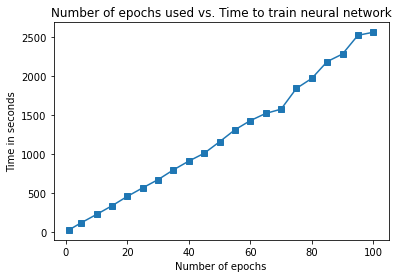

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#Time spent plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList, timeList, marker='s')
plt.title("Number of epochs used vs. Time to train neural network")
plt.xlabel("Number of epochs")
plt.ylabel("Time in seconds")


#plt.legend(loc='upper left');
plt.show()

In [15]:
for epochElement, timeElement in zip(epochList, timeList):
    
    minuteValue = timeElement / 60
    
    print("Number of epochs:", epochElement)
    print("Time spent:", minuteValue, "minutes", '\n')

Number of epochs: 1
Time spent: 0.4409333348274231 minutes 

Number of epochs: 5
Time spent: 1.9702831983566285 minutes 

Number of epochs: 10
Time spent: 3.7617804408073425 minutes 

Number of epochs: 15
Time spent: 5.604925851027171 minutes 

Number of epochs: 20
Time spent: 7.622024691104889 minutes 

Number of epochs: 25
Time spent: 9.445402427514393 minutes 

Number of epochs: 30
Time spent: 11.205003706614177 minutes 

Number of epochs: 35
Time spent: 13.300783065954844 minutes 

Number of epochs: 40
Time spent: 15.173472277323405 minutes 

Number of epochs: 45
Time spent: 16.846103950341544 minutes 

Number of epochs: 50
Time spent: 19.305776393413545 minutes 

Number of epochs: 55
Time spent: 21.875795817375185 minutes 

Number of epochs: 60
Time spent: 23.833930110931398 minutes 

Number of epochs: 65
Time spent: 25.36991368532181 minutes 

Number of epochs: 70
Time spent: 26.285524411996207 minutes 

Number of epochs: 75
Time spent: 30.735644161701202 minutes 

Number of epoc

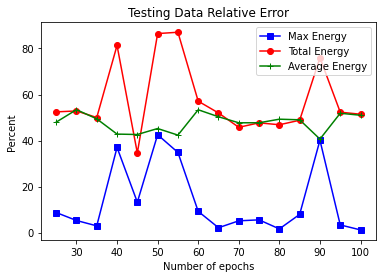

In [16]:
#Percent Error plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

startIndex = 5

plt.plot(epochList[startIndex:], maxEnergyPercent[startIndex:], c='b', marker="s", label='Max Energy')
plt.plot(epochList[startIndex:], totalEnergyPercent[startIndex:], c='r', marker="o", label='Total Energy')
plt.plot(epochList[startIndex:], avgEnergyPercent[startIndex:], c='g', marker='+', label='Average Energy')
plt.title("Testing Data Relative Error")
plt.xlabel("Number of epochs")
plt.ylabel("Percent")
plt.legend(loc='upper right')
plt.show()

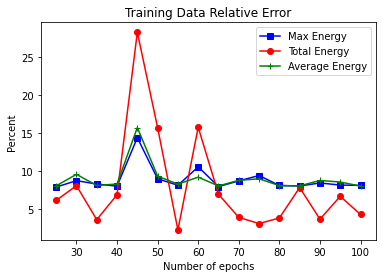

In [17]:
#Percent Error plot for training data
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainMaxPercent[startIndex:], c='b', marker="s", label='Max Energy')
plt.plot(epochList[startIndex:], trainTotalPercent[startIndex:], c='r', marker="o", label='Total Energy')
plt.plot(epochList[startIndex:], trainAvgPercent[startIndex:], c='g', marker='+', label='Average Energy')
plt.title("Training Data Relative Error")
plt.xlabel("Number of epochs")
plt.ylabel("Percent")
plt.legend(loc='upper right')
plt.show()

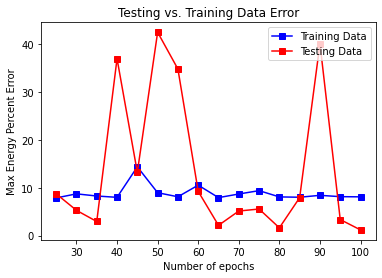

In [18]:
#Compare errors of train and test using just the max energy % error

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainMaxPercent[startIndex:], c='b', marker="s", label='Training Data')
plt.plot(epochList[startIndex:], maxEnergyPercent[startIndex:], c='r', marker="s", label='Testing Data')

plt.title("Testing vs. Training Data Error")
plt.xlabel("Number of epochs")
plt.ylabel("Max Energy Percent Error")
plt.legend(loc='upper right')
plt.show()

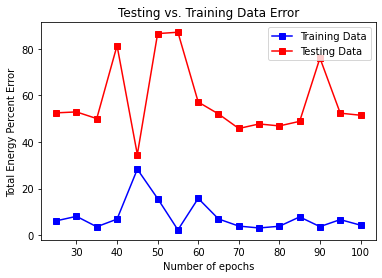

In [19]:
#Compare errors of train and test using just the total energy % error

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainTotalPercent[startIndex:], c='b', marker="s", label='Training Data')
plt.plot(epochList[startIndex:], totalEnergyPercent[startIndex:], c='r', marker="s", label='Testing Data')

plt.title("Testing vs. Training Data Error")
plt.xlabel("Number of epochs")
plt.ylabel("Total Energy Percent Error")
plt.legend(loc='upper right')
plt.show()

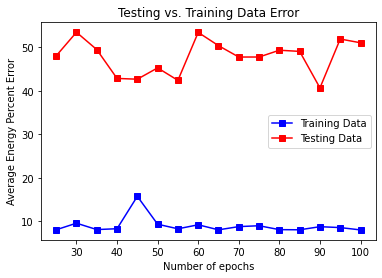

In [20]:
#Compare errors of train and test using just the avg energy % error

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainAvgPercent[startIndex:], c='b', marker="s", label='Training Data')
plt.plot(epochList[startIndex:], avgEnergyPercent[startIndex:], c='r', marker="s", label='Testing Data')

plt.title("Testing vs. Training Data Error")
plt.xlabel("Number of epochs")
plt.ylabel("Average Energy Percent Error")
plt.legend(loc='center right')
plt.show()

In [21]:
for epoch, maxError, totalError, avgError in zip(epochList, maxEnergyPercent, totalEnergyPercent, avgEnergyPercent):
    print("Number of epochs:", epoch)
    print("Max energy percent error:", maxError)
    print("Total energy percent error:", totalError)
    print("Average energy percent error:", avgError, '\n')

Number of epochs: 1
Max energy percent error: 43.3095883328202
Total energy percent error: 54.96823934382055
Average energy percent error: 43.62552758894096 

Number of epochs: 5
Max energy percent error: 348.8534607441237
Total energy percent error: 2309.8780310689253
Average energy percent error: 150.73426204538316 

Number of epochs: 10
Max energy percent error: 369.2310224753066
Total energy percent error: 2967.0169902033686
Average energy percent error: 177.97816052515697 

Number of epochs: 15
Max energy percent error: 301.0419191672765
Total energy percent error: 1624.481734288156
Average energy percent error: 137.6268945645946 

Number of epochs: 20
Max energy percent error: 12.937227485974704
Total energy percent error: 40.81748952385562
Average energy percent error: 43.99041210375503 

Number of epochs: 25
Max energy percent error: 8.742710118345837
Total energy percent error: 52.46606141649074
Average energy percent error: 47.99810948352862 

Number of epochs: 30
Max energy 

Text(0, 0.5, 'Average Energy Error (MeV)')

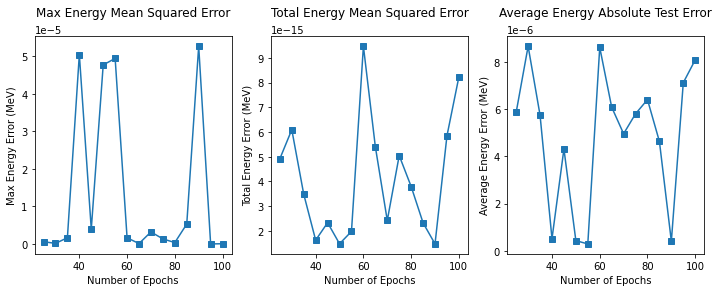

In [22]:
fig = plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.plot(epochList[startIndex:], maxEnergyMSE[startIndex:], marker = 's')
plt.title("Max Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Max Energy Error (MeV)')

plt.subplot(1, 3, 2)
plt.plot(epochList[startIndex:], totalEnergyMSE[startIndex:], marker = 's')
plt.title("Total Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Total Energy Error (MeV)')

plt.subplot(1, 3, 3)
plt.plot(epochList[startIndex:], avgEnergyMSE[startIndex:], marker = 's')
plt.title("Average Energy Absolute Test Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Average Energy Error (MeV)')

Text(0, 0.5, 'Average Energy Error (MeV)')

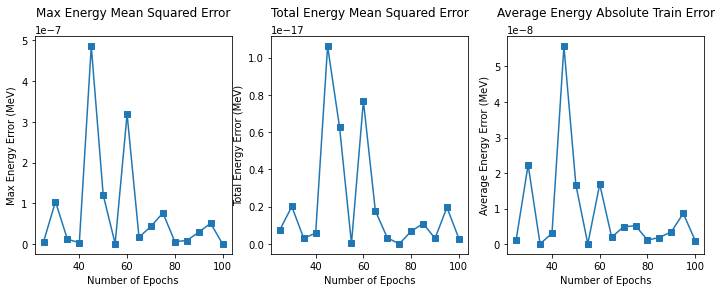

In [23]:
fig = plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.plot(epochList[startIndex:], trainMaxMSE[startIndex:], marker='s')
plt.title("Max Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Max Energy Error (MeV)')

plt.subplot(1, 3, 2)
plt.plot(epochList[startIndex:], trainTotalMSE[startIndex:], marker='s')
plt.title("Total Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Total Energy Error (MeV)')

plt.subplot(1, 3, 3)
plt.plot(epochList[startIndex:], trainAvgMSE[startIndex:], marker='s')
plt.title("Average Energy Absolute Train Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Average Energy Error (MeV)')

In [24]:
def listSubtract(list1, list2):
    result = []
    
    for x, y in zip(list1, list2):
        difference = x - y
        difference = abs(difference)
        result.append(difference)
        
    
    return result

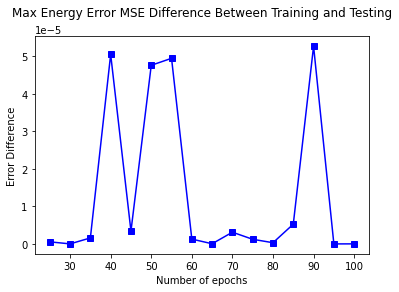

In [25]:
#Compare train and test MSE errors on the max energy

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

maxMSEDiff = listSubtract(trainMaxMSE, maxEnergyMSE)

plt.plot(epochList[startIndex:], maxMSEDiff[startIndex:], c='b', marker="s")

plt.title("Max Energy Error MSE Difference Between Training and Testing", pad = 20)
plt.xlabel("Number of epochs")
plt.ylabel("Error Difference")
#plt.legend(loc='upper left')
plt.show()

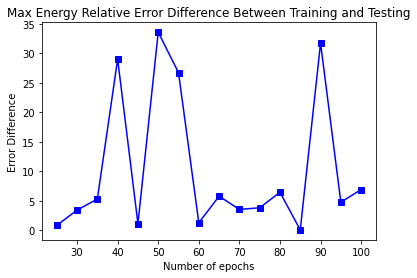

In [26]:
#Compare train and test percent errors on the max energy

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

maxPercentDiff = listSubtract(trainMaxPercent, maxEnergyPercent)

plt.plot(epochList[startIndex:], maxPercentDiff[startIndex:], c='b', marker="s")

plt.title("Max Energy Relative Error Difference Between Training and Testing")
plt.xlabel("Number of epochs")
plt.ylabel("Error Difference")
#plt.legend(loc='upper left')
plt.show()

In [27]:
for epoch, maxError, totalError, avgError in zip(epochList, maxEnergyMSE, totalEnergyMSE, avgEnergyMSE):
    print("Number of epochs:", epoch)
    print("Max energy MSE:", maxError)
    print("Total energy MSE:", totalError)
    print("Average energy MSE:", avgError, '\n')

Number of epochs: 1
Max energy MSE: 5.1772559793772065e-05
Total energy MSE: 1.814350370933232e-15
Average energy MSE: 1.6185982619907442e-06 

Number of epochs: 5
Max energy MSE: 0.00017084991762119023
Total energy MSE: 5.963801376154139e-15
Average energy MSE: 1.3690275365799758e-06 

Number of epochs: 10
Max energy MSE: 0.0001754813795440809
Total energy MSE: 5.8996524651931596e-15
Average energy MSE: 1.8944296910057154e-06 

Number of epochs: 15
Max energy MSE: 0.0001770177342529201
Total energy MSE: 6.135938965366619e-15
Average energy MSE: 1.6073383435724413e-06 

Number of epochs: 20
Max energy MSE: 1.3987119502009566e-05
Total energy MSE: 6.965364484962107e-17
Average energy MSE: 2.6681000229527344e-06 

Number of epochs: 25
Max energy MSE: 5.958310261968617e-07
Total energy MSE: 4.9207587858743144e-15
Average energy MSE: 5.878332110530419e-06 

Number of epochs: 30
Max energy MSE: 1.547450510769399e-07
Total energy MSE: 6.0942317352925145e-15
Average energy MSE: 8.681773196558